# Wordcloud

In this part, we shall create notebooks for the wordcloud for the bot tweets and the human tweets. This is to get a general sense of the type of words used in both kinds of tweets

In [65]:
#import libraries needed for this step
import pandas as pd
import numpy as np
import re
import emoji
import nltk
import language_tool_python
import warnings

import seaborn as sns
import matplotlib.pyplot as plt

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.stem.snowball import SnowballStemmer
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud

warnings.filterwarnings("ignore")
pd.set_option("display.max_columns", None)

In [66]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ruthk\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ruthk\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ruthk\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\ruthk\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [67]:
#Reading in the data
human_tweets = pd.read_csv('human_tweets_processed.csv')

In [68]:
human_tweets.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,id,text,source,user_id,retweeted_status_id,retweet_count,reply_count,favorite_count,num_hashtags,num_urls,num_mentions,created_at,bot,cleaned_text
0,0,0,1555987,549097411394940928,@KyleDavidHall @YouTube YASS THANKS BABE,"<a href=""http://twitter.com/download/iphone"" r...",2.193435e+09,0.000000e+00,0.0,0.0,0.0,0.0,0.0,2.0,Sun Dec 28 06:59:59 +0000 2014,0,__user_mention__ __user_mention__ YASS THANKS ...
1,1,1,1585626,566021410649145345,RT @AbnInfVet: ...And Then Bloomberg Says He D...,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",2.198399e+09,5.660208e+17,11.0,0.0,0.0,3.0,0.0,1.0,Thu Feb 12 23:49:55 +0000 2015,0,RT __user_mention__ ...And Then Bloomberg Says...
2,2,3,1916698,489188089143648256,RT @lgbtqnation: Federal judge considers separ...,"<a href=""http://twitter.com/download/iphone"" r...",2.244691e+09,4.891829e+17,10.0,0.0,0.0,1.0,1.0,1.0,Tue Jul 15 23:21:43 +0000 2014,0,RT __user_mention__ Federal judge considers se...
3,3,5,1269997,494612842679517186,RT @OKFosterWishes: URGENT; Beds needed to get...,"<a href=""http://twitter.com/download/iphone"" r...",1.752381e+07,4.945571e+17,6.0,0.0,0.0,0.0,1.0,1.0,Wed Jul 30 22:37:45 +0000 2014,0,RT __user_mention__ URGENT; Beds needed to get...
4,4,8,2537638,572308471829299200,"RT @luke_brooks: N.America and EU! Our EP ""Wou...","<a href=""http://twitter.com/download/iphone"" r...",2.312113e+08,5.722651e+17,3587.0,0.0,0.0,0.0,1.0,1.0,Mon Mar 02 08:12:27 +0000 2015,0,"RT __user_mention__ N.America and EU! Our EP ""..."


In [69]:
#We shall use the already cleaned tweets for this task
human_tweets_text = human_tweets[['cleaned_text']].copy()

In [70]:
bot_tweets_social = pd.read_csv('bot_tweets_social_processed.csv')

In [71]:
bot_tweets_fake = pd.read_csv('bot_tweets_fake_processed.csv')

In [72]:
bot_tweets_social_text = bot_tweets_social[['cleaned_text']].copy()
bot_tweets_fake_text = bot_tweets_fake[['cleaned_text']].copy()

## Human Tweets

In [73]:
#First, we shall generate the wordcloud for human users

human_tweets_text['tokenized'] = human_tweets_text['cleaned_text'].apply(word_tokenize)

In [74]:
human_tweets_text.head()

,cleaned_text,tokenized
0,__user_mention__ __user_mention__ YASS THANKS ...,"[__user_mention__, __user_mention__, YASS, THA..."
1,RT __user_mention__ ...And Then Bloomberg Says...,"[RT, __user_mention__, ..., And, Then, Bloombe..."
2,RT __user_mention__ Federal judge considers se...,"[RT, __user_mention__, Federal, judge, conside..."
3,RT __user_mention__ URGENT; Beds needed to get...,"[RT, __user_mention__, URGENT, ;, Beds, needed..."
4,"RT __user_mention__ N.America and EU! Our EP ""...","[RT, __user_mention__, N.America, and, EU, !, ..."


In [90]:
#include the list of stop words and contextual stop words and instantiate a lemmatizer
stop = set(stopwords.words('english'))
contextual_stop = ["__user_mention__", "__hashtag__", "rt", "u", 'r', 't', "'s", "'m", 'amp', 'one', 'love', "n't"]
lemmatizer = WordNetLemmatizer()

In [91]:
#remove all stop words
human_tweets_text['processed_data'] = human_tweets_text.tokenized.apply(lambda x: [word.casefold() for word in x if word.casefold() not in stop
                                                                        and word.casefold() not in contextual_stop])
human_tweets_text['processed_data'] = human_tweets_text.processed_data.apply(lambda x: [word.strip() for word in x])

#perform lemmatization
human_tweets_text['processed_data'] = human_tweets_text.processed_data.apply(lambda x:[lemmatizer.lemmatize(word) for word in x])

human_tweets_text['processed_data'] = human_tweets_text.processed_data.apply(lambda x: [word.casefold() for word in x if word.casefold() not in stop
                                                                        and word.casefold() not in contextual_stop])

In [85]:
# def remove_letters(setence):
#     stopwords = {'s','m'}
#     resultwords  = [word for word in setence if word.lower() not in stopwords]
#     print(resultwords)
#     return resultwords

# human_tweets_text['processed_data'] = human_tweets_text.processed_data.apply(lambda x: remove_letters(x))

['yass', 'thanks', 'babe']
['...', 'bloomberg', 'say', "n't", 'know', '18', 'year', 'old', 'know', 'handle', 'gun.', '#', 'military', '…']
['federal', 'judge', 'considers', 'separate', 'same-sex', 'marriage', 'challenge', '-']
['urgent', ';', 'bed', 'needed', 'get', 'kid', 'shelter', ';']
['n.america', 'eu', '!', 'ep', '``', 'would', "''", '!', 'hope', 'much', 'youuuu', '!']
['know', "'s", 'warm', 'today', ',', "'re", 'making', 'angel', 'laugh', 'heaven', 'red_heart']
['*', 'hug', '*']
[]
['kde', 'hacklab', 'coruña']
['great-grandmother', 'died', 'india', '1920s', 'bubonic', 'plague', '-', 'gran', "'s", 'memory', 'speed', 'disease', 'killed', 'never', 'left']
['lebron', 'james', 'like', '..', '``', '1pm', ',', '2pm', ',', '3pm', ',', '4pm', ',', '5pm', ',', '6pm', ',', '7pm', '..', "''"]
['wish', "n't", 'blazing', 'hot', 'outside', '.']
['body', 'south', 'african', 'hostage', 'killed', 'yemen', 'en', 'route', 'home', 'family', 'mourns', ':']
['hope', 'fall', '.']
['thanks', '.', 'sun',

['simple', 'answer', 'never', 'seems']
['turned', 'radio', ',', 'hearing', "'re", 'playing', 'thank', 'much', '.']
['11', 'ayerssss']
['wait', '..', 'little', 'better', '.']
['act', 'agelive', "'re", 'younglittle', 'thingsi', 'wanteverything']
['san', 'francisco', 'lb', 'chris', 'borland', 'retiring', 'season', ':']
['need', 'watch', 'nepal', '.', 'could', 'make', 'plan', '?']
['definition', 'socialist', ':', 'someone', 'want', '•everything', 'have•', '...', 'except', 'job', '.']
['finally', '2048', '!', 'sleep…']
['q', '.', 'cost', 'nothing', ',', 'take', 'second', ',', 'bring', 'glory', '&', 'prize', '?', '.', 'ipad', '2', 'thanksgiving', 'giveaway', '!', 'end', 'tod', '...']
['24k', 'tweet', 'na', 'agad']
['apple', 'let', 'inside', 'factory', 'complaint', 'grow', 'new', 'iphone', "'s", 'bendability', '.', 'next', 'news', '6', '.', '…']
['haha', 'thank', 'ya', 'thank', 'ya', 'lmao', 'cant', 'wait', 'get', 'haha']
['klopp', 'would', 'want', 'build', 'team', 'around', 'kagmeister', 'kn

['politician', 'make', 'prime', 'minister', 'blue', '.', 'puppet', ',', 'dance', 'gandhi', 'tune', ',', 'ca', "n't", 'joke', '?']
['much', 'money', 'wasted', 'making', 'check', '?']
['worried', '?']
['make', 'horrible', 'friend', '.', 'wo', "n't", 'remember', 'birthday', 'realize', "'re", 'pregnant', 'entering', 'third', 'trimester', '.']
['workday', ',', 'real', 'work', 'begin', '.', '…']
['omg', '@', 'imogen', 'telling', 'eli', "'s", 'father', 'clare', "'s", 'baby', '.', 'ca', "n't", 'wait', 'next', 'week', '.']
['hello', '10th', 'place', 'old', 'friend', '...']
['happy', 'red_heart']
['attending/tweeting', 'introductory', 'town', 'hall', 'blueprint', 'regional', 'economic', 'growth', '?']
["'s", 'taking', 'forever', 'make', '1', 'million', 'dollar', 'gta', 'v', '&', 'gt', ';', '.', '&', 'lt', ';', 'think', "'ll", 'play', 'afternoon', ':', 'p']
['guess', 'wo', "n't", 'able', 'attend', 'tough', 'mudder', 'year', 'chicago', ',', 'maybe', 'next', 'year']
['minnie', 'mellowtron', 'take',

["n't", 'know', 'go', 'way', 'people', 'sure', 'hell', "n't", 'go', 'way', '..']
['microsoft', "'s", 'new', 'cloud', ',', 'enterprise', 'chief', 'scott', 'guthrie', 'new', 'job', 'top', 'priority', '--', 'via', 'http…']
['three', 'happy', 'chow']
['studying', 'laplace', "'s", 'equation']
['wow', 'suck', 'try', 'hard', ',', 'never', 'good', 'enough']
['woman', 'selling', 'baby', 'clothes', 'craigslist', 'allegedly', 'lured', 'pregnant', 'mom', ',', 'cut', 'baby', 'womb', 'http', ':', '//t.…']
['watch', 'hod', 'rod', 'bae✔️']
['bring', 'dead', 'pet', 'make', 'sword', '$', '39']
['maybe', 'rlly', "n't", 'belong']
['ft.', 'sam', 'smith', '(', '(', '(', '(', ':']
['midnight', 'snack', ':', 'pepinos', 'w', 'chile', 'limon']
['hey', ',', 'family', 'watching', 'guy', 'moreauville', '!', 'thanks', '!', '…']
['eight', ':3', 'enjoy', ';', 'lol', 'tryed', 'adding', 'twitter', 'never', 'save', 'info', ':', '(']
['cred', '2', 'lolz']
['empire', 'fan', 'understand']
["'ve", 'always', 'felt', 'jupiter

['postseason', 'team', 'predictionsal', 'div', 'winners-', 'bos', ',', 'det', ',', 'laanl-', 'wsh', ',', 'pit', ',', 'ladal', 'wc-', 'tor', ',', 'chwnl', 'wc-', 'stl', ',', 'sfworld', 'series-…']
['1959', ',', 'fitbit', 'weighed', '2,000', 'pound']
['-', 'time', 'life', ',', 'drinking', 'beer', ',', 'living', 'startup', 'dream', ',', 'fixing', 'issue', 'github', '.', "c'mon", '!']
['immediately', 'like', '10x', 'like', 'music']
[]
['holiday', 'season', 'might', 'turning', 'exactly', 'way', 'yo', '...', 'libra']
['tell', 'whyyyy', 'alwayyssssss']
['happy', 'international', 'worker', 'day', '.', 'shoot', 'appropriately', 'happy', '.']
['video', ':', 'lou', 'holtz', 'mistakenly', 'refers', 'nebraska', 'rb', 'ameer', 'abdullah', '“', 'mohammed', '”', '…']
['try', 'fake', 'real', 'take', 'le', 'effort', '?']
['finnish', 'parliament', 'vote', '105-92', 'favor', 'marriage', 'equality', '-', 'video']
['felipe', 'said', 'filip', ',', '``', 'let', "'s", 'get', 'throne', "''", '.']
['patton', 'ba

['lot', 'people', 'tweeting', 'right', 'using', 'hashtag', '-', "'s", '21', 'year', 'since', 'death', 'aged', '34', '…']
['sleeping', 'good', 'tbh', "n't", 'wake', 'dog', 'scratch', 'door']
['adventure', 'public', 'transportation', ',', 'going', 'back', 'mca', 'see', 'mothersbaugh', 'exhibit', 'second…']
['today', 'always', 'involved', '!', 'also', 'tried', 'panna', 'cotta', 'flavour', '!', '6', 'and…']
['.']
['bruh', 'gave', 'bird', 'laxative', 'lmfaoooo']
['beautiful', 'free', 'spirited', 'soul', "'ve", 'ever', 'encountered', 'whole', 'life', "'m", 'lucky', 'able', 'call', 'my…']
['article', 'rise', 'satirical', 'news', 'site', 'taken', 'seriously', 'gullible', 'punter', ',', 'quote', 'jim', 'berners-lee', '.']
['gon', 'na', 'rough', 'monday']
['breaking', ':', 'prince', 'george', '’', 'police', 'officer', 'jerry', 'thomas', 'changed', 'plea', 'guilty', 'guilty', 'teen', 'beating', 'cas…']
['``', '@', 'johannahdarling', ':', 'son', 'return', 'husband', 'tomorrow', 'x', "''", '@', 'lo

['like', 'said', ':', '``', "n't", 'think', 'want', 'president', ',', "n't", 'know', "''"]
['.', 'rather', 'shitty', '.', 'need', 'advice']
['“', '@', 'greatergump', ':', 'free', 'chick-fil-a', 'milk', 'shake']
['“', '@', 'woridstarhlphop', ':', 'im', 'dead', '”']
['jumpcast', '009', '!', 'anthem', '.']
['ruth', 'bader', 'ginsburg', 'think', 'american', 'ready', 'gay', 'marriage', 'via', 'recall', 'when…']
['see', 'something', 'nobody', 'else', '?', 'figure', 'wfos', 'every', 'reason', 'trust', 'educated', 'chaser', '.']
['wife', ':', 'get', 'jose', ',', '6.mourinho', ':', '?', '?', 'spur', 'scored', '?', '?', 'wife', ':', ',', '6', 'morning']
['keeping', 'kardashians', 'season', '20']
['imprisoned', '367', 'day', 'journalism', '.', '…']
['amazon', 'buy', 'clusterk', ',', 'firm', 'help', 'user', 'buy', 'cloud', 'capacity', 'cheap', ':', 'amazon', 'acquired', 'clusterk', ',', 'develo', '...']
['``', 'exo', 'ranked', '6th', 'music', 'core', '.', '``', 'get', 'ready', 'slayed']
['“', '@',

['greville', 'janner', '``', 'vile', "''", 'names.', '#', 'childabuse']
['wrote', 'almost', 'perfect', 'description', '2014', '.']
['23', '.', '30mins', 'later', 'open', 'gate', '.', 'put', 'gen', 'ac', 'balanced', 'couch', '.', 'good', 'riddance', 'stupid', 'pussy', '.']
['well', 'least', 'day', "'s", 'paying', '.', ':', 'p']
['good', 'point', '.', 'personally', "n't", 'think', 'turbo/gt2/gt3s', 'car', '911', '911', 's.', 'v8', 'v6', 'similar', '?']
['kidding', '.', "'m", 'full', 'aestivation', '.', 'good', 'thing', 'work', 'home', '.']
["'s", 'easy', 'get', 'lost', 'outer', 'space', '.', 'orbit', 'take', 'floater', '!']
['yee', 'whatever', 'day', "'re", 'free', 'ill', 'ask', 'janely', "'s", 'free']
["'m", 'coming', 'town', 'october', '!', 'run', 'run', '!']
['new', '2012', '-', 'please', 'join', '21', 'day', 'productivity', 'challenge', '-', 'boost', 'online', 'business']
['helpline', 'woman', 'mp', ',', '1090', '.', 'received', 'help', '25', 'minute', '.', 'messed', 'dilli', 'http',

['celebrate', 'breaking', 'scoring', 'record', ',', "'re", 'boot', 'giveaway', '!', 'follow', '&', ';', 'enter', '!', '…']
['like', 'comedy', 'diverse', '.']
['second', 'twitter', 'account', '?']
['heck', 'yeah', '..', "'ll", 'toast', 'dinner', 'chicken', 'dessert', '!']
['seriously', 'go', 'watch', 'try', 'american', 'candy', 'subscribe', "n't", 'already']
['yesterday', 'someone', 'first', 'time', 'worked', '!']
['serbian', 'dog', 'need', 'putting', '.']
['``', 'picture', 'animal', ',', "'d", 'alpaca', 'llama', '.', 'llama', 'savage', '.', '``', '-']
['many', 'memory']
['nothing', 'shock', 'anymore', 'stephen', 'fry', 'apologizes', 'taking', 'cocaine', 'buckingham', 'palace']
['seen', 'koch', 'cafe', 'koch', 'industry', '?', '.', 'check', ':', 'via']
['church', ',', 'cut', 'grass', ',', 'shower', ',', "'s", 'time', 'nap', '!']
['nephew', 'obsessed', 'fredo', 'santana', ',', 'said', '``', 'got', 'go', 'get', 'gu', '...', '(', 'vine', 'ig//', '…']
['swear', 'tommy', 'wanted', 'last', 'l

["'meridians", "'", 'officially', 'itunes', 'spotify', '!', 'go', 'take', 'listen', '!']
['~', '@', '20committee', 'fourth', 'time', 'today', ':', 'gai', 'stats', 'wrong', 'misrepresented', 'top', '-', "'s", '9/11', '``', 'missile', 'hit', 'pentagon', "''", 'land', '.']
['want', 'thank', 'right', '.', 'thank']
['“', '@', 'noonahmed', ':', 'nah', 'football', 'player', 'strangest', 'name', 'uno', "'s", 'falcon', 'kayote', 'malta', 'wtf', '”', 'name', 'noon']
['see', ',', 'piece', 'cake', 'hahhaha']
['.', '@', 'k_boonie', 'trailer', 'must', 'get', 'outstanding', 'gas', 'mileage']
["'m", 'like', ',', "ma'am", '?', 'really', '?', 'lol', '!', '!']
['go', '?']
['really', 'need', 'start', 'homework']
['mentioned', 'place', 'really', 'need', 'join', 'aggregation', 'solve', 'particular', 'problem']
['“', '▶', 'mad', 'capsule', 'market', '-', 'good', 'girl', '-', 'youtube', '”']
["n't", 'expecting', 'paycheck', 'low', '.']
['seek', 'mend', 'tie', 'russia', '&', ';', 'eu', 'european', 'institution

['te', 'jamie', 'oliver', "'s", 'perth', 'restaurant']
['turn', 'real']
['wow', '!', 'like', 'buy', 'icecream', '!']
['player', 'also', 'wear', 'black', 'armband', ',', 'honour', 'lost', 'life', 'munich', 'air', 'disaster', '6', 'february', '1…']
['&', 'lt', ';', '—', 'bring', 'back', 'reading', 'rainbow']
['life', 'bitch', 'haha']
['amazing', 'actor', 'trinidadian']
['name', 'niall', 'louis']
['crisis', 'couture', '3']
['omg', 'lost', 'life', "'m", 'idiot', 'ugh']
['wayne', ':', '``', 'cmon', 'yall', 'leavin', '!', 'let', 'go', '!', '!', "''", 'drake', ':', '``', 'happened', 'dad', '?', "''", 'nicki', ':', '``', 'wat', 'grandpa', 'stunna', '?', '!', "''", 'http…']
['kinda', 'bummed', 'somethings', 'noted', ',', 'ca', "n't", 'b', 'talk', ',', 'talk', 'usually', 'get', 'blank', 'stare', ',', "'ll", 'see']
['ad', 'play', 'store', '.', 'bring', 'folk', '!', '!', '!']
['ha', '!', '!', 'funny', 'stuff', 'right', '!', '``', 'polly', 'want', 'forecast', '?', "''", 'parrot', 'may', 'become', '

['zayn', 'landed', 'everyone', 'step', 'aside', 'come', 'waiting', 'man', 'bitch', 'zayn', 'everyone']
[]
["'megathrust", "'", 'earthquake', 'along', 'pacific', 'ring', 'fire', 'predicted', 'scientist', 'via']
['seems', 'like', 'every', 'away', 'game', 'play', 'sound', 'like', 'home', 'game', '.', 'fan', 'everywhere', ';', 'especially', 'kc', '.', 'haha']
['hanson', '...', 'guy', '--', '-', '&', 'gt', ';']
["'m", 'casper', 'college', '.', "'s", '2', 'year', 'great', 'transfer', 'rate']
['woman', 'whole', "'", 'ca', "n't", 'friend', 'woman', "'", 'thing', ',', 'dis', '?']
["'m", 'louis', 'af', 'moment']
['motion', 'filed', 'protect', 'first', 'same-sex', 'marriage', 'recognized', '-']
['watching', 'tiger', 'game', 'hard', 'watch', 'justin', 'verlander', 'struggle', 'bad', '!']
['747k', 'behind', ',', 'drop', '700k', "'ll", 'group', 'dm', '!']
['paging', 'jamaal', 'charles', '.', 'please', 'help', 'beat']
['like', 'name', 'fool', '!', "'s"]
["n't", 'like', 'people', ',', "n't", 'take', '

['third', 'good', 'news', 'get', 'trouble', 'coming', 'day', 'panga', 'dad', 'changa']
['excited', 'af', 'dont', 'understand', 'screamed', 'loud', 'fell']
['``', '@', 'peterpanlwt', ':', 'tell', 'see', 'black', 'tell', '.', '``', '...', "'s", 'black', 'blue']
['``', '@', 'lorealparisusa', ':', 'sitting', 'pretty', '.', 'bon', 'anniversaire', 'gorgeous', '``', 'merci', '!', '!']
['new', 'hawkeye', 'came', ',', 'yes', ',', 'old', 'hawkeye', 'series', 'finished', '.', '¯\\_', '(', 'ツ', ')', '_/¯']
['well', 'today', 'interesting']
['finally', 'work']
['bread', 'might', 'ready', 'brekky']
['new', 'sound', ':', 'benjai', '-', 'limerz', 'riddim', 'soca', '2015']
['played', 'f1', '2011', '(', 'pc', ')', 'last', '24', 'hour', '.']
['second', 'suicide', 'bomber', 'targeted', 'another', 'afghan', 'army', 'vehicle', 'deh', 'sabz', 'outskirt', 'kabul', ',', 'wounding', 'least', '3', 'peopl…']
['tonight', "'s", 'first', 'show', 'amazing', '..', 'went', 'away', 'mind', 'french', '..', 'fuck', 'felt',

['fun', 'run', 'anz', 'tonga', 'good', 'turn', 'morning', '.', 'bad', 'food', 'friend', "n't", 'par', ',', 'looking', 'forward', 'golf', 'noon', '.']
['bdubbs', 'home', 'boy', 'ash']
['ooohhhhh', 'snap', 'sas', 'run', 'whole', 'tomlinson', "'s", 'family', 'slay', 'daisy', 'slay', '…']
["'m", 'sure', 'work', 'least', 'three', 'language']
['downloaded', 'kendrick', "'s", 'album', 'free', 'still', 'want', 'money', 'back']
['sweet', 'jesus']
['surprised', '?']
['raisin', 'bread', '.', 'thing', 'cream', 'berry', ',', 'lord', 'help']
["'m", 'never', 'eating', 'fast', 'food', '.']
['snapchatting', "'re", 'ugly', ':']
['call', 'security', 'outside', 'samsung', 'store', '?']
['brisket', 'full', 'fat', '.', 'like', 'pulled', 'pork', 'though', '.']
['ok', '.', 'promise', 'reduce', 'annoying', 'tweet', 'minimum', '.', 'back', 'fun', 'stuff', '.']
['okay', 'jigo', ',', 'let', 'stop', 'madness', ',', 'need', 'people', 'get', 'hurt', '..', 'let', 'end']
['loneliness', 'good', ',', 'let', 'know', 'lot

['jesus', "n't", 'even', 'follow', "'s", 'lol']
['happy', 'new', 'year', ',', "'ve", 'already', 'ice', "'s", 'hole', 'twice']
[]
['anyone', 'found', 'small', 'purse', 'mouse', 'saying', ':', '``', 'barely', 'squeaking', "''", '?', '?', '?', 'ca', "n't", 'find', '.']
['get', 'people', 'open', 'email', 'take', 'action', 'say', '?', 'best', 'tip', ':']
['done', 'hiding', 'feel', '.', "n't", 'like', 'go', 'hell', '.']
['feel', 'like', 'music', 'exist', 'everything', '?']
['better', 'girl']
['méxico', ':', '6', 'killed', ',', '20', 'injured', '&', ';', '55', 'student', 'missing', 'attack', 'municipal', 'police', 'guerrero']
['``', 'teach', 'sell', 'car', ',', 'good', 'person', '.', "''"]
['joke', 'gwinnett', 'close', ',', 'would', 'much']
['“', '@', 'philconcerts', ':', '``', 'best', 'show', "'ve", 'ever', 'done', "''", '”', '......']
['quick', 'back', 'goal', 'tonight', '.', 'thank', '!']
['axe', '...', 'water', 'consumption', '..', 'cab', 'speed', 'dial', '...', 'thanks', 'making', 'hate'

['key', 'flat', "n't", 'click', 'well', ',', "'s", 'like', 'crappy', 'laptop', 'keyboard']
['great', 'interview', 'collector', "'s", 'weekly', 'dita', "'s", 'collection', 'well', ',', 'lot', 'stuff']
['3', 'hour', 'sleep', '\ue403']
['true', "n't", 'know', 'tho']
['facebook', 'part', 'job', '.', ':', '(']
['lost', 'holli', 'addiction']
['new', 'mexico', 'wow']
['yes', '.', 'seems', 'suck', '.']
['hope', 'happy', 'friday', '..']
['spouse', 'caregiver', '?', 'adrienne', 'talk', 'caring', 'husband', 'cancer', '.']
['.', 'lem', '!', 'please', '?', '!']
["'m", 'trying', 'get', 'peace', '...', 'part', 'still', 'question', 'ca', "n't", '``', 'empathic', "''", 'towards', '?', "'s", 'ego', 'fear', '.']
['ok', 'nothing', 'ti', 'say', 'else']
['meet', 'white', 'girl', 'parent', 'first', 'time']
['time']
["'s", 'looked', 'cool', 'decade', 'ago', '.', 'actually', ',', 'still', 'would', '...', 'via']
['want', 'hang', 'wed', 'night', "'ll", 'inwood', 'tavern', 'grinding', 'away', 'film', 'room']
['ar

['touch', ',', 'feel', ',', 'even', 'sit', '.', 'new', 'interactive', 'display', 'bring', 'huntington', 'art', 'gallery', 'life', '.', 'http', ':', '//…']
['big', 'si']
['high', 'school', '85', '%', 'people', 'smoked', 'copped', 'white', 'boy', '.', "y'all", 'could', "'ve", 'murdered', 'behavior', '..', 'oh', 'nvm', "'re", 'white', '.']
['first', 'day', '1st', 'grade', 'senior', 'year', '!']
['hedy', 'lamarr', 'movie', 'star', 'engineer', '.', 'frequency', 'hopping', 'theory', 'paved', 'way', 'modern', 'wi-fi', '.', '…']
['near', 'bottom', ':']
['missed', '&', ';', '?', 'preview', 'w/', ',', ':', 'http', ':', '…']
['happened', '?', '4mfraffle']
['haha', '.', 'hope', 'solo', 'awesome', '.']
['honestly', 'excited']
['careful', 'judge', 'critic', 'harshly', '.', 'may', 'believe', 'vision', '.', 'see', '&', ';', 'barrier', '.']
['build', ',', 'come', '.', '(', 'erect', ',', 'cum', '?', ')']
['icymi', 'caltrans', 'warned', 'bay', 'bridge', 'leaking', 'span', 'opened', 'via']
['think', "'s",

['hmm', 'reading', 'laura', 'florand', "'s", '``', 'chocolate', 'thief', "''", 'letter', 'paris', 'wrapped', 'romance', 'chocolate']
['wow', ',', 'thx', 'lot', 'encouragement', '!', 'kind', '!', ':', ')', 'xx']
['sean', "'s", 'wearing', 'sweatshirt', 'today', '.', 'savage']
['awww', '!', '&', 'lt', ';', '3', ':', ')', '(', "n't", 'feel', 'today', ',', 'btw', '...', ')']
['ref', 'legit', 'staring', 'car', 'looked', 'away', 'turned', 'around', 'full', 'body', 'staring', 'wtf']
['let', 'go', 'bowling', 'tonight']
['marcado', 'un', 'vídeo', 'como', 'favorito', 'en', 'youtube', '.', '--', 'ricky', 'gervais', 'meet', 'larry', 'david', '(', 'part', '...']
['thank', 'god', 'another', 'day', '!', 'fresh', 'week', '!']
['wallpaper', ':', ')', 'make', 'screen', 'look', 'yummy', 'colourful']
['egg', 'fallen', 'far']
['movement', 'need', 'made']
['breeze', 'feel', 'amazing', 'walking', '\ue414']
['whiskey', 'jolly', 'rancher', 'wtf', 'boehner', 'mouth', '?']
['tonight', "'s", 'finale', ':', 'unific

['every', 'body', 'help', ',', 'help', 'close', 'school', '.']
['anyone', 'ever', 'digitised', 'old', 'school', 'magazine', '?', '``', 'moocooboola', "''", 'day', '.']
['re-signed', 'b.j', '.', 'raji', '&', ';', 'letroy', 'guion', ':']
["'s", 'literally', 'singing', 'barney', 'song', 'wake', 'alex']
['call', 'no-fly', 'zonesunday', '2-4pm', ',', 'embassy', 'londonjoin', '#', 'stopthebombs', 'http', ':', '//t…']
['wonder', 'many', 'hangar', 'arrive', 'governor', "'s", 'mansion', 'austin', '?', '…']
["n't", 'sappy', 'make', 'uncomfortable']
["'cause", "'s", 'truth', '.']
['take', '10,000', 'selfies', 'day', 'never', 'post']
['hanley', 'hit', '2', 'homer', '?', '1', 'grand', 'slam']
["n't", 'need', 'bae', ',', 'someone', 'share', 'good', 'news']
["'s", 'bank', 'vanish', 'console', "n't", 'appear', 'time', 'go', 'dif', 'wing']
['change', 'ur', 'name', 'cyrilic']
['presence', 'superior', 'autorifle', '.']
['hate', 'bitch', 'beach']
['ukrainian', 'interior', 'ministry', 'advisor', 'anton', '

['nice', 'meeting', 'last', 'time', ',', 'tom', '.', 'thanks', 'following', '!']
['list', 'alternative', 'scenario', 'ukraine-russia', 'conflict', ',', 'incl', 'market', 'contagion', '?']
['speech', 'village', 'meeting', 'campaign', 'trail', 'sultanpur', '.']
['day', 'period', "'s", 'eta', "n't", 'feel', 'like', 'eating', ',', 'feel', 'like', 'stuffing', 'face', 'much', 'food', 'possibly', 'fit', 'nnggggaaahhhh']
['robert', 'carlyle', 'continue', 'ouat', '.', 'reject', 'idea', "'s", '.', 'sorry', '.']
['robert', 'redford', ',', 'george', 'lucas', 'discus', 'art', 'film', 'http…']
['exactly', ',', 'ca', "n't", 'stand', 'blind', 'hate', 'adobe', 'runtimes', 'android', 'market', '.', 'really', 'make', 'mad', '.', ':']
['shout', 'wolcott', ',', 'chamorro', ',', 'holt', ',', 'lott', ',', 'conrotto', ',', 'arellano', ',', 'trinh', 'biggest', 'support', 'system', '&', 'lt', ';', '3', '...']
["'s", 'hujan', ',', 'right', '?', 'xd', 'else', '?']
['happy', 'father', "'s", 'day', 'dad', "'s", '!'

['lol', 'happened', '‘', 'thought', 'count', '’', '?']
['metaphor', 'nothing', 'like', '.', "'m", 'keepin', 'straight', 'point', '.']
['united', 'xi', ':', 'de', 'gea', ',', 'valencia', ',', 'smalling', ',', 'mcnair', ',', 'shaw', ',', 'blind', ',', 'herrera', ',', 'mata', ',', 'fellaini', ',', 'young', ',', 'rooney', '.', '…']
['video', ':', 'navorro', 'bowman', '’', 'knee', 'looking', 'good', '(', 'yes', ',', '’', '455', 'pound', ')']
['anyone', 'know', 'bit', 'javascript', '?', 'java', 'script', '?', '’', 'desperate', 'need', 'help', 'email', 'form', 'powered', 'google', 'doc', 'spreadsheet', '.']
["'re", 'memphis', 'weather', '&', 'finally', 'break', 'today', ':', 'cold', 'spell', 'brought', 'low', '90', '.', "'s", 'parka', '?']
['good', 'luck', 'getting', 'shit', 'back', 'together']
['used', 'primary', 'cool', 'could', 'hand', '.', ':', "'", '(']
['esteemed', 'colleague', 'desk', 'look', 'like', ':', 'approve', '!']
['``', 'ca', "n't", 'normal', 'child', '?', 'like', 'weird', 'thi

['bring', 'back', 'harvard', 'architecture', 'web', 'language', '!']
['enlightenment', 'ca', "n't", 'come', 'soon', 'enough', 'inquisition', 'stalk', 'secret', 'jew', 'spain', 'mexico']
['omg', 'wish', 'nothing', 'best', 'entire', 'universe', 'could', 'offer', 'ate', 'god', 'bless', '!']
['got', 'ta', 'repair', 'heart']
['ok']
['beyond', 'joke.should', 'either', 'effect', 'stats', 'cost', '10k']
['.', 'also', 'thought', 'html', 'mail', 'devil', 'wrath', 'world', '.', "n't", 'care', 'either', '.']
['sorry', 'man', '!', ';', 'worn', 'contact', 'two', 'week', '.', 'eye', 'feeling', '.', 'going', 'blind', 'weather', '...', 'lol']
['add', 'station', 'pandora', 'spotify', ':', '-', ')']
['tbh', "'s", 'whether', 'mcu', 'keep', 'quality', '.', "'s", 'many', 'trash', 'superhero', 'movie', 'good', '.']
["n't", 'get', 'invite', ',', 'allowed', 'tonight', '.', 'thanks']
['“', '@', 'funnyquotees', ':', 'never', 'say', '``', "''", 'unless', 'mean', '100', '%', '”']
["'ve", 'orange', 'juice', 'vodka'

['think', 'need', 'sl', 'electron', 'beam', '3d', 'printing', 'system', '.', 'reprap', '?']
['support']
['awww', 'neil', 'said', '``', 'buenas', 'noches', "''", 'tonight', 'oscar', '....', 'don´t', 'found', 'video', '!', ':', '(']
["'m", 'berkeley', 'way', 'richmond', "'m", '!', '!', '!', '?']
['said', 'biiitttccchhh', '!', '!', '!']
['know', 'whatttt', 'reallllyyyyyyy', 'hateeeeee']
["'s", 'nine', 'day', 'since', 'ultra', "'re", 'still', 'blaming', 'binge', 'eating', 'post', 'ultra', 'depression']
['back', 'price', ';', '$', '10', '.', 'decision', '?']
['pepsi', ',', 'baby', 'waiting', 'happily', 'forever', 'home', '.', 'give', 'pepsi', 'home', '.', 'drop', 'message', '9818201987', '.', 'http', ':', '/…']
['hoe', 'swear', 'wife', 'material', 'roll', 'blunts', 'twerk', ',', 'bitch', 'make', 'dinner']
["n't", 'know', 'meaning', 'word', 'inspiring', 'watch', 'infant', 'almost', 'crawling', 'tar', 'sand']
['dwight', 'howard', 'flu', '...', 'even', 'lebron', 'court', 'second', 'leg', 'cram

['model', 'show', 'northern', 'luzon', 'taiwan', 'ang', 'tatamaan', 'nito', '.']
['wait', '.', 'angela', 'left', 'shawn', '?', '?', '?', '?', '?']
['feel', 'bad', 'anyone', 'talk', 'today']
['still', 'going', 'mine', '!', 'nearly', '...']
['thought', 'keep', '.']
["'re", 'terrible', 'merlot', '!', '!', '!', '*', 'jumping', '&', ';', 'screaming', '*']
['earned', 'addon', 'adhesive', 'sticker']
['hillary', 'putting', 'america', 'much', 'chuck', 'todd', '?']
['interesting', 'story', 'great', 'video', '.', 'check', 'last', 'rts', '.']
['chicken', 'lunch', 'japanese', 'xmas', 'tradition', '(', '@', 'ファミリーマート', '北青山一丁目店', '-']
['watching', 'breakfast', 'club', 'making', 'dinner', 'red_heart']
['dear', 'student', ',', 'miss', '.', 'hope', 'see', 'soon', '.']
['cooper', 'better', 'suck', '.', 'please', 'dont', 'suck', 'amari', '.', 'liked', 'lot', 'bama', ',', 'wanted', 'williams', 'tad', '.']
['see', 'think', 'analogy', 'leg', 'aplenty']
['lol', 'verified', 'account']
['ok', 'came', 'awesome'

['happy', 'birthday', 'ig', '...']
['lol', '.', 'always', 'sleep', 'time', 'even', "n't", 'jet', 'leg', '.', 'fine', '.', 'haha~~']
['cent', 'percent', 'agreed', '.', 'aib', 'way', 'overrated', ',', 'whereas', 'tvf', 'real', 'deal']
["n't", 'want', 'get', 'tattoo', '!']
[]
['realize', 'ou', 'record', 'big', '12', 'texas', '!', '&', ';', 'texas', 'bad', 'year', '!']
['coming', 'soon', '!', 'cut', 'short', 'bc', 'ig', 'stepupfans_']
['yip', '...', 'said', ',', 'took', '-', 'compared', 'modern', 'shite', ';', '-', ')']
['rdj']
['anyone', 'moment', 'class', 'day', 'dreaming', 'start', 'listening', 'idea', "'s", 'going']
['posted', 'new', 'photo', 'facebook']
["'s", 'hell', 'hot', 'today', '!']
['giving', 'good', 'head', 'get']
['eugh', 'time', '!']
['baby', 'ca', "n't", 'hold', 'xbox', 'controller', '.']
['working', 'design', 'version', '2', 'faster', 'work', 'lot', 'better', '.', 'api', 'coming', '!']
['“', '@', 'sodamntrue', ':', 'would', 'die', 'someone', '.']
['sorry', '.', 'forgot', '

['told', 'principal', 'wake', '3', '.', 'principle', '?', "n't", 'pay', 'attention', '.']
['every', 'simple', 'thing', 'try', 'project', 'turn', 'first', 'scene', 'raider', 'lost', 'ark', '?']
['go', 'fly', 'kite', 'coco']
['yes', '.', 'go', 'back', 'next', 'tweet', ',', 'rapist', '.', 'complex', 'issue', '.']
['digitalism', 'samit', 'malkani', '!']
['``', '@', 'thecomedyhumor', ':', 'girl', 'attitude', 'like', '``']
['hoe', 'nigga', 'b', '.']
['l', ':', '``', 'cause', 'bring', 'best', 'like', 'else', '(', ':', "'s", "'m", 'side', ',', "'s", '...', "''"]
['brother', 'whore']
['know', 'happy', 'get', 'start', 'talking', 'lion', '.']
['starlin', 'castro', '?', 'addison', 'russell', '?', 'see', 'wide-open', 'possibility']
['assume', 'fact', 'independently', 'lift', 'eyebrow', 'entirely', 'due', 'mr.', 'spock', '.']
['danny', 'franco', 'annoying', 'fuck']
['defending', 'worst', 'sin', 'islam', 'serious', '?']
["'d", 'rather', 'socialize']
['sound', 'like', 'fantastic', 'idea', ',', 'ozzie'

['art', '?', 'went', 'look/order', 'recently', ',', 'got', 'redirected', '``', 'nuvango', '.', "''", 'content/layout', 'much', '.']
['``', '@', 'goldenkurls', ':', 'think', 'started', 'period', 'wet']
['ouch', ',', 'iv', "'s", 'suck', '...', 'hope', 'med', 'work', '!']
['probably', 'determined', 'likeliness', 'michelin', 'tire', 'man', '.']
['specifically', 'made', 'sure', 'use', 'every', 'character', '.', 'even', 'switched', 'finger', 'part-way']
['great', 'read', '“', '@', 'darrenrovell', ':', 'top', 'blue', 'jay', 'prospect', 'life', '1978', 'vw', 'van', 'walmart', '”']
['deserves', 'expounding', ':']
['“', '@', 'romanroyalee', ':', 'sound', 'jeep', 'make', 'cum', '”', 'bruh']
['travis', 'avenue', '?']
['damn', 'fucking', 'emotional', 'song']
['yeah', ',', "'s", 'meant', ':', 'p', 'anyway', ',', 'crofty', "n't", 'best', 'pronunciation', '..']
['fuck', 'bus', '1', 'hour', 'half']
['home', 'football', 'game', 'friday', 'gv', '@', '7:30', '!', 'come', 'show', 'support', 'come', 'ready'

['fuck', 'man', 'mimi', 'like', 'fucken', 'daughter', 'asking', 'money', 'take', 'early', 'school', 'tomorrow']
['satisfied', 'could', 'ask']
['newsroom', '!', '!', '!', '!', '!', '!']
['mean', 'duke', 'getting', 'call', 'go', 'way', '?', 'idk', 'sound', 'like', 'stretch', '.']
['wow', ',', "'s", 'actually', 'intl', 'data', 'plan', 'cost', 'american', 'traveling', 'abroad', 'phone', '&', ';', 'text', 'rated', 'good', '.']
['reminder', 'head', '...']
["n't", 'get', 'idea', 'lol']
['leaving', 'hard', '?', 'feel', 'like', 'last', 'link', 'gon', 'na', 'left', 'behind', '.']
['moment', 'tasted', 'civil', 'right', 'era']
['unfortunately', '.', 'fortunately', '.', 'yes', '.', '“', '@', 'leo_tweets', ':', 'forgive', ',', 'never', 'let', 'forget', '.', '”']
['watching', 'firework', 'santa', 'clara', 'today', ',', 'hope', 'great', 'time', ',', 'drive', 'safely', 'patient', '.']
['sure', 'tomorrow', 'christmas', '?']
['bitch', ',', 'please', "n't", 'kill', 'vibe', '.']
['huge', 'game', 'crystal',

['mlb', 'clash', '⚾️rt', 'dustin', 'pedroiafav', 'robinson', 'cano']
['finished', 'ruby', 'brooch', '.', 'great', 'job', '!', 'loved', 'oregon', 'trail', 'adventure', 'story', 'everything', 'could', 'ask', '.']
['icymi', 'circle', 'back', 'best', 'music', 'doc', 'http', ':', '/…']
['gray', 'promise', 'fact', 'checker', 'candidate', '.', 'want', 'fact', 'shadow', 'campaign', '!', 'come', 'clean', '!']
['anyone', 'kno', 'next', 'ufc', 'card', '?', '?', 'havent', 'keepin', 'wit']
['shanky', 'daily', '!', '▸', 'top', 'story', 'today', 'via']
['oh', 'crap', ',', 'realised', 'drank', 'least', 'three', 'time', 'many', 'energy', 'drink', 'daily', '-']
[',', "'ll", 'bust', 'sleeping', 'bag']
['happens', 'time']
['wow', '!', 'even', "n't", 'bid', ',', 'fun—there', "'s", 'real', 'battle', 'going', 'piece', '!']
['access', 'private', 'niche', 'business', 'training']
['sistar', 'reveal', 'member', 'get', 'asked', '+', 'chanyeol', 'chooses', 'mom', "'s", 'favored', 'daughter-in-law', '…']
['least', 

['picked', 'go', 'drink', 'beer', 'cricket', '.']
['another', 'chapter', 'closed', '.', 'let', 'see', "'s", 'next', '......']
['spaniard', 'excited', '20th', 'edition', 'big', 'brother', 'instead', 'worrying', 'corrupt', 'politicia…']
['new', 'day', '.', 'thankfully', '...', "'d", 'used', 'old', '.', '(', '@', 'clock', 'tower', 'scarborough', 'park', ')', '[', 'pic', ']', ':']
['bawi', 'next', 'time', 'lady', 'spikers']
['zalmay', 'enjoying', 'u-turn', 'tl.from', "'lazy", 'man', "'", "'wow", 'man', "'", '-', 'khattak', 'quite', 'journey', 'day.that', "'s", 'fickle', 'opinio…']
['internet', 'remembers']
['aww', 'thanks', 'bella', '!', '★']
["'m", 'awake', '...', 'want', 'get', ',', "'s", 'cold', '...', 'ヽ', '(', '´o｀；']
['dick', '!', 'like', 'wld', 'figuire', '?']
['thank', 'much']
['&', 'gt', ';', 'br', '&', 'gt', ';', 'jump', 'sea', 'mob', '&', 'gt', ';', 'heal', 'wtfthis', 'nigga']
['ca', "n't", 'believe', 'caught', 'flu']
['also', ',', 'r-18', 'stuff', '’', 'fluid', ',', 'genitals',

['*', 'jump', '40ft', 'high', 'stadium', 'full', 'people', '*', '*', 'trip', 'front', '2', 'people', '*', 'niall', 'horan']
['broke', 'long', 'time', 'ago', 'dont', 'heart', '!', '!', 'lol']
["'s", 'last', 'tweet', 'yesterday', 'decided', 'unplug', 'day', '...']
['awkward', 'moment', 'abs-cbn', "'s", 'summer', 'station', 'id', 'longer', 'pacer', '&', ';', 'hawk', 'game.not', 'cool', '!']
['roger', 'sister', ',', 'sister', 'dwayne', 'different', 'world', '.', 'feel']
['date', 'bias']
['always', 'called', 'somebody', 'hoe', 'turned', '.']
['filming', 'video', 'sweet', 'hollywood', 'roof']
['wonder', 'daisy', 'gramps', '...']
['today', 'day']
['trying', 'payoff', 'student', 'loan']
['tonight', "'s", 'menu', ',', 'onion', 'scarecrow', '.']
['take', 'probiotic', '?', '|', 'mother', 'jones']
['new', 'video', 'emerges', 'black', 'cosplayer', 'running', 'life', 'cop', 'shot', ',', 'killed', '.', 'http', ':', '…']
['fremont', "'s", 'getting', 'chick', 'fil', 'a.', 'woohoo']
['cute', 'outfit', '

['new', 'zealand', "'s", 'prime', 'minister', 'abusing', 'waitress', 'repeatedly', 'pulling', 'hair', 'weird', 'really', 'disturbing', ':', 'http', ':', '//t…']
["'m", 'judging', 'whoever', "n't"]
['youth', 'fadeslove', 'droop', ',', 'leaf', 'friendship', 'fallsa', 'mother', 'secret', 'hope', 'outlives', '.', 'happy', 'mother', 'day', 'mama', 'heart_suit']
['someone', "n't", 'like', 'try', 'talk']
['honey', ',', "'d", 'dozen', 'still', 'think', 'need']
['blocked', 'knowing', "'s", 'going', '...', '#', 'moonmatrix', ';', '0', ')']
['duglas', 'slept', '4th', 'quarter', '.', 'wake', 'going', 'enjoy', 'telling', 'team', 'lost', '.']
['.', "'re", '.', 'sooner', 'shot', 'ball', 'well', '.', "n't", 'rain', 'parade', '...', 'please', '?']
['much', 'want', ',', 'never', 'anything', '.']
['miss', ':']
['ready', 'live', 'tweet', '!']
['going', '?', 'cn', 'please', 'bring', 'hard', 'drive', 'tomorrow', 'need', 'stuff', 'watch', 'running', ':', '(']
['jonghyun', 'think', "'s", 'going', 'eliminated'

["'ll", 'tell', '.', 'j.r.', 'smith', ',', "'s", 'fun', 'watch', 'anyone', '.']
['“', '▶', 'systematic', '.', '-', 'youtube', '”']
['lmao', 'boredom', 'real', 'tonight', 'yes', '.', 'call', 'somebody', ':', '.', 'n', 'iz', 'person', "n't", 'call', 'nobody', 'talk', 'phone', 'eh']
['listen', 'closely', 'still', 'night', ',', 'hear', 'degenerate', 'core', 'slowly', 'fusing', 'helium', ',', 'preparing', 'evolution', '.']
['“', '@', 'jayduhr0binett', ':', 'story', 'time', '.', '”', 'sad', 'funny']
['believe', 'nothing', ',', 'matter', 'read', ',', 'said', ',', 'matter', 'said', ',']
['“', '@', 'istaytooreal', ':', 'light', 'come', 'party', 'see', 'dancing']
['meant', 'every', 'single', 'time']
['hope', "'ll", 'always', 'catch', 'eye']
['tristodvadeseto']
['gorgeous', 'lady', 'college', 'pharmacy', ':', 'nina', 'donna', '!', '#', 'bidtheblue']
['!', 'animated', 'series', '(', 'character', 'anyway', ')', '.', 'need', 'bone', "'cademy", 'canon']
['fer', '?']
['thing', 'average', 'person', 'wo

['almost', 'never', 'enough', '.']
['know', 'lost', 'someone', 'amazing', '.']
['lightweight', '!', '!', 'think', 'reward', '!', ';', ')']
['boy8', ':', 'look', 'like', 'witch', ',', 'mum.girl10', ':', 'yeah', ',', 'everyone', 'see', 'butt', 'crack.', '#', 'merrychristmas']
['think', 'agree', 'statement', '...']
['earned', "'land", 'free', '(', 'level', '2', ')', "'", 'badge']
['care', 'want']
["n't", 'acne', ',', "'s", 'pizza', 'cosplay']
['last', 'morning', 'bygone', 'era', '.']
['nikki', 'cant', 'write', 'thei', 'disappointedits', 'snowing', 'mt', 'fuji']
['anta', 'v', 'nike', 'roshe', 'run']
['need', 'school']
['really', 'moulin', 'rouge', '!']
['always', 'pretend', '’', 'okay', ',', '’', 'mean', '’', 'get', 'hurt', '..']
['wonder', 'daisy', 'gramps', '...']
['moment', 'sure', '’', 'lose', ',', 'exactly', 'moment', 'start', 'losing', '.']
['okay', ',', 'doctor', "'s", 'appointment', ',', 'lovely', 'day', 'beauty', '!', ':', ')']
["n't", 'care', 'anything']
['follow', 'time', '.', '

['excited', 'announce', 'massive', 'european', 'tour', '2015', '.', 'full', 'detail', 'ticket', 'link', 'website', '-', '&', 'gt', ';', 'http', ':', '/…']
['press', ',', 'libertarian', '==', 'fascist', '.']
['bruh', 'big', 'dude', 'got', 'lil', 'jordan', 'sock', 'on…', 'got', 'jordan', 'full', 'split']
['call', 'search', 'clueless', 'person', 'world', ',', 'people', '.', 'found', ',', 'shore', '.', '…']
['fell', '.', 'got', 'phone', 'take', 'picture', '.', 'posed', '.', 'hoi', '.']
['star', 'war', ':', 'force', 'awakens', 'sound', 'like', 'porn']
["'m", 'bad', 'connection', 'sorry', 'ca', "n't", 'answer', 'question', 'thru', 'ask.fm', ':', ')', 'peace', '!']
['god', "'s", 'grace', ',', 'insha', 'allah', '!', 'evans', 'n', 'cleverley', 'ot', 'life', 'next', 'season']
['hear', 'mark', 'claytor']
['//', 'acc', 'see', 'user', 'know', "'s", 'gon', 'na', 'good', 'dayum', 'son', 'good']
['1', 'biscuit', ',', 'made', 'wit', 'paw', ':', ')']
['phone', "'s", 'vibrate', 'hope', ',', '...', ':', "

['stomach', 'hurt', '?', 'oh', 'isk', 'maybe', "'ve", 'eaten', 'nothing', 'tea', 'cooky', 'day', 'stupid', 'fuck']
['let', "'s", 'see', 'tps', 'report']
['im', 'antisocial', ',', 'need', 'interact', 'people']
['eanna', 'know', 'showed', 'dick', '.']
['``', 'help', 'ive', 'honeybunned', "''", '-', '@', 'nightwingabner']
['yea', '.', 'probably', 'story', 'mandate', '.', 'know', '.', 'taste', 'definitely']
['still', 'want', 'ch', '?']
['oh', 'like', 'chose', 'character', 'game', '?']
['finnish', 'prime', 'minister', 'accuses', 'apple', 'crashing', 'country', "'s", 'economy']
["'s", 'issue', '?', 'rather', 'someone', 'end', 'dead', 'bullshit', 'merry', 'go', 'round', 'keep', 'going', '.']
['quick', 'video', 'briefing', 'upcoming', 'heat', 'wave', '!']
['toy', 'something', '?']
['ugh', 'class', 'evening', '=', '(']
['feel', 'tho']
["'s", '?']
["'ve", 'decided', 'want', 'mustache', '...', 'like', 'cool', 'guy', 'mustache', '..', 'mean', 'like', 'mario', 'mustache', ':', '{', 'oh', 'yeaaahhhh

['agree', 'patrick', ',', 'agree']
['vin', 'diesel', "'s", 'real', 'name', 'mark', 'sinclair', 'vincent', '.']
['case', ',', 'yes', '.', 'people', ',', 'personal', '(', 'rightly', ')', 'thus', 'massive', 'twitter', 'inquisition', '.']
['download', 'free', 'report', 'using', 'plr', 'build', 'coaching', 'business', '?', "'s"]
['last', 'warning', 'next', 'time', 'reported', 'blocking']
['john', 'cena', "'s", 'really', 'hot', 'though', '.......']
['much', 'money', 'going', 'play', '?', 'say', '?', 'curious', '.']
['ddotmen', 'watch', 'empire', 'well']
['.', 'literally', '.', 'nobody', 'chanted', '``', 'kill', 'police', "''", 'fuck', 'outta']
['happy', 'birthday', '!']
['happens', "'re", 'following', 'routine', 'end', 'hurting', 'yourself.though', 'aching', 'normal', 'first', '.']
['man', 'bun', 'lyfe', '.']
['yesterday', 'day', 'needed', 'home', '.', 'mental', 'tiredness', 'make', 'want', 'deal', 'people']
["'s", 'always', 'weird', 'go', 'different', 'terminal', 'airport', "'s", 'suddenly'

['happy', 'new', 'year', 'dear', 'paula']
['*', 'turn', 'twitter']
['music', 'news', '.', 'story', 'lovely', 'talented', 'client', ',', 'shelleylyn', 'brandler', '.', '(', 'really', 'fabulous', '...']
['vote', 'la', "'s", 'intimate', 'theatre', 'voting', '``', "''", 'referendum', '.', 'save', 'theatre', '!']
['hey', ',', '9', '1', 'dialed', ',', 'case', '.']
['ayyyy', 'richmond', ',', 'va']
["n't", 'ready', 'oh', 'go']
['im', 'nice', 'person', 'hate', 'everyone']
['“', '@', 'hollywoodnewsa1', ':', "'the", 'louise', 'log', "'", 'whisper', 'way', 'back', 'third', 'season', ':', 'time', 'get', 'program', '.', '”']
['“', '@', 'now_thats_fresh', ':', 'part', '2', ',', 'tried', 'make', 'fault', 'cheated', 'smh', '”', 'nigga', 'got', 'shoe']
['people', 'tcb', '2', 'considerate', 'put', 'piece', 'paper', 'desk', 'keep', 'shaking']
['regret', 'nothing', 'wasting', 'time', 'people', "n't", 'deserve', '.']
['chris', 'de', 'burgh', '-', 'lady', 'red', '(', 'lyric', 'screen', ')', 'via']
['everyone

["'s", 'top', 'candidate', '?', 'microsoft', 'ceo', 'could', 'named', 'next', 'week', ',', 'say', 'report']
['/rubs', 'gently', ',', 'applies', 'heat/']
['dumb', 'people', "n't", 'validate', 'news', 'sharin', ',', 'lapine', 'satirical', 'news', 'site', 'creates', 'fake', 'news', '!']
['crossed', 'qld', '-', 'nsw', 'border', ',', '2', 'nautical', 'mile', 'coast', '.']
['designed']
['ca', "n't", 'ca', "n't", 'bwhahhaha', '!']
['nah', '.', 'bloody', 'hilarious', 'hearing', 'come', 'little', 'mouth', '.', 'private', '.']
['american', 'doctor', 'nurse', 'prepared', 'deal', 'woman', 'undergone', 'genital', 'cutting']
['make', 'mistake', 'still', 'capable', 'talented', '.', 'let', 'people', 'still', 'worthwhile', 'deserving', '.']
['hear', 'laser', 'beam', '(', 'bomb', ')']
['rare', 'image', 'flying', 'peacock', '.', 'cc']
['allow', 'twice', '?', 'wtf']
['like', 'israel', 'south', 'america', '.']
['hour', 'yemen', 'airstrikes', 'halted', ',', 'campaign', 'begin', 'anew', '-', 'new', 'york', '

['beautiful', 'national', 'park', 'never', 'knew', 'existed', ':', 'chapada', 'diamantina', ',', 'brazil', 'via']
['x_x', 'right', '...', 'could', 'imagine', 'meme', 'placed', 'timeline', '?', 'oh', 'boy']
['moving', ',', 'going', 'nowhere', '.']
['watch', 'today', "'s", 'vs.', 'game', '8pe', '&', ';', 'retweet', 'chance', 'w/', 'team', 'logo', '!', 'http', ':', '…']
['waiting', 'spring', 'cleaning', 'clean', 'life', 'gon', 'na', 'waiting', 'next', 'spring', 'live', 'goal']
['never', 'ignore', 'person', 'care', ',', 'day', 'may', 'realize', '’', 'lost', 'moon', 'counti…']
['aw', 'thank', 'sweetie', '!', 'yeah', 'print', 'real', 'hand', '!', "'s", 'selected', 'work', 'local', 'architecture', 'firm', '.']
['core', '-', 'big', 'surprise', ',', 'story', 'internet', 'offensive', 'comment', 'section.…']
['thought', 'thing', '!', 'something', 'set', 'tripod', 'timer', "n't", 'qualify', '.']
['learn', 'nothing', 'src', '?']
['excited', 'halloween']
['2007', 'anniversary', '2007', 'fanned', 'bo

['home', 'particularly', 'entertaining', 'flight', 'back', 'discussing', 'knitting', 'sharepoint', '2', 'guy', 'nzdf']
['want', 'watch']
['chuy', 'got', 'cracking', 'lmao']
['“', '@', 'mylifeasbrianna', ':', 'today', 'going', 'good', 'day', '!', '!']
['ppl', 'say', 'anime', 'kid']
['yellow', 'claw', '-', 'till', 'hurt', 'ft.', 'ayden', '(', 'lny', 'tnz', 'remix', ')']
['``', 'still', '/sugar/', 'vibe', ',', 'harry', 'definitely', 'feel', '/daddy/', 'vibe', '.', '``', 'im', 'floor']
['moment', 'realize', "'s", 'weekend', '.']
['``', 'lincoln', 'continental', 'hy-brid', 'drive', '/', 'pumping', 'crazy', 'horse', 'burning', 'warehouse', '.', "''", 'yeah', ',', 'beck', 'sure', '.']
['*', 'please', 'land', 'shark', 'please', 'land', 'shark', "''"]
[':', '(', 'ima', 'night']
['person', 'interest', '--', 'adorable', 'episode', 'ever', '.']
['naaaah', 'feel', 'like', 'since', "'m", 'nice', 'people', 'expect', 'nice', 'shit', 'time', "n't", ',', "'s", 'problem', '.']
['today', "'s", 'project', 

['goodnight', 'everyone', ',', 'fair', '26', 'c.', 'see', 'tomorrow', '.']
['like', "'re", 'stoned', 'drunk', 'time', '.', 'strunk', '!', '24/7', 'baba', '.', 'strunk']
['yes', 'honey', ':', ')', 'may', 'allah', 'rest', 'soul', 'peace', ':', ')']
['man', "'ll", 'chase']
['mission', 'find']
['im', 'confused', 'rn']
['``', 'absorb', 'useful', '.', 'discard', '.', 'add', 'uniquely', '.', "''", '~bruce', 'lee']
['isi', 'destroy', '4th', 'century', 'mar', 'benham', 'monastery', 'iraq']
['today', 'stats', ':', 'follower', ',', 'unfollowers', 'followed', '2', 'people', 'via']
['done', 'skype', 'rn', '.']
['scoring', 'fifty', 'taking', '4', 'wicket', 'match', ':', 'yuvraj', 'singh', '(', 'twice', ')', 'paul', 'valthaty', ',', 'keiron', 'pollard', 'andjp', 'duminy…']
['“', 'anti-semitic', 'ignoble', 'act', "''", ':', 'hundred', 'graf', 'vandalized', 'jewish', 'cemetery', 'france', ':', 'http', ':', '//t.…']
['ready', 'president', 'speech', '.']
['long', 'crossing', 'people', 'new', 'york']
['wo

['corruption', 'pervasive', 'noy', 'gov', '’', 'quite', 'straight', 'path']
['sound', 'awesome', '!', 'wish', 'knew', '...', 'maybe', 'next', 'year', '...']
['idea', "'s", 'going', '.']
['``', 'family', 'feud', "''", 'steve', 'harvey', 'strategy', 'excitement', 'ou', 'football', 'game', '.']
['fringe', '....', 'speaks', '.........']
['school', 'memory', 'hard', 'forget', '.']
['music', 'news', 'coming', 'tomorrow']
["'d", 'like', 'see', 'film', '...', 'visit', 'notting', 'hill', '...', '【歐美電影】新娘百分百「notting_hill」《電影預告》hd畫質', ':', 'via']
['okay', 'real', 'note', 'kid', "n't", 'smoke', 'pot', ',', 'happened']
['fascinating', 'talk', 'quid', '-', 'wrong', 'time', 'day']
['dude', '.', "'s", 'april', '1st', 'yet', '.', 'chill', '.']
['put', 'tin', 'foil', 'microwave', 'much', 'shit', 'head', "n't", 'thinking', 'lit', 'fire']
['crazy', 'barry', '``', 'taxpayer', 'funded', "''", 'boot', 'ground', 'israel', 'stop', 'election', 'netanyahu', '..', 'criminal', 'fails', ':', ')', 'http', ':', '//…'

['scared', 'shit', 'deathwing']
['ugly', 'reputation', 'cancel', 'pretty', 'face', '.']
['sparkle', 'break', 'heart', ',', 'wo', "n't", 'take', 'soul', 'sparkle']
['yes', 'gng']
[',', 'use', 'macbook', 'really', 'like', 'got', 'fed', 'pc', 'dying', '(', 'window', 'update', 'rendered', 'machine', 'useless', ')']
['else', 'fails', 'woman', 'proposing', 'man', 'crap', '.', 'proverb', '18:22', 'find', 'wife', '.', 'key', 'word']
["n't", 'texted', 'anyone', 'day', '...', 'wonder', "n't", 'friend']
['sri', 'lanka', 'get', 'world', "'s", 'tallest', 'vertical', 'garden', 'tower', ',', 'powered', 'solar', 'energy', ':', 'http…']
['right', '.', 'tmp', 'uniform', '.', '’', 'seen', 'wearing', 'earl', 'grey', 'recording', '.']
['want', 'go', 'date', 'fetus', 'niall']
["'m", 'nice', ',', "n't", 'mean', 'like', '.', 'mean', "'m", 'rude', '.', ';', ')']
["'re", 'medium']
['hell', 'done', '(', 'vine']
['mmmm', 'quesadilla', 'hella', 'bomb', '!', '!', 'cant', 'make', 'like', 'haha']
['lost', 'half', 'to

['young', 'money', 'yawn', 'better', 'blow']
['real', 'cause', 'social', 'detachment', 'europe', 'external', 'eventuality', 'due', 'internal', 'crisis']
['hahahahah', "'s", 'creeper', 'tho']
['want', 'ihop', 'packed', 'go', '?', "n't", 'think', ',', 'help']
['benedict', 'cumbebrgatch', 'aod', 'mcuh']
['red', 'getting', 'away', 'shit', 'breakdown', '.', 'tackler', 'release', 'player', 'place', 'ball']
['hurt', 'generation', '.']
['look', 'like', 'gluten', 'free', 'diet', 'officially', '.']
['“', '@', 'inspire_us', ':', 'made', 'make', 'difference', ',', 'embrace', 'every', 'opportunity', '.', '”']
['sitting', 'finger', 'toe', 'crossed']
['til', ':', 'still', 'people', 'refuse', 'learn', 'as3', ',', 'come', 'standard', '.', ':', '/']
["'s", 'ok', '-', 'might', 'try', 'bella', 'italia', 'well']
['surprisingly', ',', 'got', 'political', '.']
['hiking', 'tomorrow', 'babe']
['cancelled', 'game', 'suncorp', 'going', 'add', 'chaos']
['martha', 'best']
['screenshot', 'said', '.']
[':', '(', 'fe

['snapchat', 'told', 'many', 'time', 'viewed', 'someone', "'s", 'story', 'would', 'trouble']
['hope', 'wifi', 'dealership', '.']
['people', 'calling', "'black", 'history', 'month', "'", ',', "'african-american", 'month', "'", 'whywhywhy']
['lend', 'suga', '!', 'neighbuhhh', '!']
['``', 'even', 'know', 'new', 'zealand', '?', '``', '``', 'dance', 'way', 'old', 'zealand', '.', "''"]
['random', 'old', '?']
[]
["n't", 'know', 'get', 'choice', ',', 'blake', 'song', 'better', '.', "n't", 'bad', ',', 'though', '.']
['great-aunt', 'bessie', "'s", "b'day", '.', 'came', 'mo', 'ok', 'covered', 'wagon', '.', 'worked', 'home', 'raised', '3', '.', 'strong', 'woman', '.']
['keep', 'pick', 'want', 'cooper', '.']
['thx', '!']
["'s", '?', '!', '&', ';', 'randy', 'flyazzmillionz10']
['life', 'full', 'surprise', '.']
['god', 'working', 'thing', ',', 'even', "n't", 'feel', '.', 'faith', 'thankful', '.']
['either', 'tonight', 'next', '.']
["'m", 'los', 'angeles', 'international', 'airport', '(', 'lax', ')', 

['mean', '2012', '2013', '?', "n't", 'know', "'ve", 'known', 'long', '!']
['want', 'replace', 'cochran', ',', 'fine', ',', 'least', 'get', 'decent', 'candidate', '.']
['damn', 'right', ',', 'sherman', 'send', 'crabtree', 'heartbreak', 'hotel', 'well', 'said']
['happy', 'bday', 'enda', '(', '{', '}', ')', 'da', 'best', 'wish', 'fo', 'youu', ':', ')', ':']
['made', 'night', '.', 'even', 'tho', 'cried', ',', 'yall', 'helped', 'smile', 'time', '...', 'yall']
['ok', 'honesty', 'hour', 'idc', 'height', 'taller']
['may', 'odds', 'ever', 'favour', ':', 'win', 'ticket', 'hunger', 'game', 'premiere', 'sky', 'store', '!', 'http', ':', '//t.…']
['meet', 'office', 'area', 'front', '11:45', '?']
['many', 'busker', 'bodyguard', '.']
['enjoy', 'week', 'student', 'interview', 'till', '8pm', '!', 'tmw']
['please', 'kellin', 'follow', '!', '26']
['wake', 'realize', 'ur', 'phone', 'wasnt', 'charging', 'whole', 'time']
['tatiana', 'maslany', 'talented', '.', 'play', 'character', 'pretending', 'twin', ',', 

['twitter', 'bot', '?', 'actually', 'mean', 'statement', '?', 'god', 'btw', '?']
['...']
['feeling']
["'s", 'time', 'world', 'cup', 'draw', '.']
['perfect', 'ending', 'trip', 'nana', "'s", '!']
['doctor', 'sahib', 'always', 'asking', 'questions4m', 'pti', 'representative', 'sound', 'stupid', '?', 'hope', 'unintentional']
['xerox', 'stock', ':', 'need', '.01', '%', 'return', 'investment', '.']
['making', 'bread', 'want', '?']
['sure', 'cloudy', 'day', 'today', ',', ',', "'m", 'loving', '.']
['life', 'find', 'way', '.']
['feel', 'like', 'bum']
['added', '``', 'official', 'movie', '-', 'phpbenelux', 'conference', '2013', "''", 'phpbenelux', 'c', '...', 'http', ':', '//t…']
['msg', ':', 'messenger', 'goat']
['going', 'another', 'interesting', 'summer', '.']
['lol', 'twitter', 'updated', 'favorite', 'button']
['screen', 'shot', 'turned', 'white', 'gold', 'back', 'black', 'blue', '.', 'need', 'shot']
['listening', 'announcer', 'espn', 'make', 'really', 'appreciate', 'phenomenal', 'vin', 'scu

["'m", 'riding', 'chicken', ',', 'leg', 'son']
['song', 'mind', 'think', 'music', 'video', 'something']
['kane', 'staying', 'right', 'spur', '....', 'cuz', 'gon', 'na', 'get', '4th', 'cl', 'spot', '....', 'utd', 'gon', 'na', 'finish', '5th']
['people', 'committed', 'change', '&', ';', 'challenged', 'top', 'row', ',', 'never', 'ever', 'use', 'sentence']
['...', 'may', 'may', 'studio', 'working', '2014', 'pop', 'mash-up', '!']
['thank', 'mormon', 'setting', 'example', '.']
['people', 'unhappy', 'stay', 'unhappy', '.', 'change', 'thing', 'making', 'unhappy', '.', 'make', 'change', '.', 'change', 'better', 'worse', '.']
['still', 'remember', 'look', '?', 'hindi', 'accurate', 'ang', 'itsura', 'ko', 'sa', 'picture', '.', 'hahahaha']
['book', 'stay', '.', 'new', 'season', 're-opens', '3', 'day', '.']
['broken', ';', "'s", 'light', 'get', '.', '-', 'ernest', 'hemingway']
['girl', 'always', 'take', 'pic', 'like', '?']
["n't", 'hit', 'sick', 'family', 'member', 'feel', 'like', 'happens']
['thoug

['okay', 'okay', ':', ')', 'im', 'curious', '.', 'nothing', 'bragged', '.', "'ll", 'respect', 'preference', ':', ')']
['facebook', 'trademark', 'word', "'face", "'", '-']
['let', "'s", '!', '!']
['shanky', 'daily', '!']
['earned', "'god", 'save', 'queen', '(', 'level', '6', ')', "'", 'badge']
['gabrielle', 'union', 'beautiful', '...', 'til', 'start', 'talking']
['honest', ',', 'missed', 'last', 'episode', ',', 'yet', "'m", 'stuck', 'watching', "'ve", 'watching', 'along', '.', "'m", 'actually', 'behind', '.']
['worried', ',', 'couple', 'weak', 'candidate', 'need', 'replace', 'do-nothing', 'obstructionist', "'m", 'babysitting', '.']
['official', 'death', 'toll', 'risen', '3,218', ',', 'say', 'nepal', "'s", 'disaster', 'management', 'chief', '.', '|']
['got', 'break', 'today', '!', "'s", 'crazy', 'swooping', 'pull', 'tour', 'de', 'france', 'winner', '!', "'m", 'kinda', 'sad']
['famous', 'ca', "n't", 'see', 'hater']
['last', 'home', 'game', 'season']
["'s", 'number', 'next', 'reply', 'butt

['finally', 'eat', 'fruit', ',', 'im', 'allergic', '.', 'im', 'excited', 'asf', 'haha', 'ive', 'eating', 'pear', ',', 'grape', ',', 'orange', ',', 'everythang', 'sun', 'lmao']
['think', 'gordon', 'writes', 'forbes', '?']
['outfielder', 'climb', 'wall', 'make', 'incredible', 'catch']
['agree', '.', 'plenty', 'account', 'follow', "n't", 'believe', '.']
['elvis', 'dude', '..', 'sitting', 'listening', 'music', 'thinking', ',', 'man']
['someone', 'hate', '.']
['endless', 'daydreamsmeandering', 'salaciously', 'recreating', 'tracing', 'finger', 'cross', 'heart', 'touching', 'lip', 'embracing', 'thes…']
['absolutely', 'incredible', ',', 'wish', 'knew', 'drew', '!', 'x']
['sick', 'seeing', '1d', 'everywhere', 'hahaha']
['best', 'forever']
['compliment', 'go', 'long', 'way']
['aww', 'baby', 'harry', 'cuteness', 'overload', '!', 'mean', 'look', 'eye', 'laugh', '!']
['2-headed', 'calf', 'born', 'florida', ':']
['obe', 'presented', 'ambassador', 'aisi', 'uk', 'pr', 'sir', 'mark', 'lyall', 'grant', 

['chihuahua', "'s", 'face', '.', "'s", 'locked', 'suitcase', 'day', 'understand', 'dang', "'s", 'grumpy', '.']
['hope', "n't", 'many', '-', 'power', 'wala', 'danda', 'dialogue', 'movie']
['-', 'tack', ':', '-', ')']
['please', 'help', 'become', 'member', 'new', 'website']
['start', 'eating', 'cheese', 'dip', 'ca', "n't", 'stop']
['reason', 'mad', 'zayn', '.']
['babe', 'babe', '.', 'therefore', ',', "n't", 'touch', 'babe', ',', 'hug', 'babe', ',', 'talk', 'babe', ',', 'smile', 'babe', ',', 'look', 'babe', 'grab…']
['please', 'stop', 'pretending', 'someone', "'re"]
['sister', 'said', 'look', 'like', 'tampon', 'commented', 'receding', 'hairline']
['feel', 'sunday', 'rant', 'coming', '.', 'wish', 'eloquent', 'michael', 'sherlock']
['floating', 'air', '...']
['part', 'joke', 'face', '?']
['7', 'year', 'since', 'last', 'saw', 'kit', 'kat', 'katyperry']
['brace', ',', 'coming', '!']
['light', 'recent', 'event', 'think', 'important', 'say', '.', 'past', 'five', 'year', "'ve", 'part', '(', 'con

['finished', 'south', 'pacific', 'last', 'night', 'got', 'mail', 'today', '.', 'excited', 'get', 'started', 'on…']
["n't"]
['twin', 'cow', '?', 'instant', 'cow-heel', 'soup', '!']
['colt', 'qb', 'competition', ':', 'team', 'waived', 'quarterback', 'seth', 'lobato', 'today', '.']
['staff', 'held', 'jail', 'egypt', '100', 'day', '.', 'demand', 'release', 'http', ':', '//t…']
['really', 'take', 'muscle', 'frown', 'smile', '!']
['retweet', 'want', 'gain', 'follow', 'everyone', 'retweets', '&', ';', 'follow', 'back', 'whoever', 'follows', 'youfollow', '&', ';', 't…']
['something', 'really', 'dumb', 'lab', '.', 'ohwelllll', '!']
['j', 'cole', 'different', 'like']
['nra', 'might', '?']
['!', 'could', 'really', 'go', 'icecream', 'right']
['say', 'go', 'deeper', 'dick']
["n't", 'really', 'care', '..', 'turn', 'notification', '!', ':', 'p']
['flight', 'wifiiii']
['merry', 'christmas', 'fridge']
['want', 'woody', 'cut', 'carpool', 'lane', '!']
['beautiful', 'genome', "'s", 'favourite', 'book', '!

['``', '@', 'mjwd', ':', 'garage', 'project', 'reigned', 'supreme', '2014', ':', 'fill', '``']
['start', 'gym', 'again.', '#', 'gym']
['big', 'word', 'comin', 'big', 'girl', '.', 'hooooooray', '!', 'hahahahahaha']
['actually', 'commit', 'sin', 'without', 'uttering', 'word', ';', 'facial', 'expression', '.', 'stare', 'someone', 'make', 'feel', 'd…']
['future', 'wave', 'wind', 'effect', 'pacific', 'island']
['perspective', ':', 'quake', 'nepal', '7.9', '.', 'northridge', 'quake', "'94", '6.7', '.', 'aftershock', 'nepal', 'magnitude', '.']
['okay', 'comedy', 'gold']
['always', 'soft', 'spot', 'heart', '.', 'even', "'ve", 'done', 'wrong', ',', 'even', "'ve", 'let', ',', 'even', 'you…']
['donald', "'ll", 'fine']
["'s", 'usa']
['sorry', 'neil', ',', '``', 'amount', 'testing', 'made', '192khz/24-bit', 'flac', 'audio', 'sound', 'noticeably', 'better', 'high-quality', 'mp3s', '.', "''", 'http', ':', '//t.…']
['notification', 'trolling']
['last', 'day', 'school', 'im', 'tried']
['let', 'bitterne

["'m", 'sitting', 'right', 'next', '...', 'pretty', 'ineffectual', '``', 'table', "''", 'effort', ',', 'head', 'coffee', 'table']
['look', ',', 'mother', "'s", 'day', 'present', '!']
['happy', 'birthday', '!']
['reuss', 'must', 'taken', 'late', 'career', '.', 'al', '.']
['stoked', 'cabron', 'rhcp']
['honestly', 'point', '.']
['snap', 'chat', 'story', 'mess']
['``', '@', '1dasiacrew', ':', 'stage', 'otra', 'tour', 'gbk', 'main', 'stadium', 'jakarta', ',', 'indonesia', '(', 'via', ')']
['shtinky', 'nfkgbf', 'cute']
['.', '12', 'week', "'s", 'ap', 'poll', '.', 'texas', '.', '23', '.']
['foresee', 'internet', 'know', 'also', 'extinct', ',', 'sooner', 'anticipate', '.', 'apps', '.']
['merry', 'christmas', 'corgi', 'lover', ':']
['amazing']
['decide', 'tonight', 'betrayal', 'memorable', '.', 'vote', ':', '…']
["'neon", 'light', "'", 'demi', 'lovato']
['limp', 'dick', 'hipster']
['ref']
['chatting', 'willie', 'robertson', '-', 'watch', 'live', ':']
['rescue', 'center', 'struggling', 'keep', '

['dont', 'like', 'liar', '.', 'beat', 'get', 'truth', 'mouth', '.']
['okay', 'pretty', 'lady', '?']
['remember', 'guy', 'obion', 'made', 'trophy', 'front', 'whole', 'stadium']
['flight', 'canceled', "o'hare", ',', 'midway', 'airport', 'due', 'northeast', 'blizzard']
["'ll", 'buy', 'chain']
['pnp', 'unit', 'heightened', 'alert', 'amid', 'expected', 'labor', 'day', 'protest', '|']
['right', '!', 'although', 'guess', "'s", 'something', 'like', 'textbook', "'re", 'major', 'publisher', ',', 'maybe', 'justify', 'price']
['agh', 'conflicted']
['thigh', 'got', 'huge', 'working', 'time', 'pant', 'would', 'fit', 'except', 'wrangler', 'size', 'husky', ',', 'true', 'story', '.']
['forgiveness', 'giving', 'self', 'peace', 'order', 'think', 'clearly', 'excess', 'weight', 'move', 'fluently', '..', 'attr…']
['*', 'subway', '*', 'cute', 'guy', ':', '[', 'mouth', '“', 'hi', '”', ']', 'pretty', 'girl', ':', '[', 'mouth', '“', 'hi', '”', 'back', ']', ',', ':', '[', 'exaggeratedly', 'mouth', '``', '…']
['b

['interesting', '-', '77', '%', 'respondent', 'india', 'agree', 'country', 'university', 'school', 'provide', 'strong', 'education', 'mo…']
["'re", 'still', 'wearing', 'green', 'monday', 'morning', ',', 'st.', 'patrick', "'s", 'day', 'right', '!']
['feel', 'like', 'going', 'gym', '...', 'get', 'influence', 'work', 'people', 'really', "n't", 'know', 'around', '.']
['sister', '?']
['“', '@', 'cpricethe3rd', ':', 'like', 'baylor', '?', '”', 'enjoy', 'you/your', 'twitter', 'never', 'miss', 'beat', 'broskii', '.']
['fell', 'back', 'asleep', 'whoop']
['able', 'cook', 'something', 'perfection', 'cooked', 'piece', 'numerous', 'time', 'first']
['mining', 'greedy', 'dodgey', '.', 'voted', '.']
['tupac', 'cringing', 'grave']
['made', 'shoe', 'couple', 'mallow', '.', 'arch', 'support', 'never', 'delicious', '.']
['treasure', 'chest', '...', '16', 'thing', 'consider', 'purchasing', 'stairlift']
['new', 'theme']
['thank', 'much', 'video', 'sent', 'ago', '!', 'trick', 'help', 'hair', 'grow', 'longer'

['anyone', 'looking', 'ruby', 'rail', 'developer', 'work', 'tokyo', ',', 'let', 'know', '.', 'free', 'time', 'nowadays', '.']
['best/worst', 'supermarket', 'via', '4', 'top', '10', 'area', '.', '1', '.', ')', 'wegmans', '3', '.', ')', 'trader', 'joe', "'s", '6', '.', ')', 'costco', '9', '.', ')', 't…']
['relationship', 'goal']
['small', 'delay', 'still', 'using', 'duck', 'taped', 'equipment', '...', 'broadcasting', 'shortly', '.']
['ticket', 'homeland', ':', 'booked', '!', '!', '!', '!', 'ελλαδαρα', 'μου', 'ερχομαι', '!', '!', '!', '!', '!', '!', '!', '!']
['awamileague', 'govt', '.', 'declared', 'unannouncement', 'war', 'bangladesh', '.']
['would', 'take', 'continue', 'winning', 'streak', '?', '?', '?', '?', '?', 'let', "'s", 'win', 'league', '!', '!', '!', '!']
['massive', ',', 'absolutely', 'massive', '.....', 'ikea', 'start', 'selling', 'qi', 'wireless', 'charging', 'lamp', 'table', 'say']
["'s", '.', 'need', 'four', 'ring', '.', 'sigh', '.']
['note', ':', 'gop', 'hold', 'confirmin

['⚡️⚡️⚡️', '@', 'camerondallas', 'uploaded', 'new', 'video', '!', 'check', '.', 'dont', 'forget', 'suscribe', '☺️⚡️⚡️⚡️126']
['jamie', 'benn', 'stick', 'plus', 'springfree', 'trampoline', 'bidding', 'right', '!']
['borrowe', 'walking', 'dead', 'grey', '....', 'thanks', 'tita', '!', '!', '&', 'lt', ';', '3']
['apparently', 'guy', "n't", 'trust', 'around', 'girlfriend']
['whatever', 'want', ',', 'natalie', '.']
['fiscal', 'year', 'ending', 'september', '30', ',', '2013', ',', 'salvation', 'army', 'received', '$', '2.08', 'billion', 'donation', ':']
['optimus', 'riddim', 'soca', '2014', 'optimus', 'productionstt']
[]
['tickle', ',', 'responsible', 'happens', 'face', '.']
["'s", 'group', 'guy', 'outside', 'building', 'watching', 'duck', 'sex', '.....']
['dm', 'currently', 'open', 'j']
['``', 'allaah', ',', 'true', 'believer', 'unless', 'another', '.', '``', '~', 'prophet', 'muhummad', '(', ')']
['``', 'mess', ',', 'confess', '.', "''"]
['youtube', 'account', 'linked', 'google', 'page', 'pr

['need', 'get', 'early', 'tomorrow', 'make', 'birthday', 'cake', 'mum', '.']
['happy', 'st', 'george', "'s", 'day', 'pommy', 'mate', '.']
['oh', 'hey', "'re", 'still', 'part', 'f.a', 'cup']
[]
[]
['actual', 'ash']
['hate', 'ending', '!', '!', '!']
['dream', 'tho']
['going', 'much', 'shit']
['’', 'holier…', 'first', 'mention', ':', ')', 'cooky', 'sound', 'afternoon', '?']
['need', 'better', 'hashtag', 'know', 'got', '.']
['pedro', ':', 'southwest', 'pack', 'consensus', 'today', 'tulsa', ',', 'ok', ',', 'hoping', 'able', 'latch', 'onto', 'furthest', 'south', 'storm', 'possible', 'today']
['think', '?', 'increase', 'tax', 'smoke', 'booze', 'help', 'k', 'budget', 'crisis', '?', 'via']['sad', 'moment', 'person', 'voted', 'sj', 'mayor', 'win', '1st', 'round']
['good', 'friend', 'shot', 'sake', 'geisha', 'tokyo', '.', 'incredible…']
['niall', 'louis', 'saying', '``', 'fuck', "n't", 'care', "''", 'make', 'happy', 'heart_suit', 'wo', "n't", 'take', 'shit', '(', '@', 'youtube']
['eat', 'dinner',

['tell', 'keep', 'forgetting', 'deleting', 'picture', 'message', ',', 'truth', 'ca', "n't", '.', 'want', 'keep', '.']
['``', '@', 'rememberingmsn', ':', "'re", 'true', '90', "'s", 'kid', "n't", 'use', 'msn', 'messenger', '.', '``', 'haha', 'day', '!']
['trust', 'issue']
['thanks', 'lot', 'kira', 'really', 'needed', '.']
['got', 'ta', 'see', 'qatar', 'censored', 'pic', 'gigi', 'hadid', '&', ';', 'bethany', 'hamilton', '!']
['funny', 'say', '...']
["'s", 'awesome', '!', 'keep', 'good', 'work', '!']
['recent', 'stats', '=', '1', 'follower', '1', 'unfollowers', 'get', 'statistic']
['study', 'much', 'tonight', "n't", 'like']
['educate', ',', 'stop', 'buying', 'fur']
['“', '@', 'chelsea_hq', ':', 'costa', 'fabregas', 'spain', 'squad', '.', 'azpilicueta', ',', 'loss.', '”', 'really', 'loss', "'ve", 'got', 'juanfran']
['*', 'run', 'away', 'ovary', '*']
['yes', '..', 'pero', '``', 'uban', 'naka', "''", '?']
['used', 'word', '``', 'match', "''", 'correctly', 'sentence', 'regarding']
['awesome', 

['well', 'mom', "'s", 'car', 'asks', 'back']
['think', 'need', 'get', 'box', '.', 'people', 'building', 'protective', 'shelter', '!']
['powerpuff', 'girl', 'boy', 'vs.', 'roudy', 'rough', 'boy', 'kanina', '=', ')', ')']
['travoltified', 'name', 'brett', 'mcfarland', '!', "'s", '?']
['ever', 'get', 'really', 'tempted', 'take', 'people', 'offer', 'twitter', '?', 'like', 'ive', 'talked', 'life', 'ya', 'sure', 'let', 'g…']
['least', '$', '450', ',', 'likely', '$', '600', 'first', 'year', '.']
['aaaaahhh', '!', '!', '!', 'bulshit', 'shopkeeper', 'doesnt', 'know', 'difference', 'rakhi', 'friendship', 'band', 'feeling', '...']
['nobody', 'two', 'team', 'fantasy', 'football', 'team']
['wheres', 'share', '?']
['craig', 'kimbrel', 'nl', 'east', '!', 'rejoice']
['stats', 'day', 'arrived', '.', '1', 'new', 'unfollower', '.', 'stats', 'via']
['provide', 'engineering', 'background', ':', 'p']
['talk', 'twitter', 'life', 'wo', "n't", 'say', 'shit', '....', 'mmmmm', "'s", 'childish']
['image', 'stupid

['ona', ',', 'follback', 'dong', ':', ')']
['concern', 'relief', 'people', 'sta', 'rita', '.', 'see', 'tweet', '12/8', '&', ';', 'ty', '!']
['football', 'day', 'night']
['jairam', 'ramesh', 'opposes', 'govt', 'line', 'telangana', 'interview', 'karan', 'thapar', 'aired', 'shortly', '.', 'sign', 'cong', 'rethink', '?']
['man', ',', "'s", 'cool', 'christian', 'rap', 'song', 'used', 'background', 'music', 'american', 'idol', 'super', 'bowl', 'commercial', '!']
['enjoy', 'watching', 'mild', 'aged', 'hairy', 'indonesian', 'men', 'strokin', 'joke', 'computer', 'screen', 'actually']
['stay', 'well', '.', 'point', ',', 'illness', 'choice', 'excuse', '...', 'amazing', 'grace', '.']
['update', ':', 'got', 'curious', 'put', 'ice', 'cube', 'ear', 'still', 'could', "n't", 'feel', '.', 'lol']
["'re", 'already', 'weird', 'f', 'go', 'sleep', 'asap', '.']
['every', 'school', 'got', 'squad']
['glowing', 'man', 'spotted', 'last', 'train', 'home', 'tokyo']
['huhu', 'wil', 'get', 'tyrd', 'bitrnes', 'wil', '

['speed']
['ill', 'get', '6', '.', 'better', '.', 'call', 'like', 'million', 'time', 'wake']
['large', 'turnout', 'pre-election', 'trial', 'niger', ':', 'high', 'turnout', 'registered', 'voter', 'pre-electio', '...']
["'s", 'exposed', '.', "n't", 'figure', 'pickoff', 'track', 'meet', 'every', 'time', 'someone', 'get', 'base', '.']
['10', 'free', 'followsbut', 'free', 'follow', 'would', 'nice', 'bc', 'justin', 'bieber']
['never', 'win', '.', '*', 'insert', 'evil', 'laugh', '*']
['every', 'problem', ',', "'s", 'solution', '.', '–mrs.potts', '(', 'belle', "'s", 'magical', 'world', ')']
['imma', 'feel', 'like', 'bear', 'grylls', 'episode', 'man', 'v', 'wild', 'getting', 'school', 'tomorrow', "n't"]
['called', 'entire', 'state', 'embarrassment', 'country']
["n't", 'avoid', 'camera', 'year', 'school', 'vacation/holiday', '.', 'might', 'want', ',', "'ll", 'appreciate', 'la…']
['miss', 'baby', 'bella', ':', '&', 'lt', ';', '&', 'lt', ';', '&', 'lt', ';', 'happy', 'birthday', ':', '*', '*', '*'

['--', 'getting', 'hurt', 'triggered', 'something', '.', '``', 'something', "''", 'topic', 'sl', '.']
['mi', 'alumnos', ':', "''", "n't", 'tell', 'chuchita', 'bagged', "''", 'los', 'pinchis', 'odio', 'por', 'hacerme', 'reír', 'de', 'tal', 'manera', '.', 'xd']
["'s", 'disturbing', 'adult', 'think', 'disliked', 'badge', 'honor', 'smart', 'politics', '.']
['snitch', 'movie', 'pretty', 'average', 'people-', "n't", 'rush', '!', 'check', 'old', 'creepy', 'conema']
['leg', 'day', ',', 'feel']
['come', 'awake', '4.30', '!', 'googled', 'fascinated', 'fact', "'s", '1.52m', 'height', '.', 'pretty', 'mini', '.']
['ah', 'shit', '.', 'life', 'suck', 'sometimes', ':', '(']
['burn', 'bit', 'hand', 'thoroughly', 'forearm', 'pin', 'needle', '.', 'personal', 'best', '.']
['haha', 'right', 'changing', 'channel', 'closing', 'eye', 'haha']
['bruuuh', 'xd', 'prince', 'egypt', 'haha']
['floor', 'man', 'still', '...', 'ca', "n't", 'wait', 'leave', 'clean', 'kitchen', "'s", 'dusty', 'hell']
['overheard', ';', '

['record', ',', 'answer', ':', 'cinnamon', 'toast', 'crunch', ',', 'frosted', 'mini', 'wheat', '&', ';', 'reese', "'s", 'puff', '.']
['tryna', 'hit', 'xtc', 'tomorrow', 'oomf']
['favorite', 'store', 'grocery', 'store', '.']
['realized', 'vote', ',', 'dangit', '!', '!', '!', 'gah', '!']
['home', 'run', 'lowrie', '!', '!', '!', '!']
['6', 'people', 'followed', 'last', 'day', 'thanks', 'app']
["'s", 'asleep']
['wich', 'goin', '?']
['80', 'music', 'always', 'greatest', 'music', 'time', 'red_heart']
["n't", 'bow', 'jt', '?', "n't", 'see', 'everyone', 'else', 'see', '.']
['really', 'saw', 'harry', 'style', 'saint', 'laurent', 'store', 'today', 'lol']
['``', '@', 'bernardokath', ':', 'spending', 'day', 'little', 'penguin', '.']
['awww', 'sweet', '.']
['mix', 'gon', 'lit']
['many', 'account', 'talk']
["'ve", 'seen', '3', 'time', '.', "'ve", 'listened', 'new', 'acappella', 'nsync', 'medley', 'pentatonix', '.', 'making', 'rethink', 'calling', '.']
['mt', 'practice', 'contacting', 'ur', 'spprt', 

['’', 'still', '5.1', '.', 'real', 'working', 'google', 'map', 'app', ':', ')', '(', 'know', '’', 'new', '‘', '’', ',', 'like', 'old', ':', ')']
['people', 'start', 'laughing', 'think', "'s"]
['suit', 'rather', 'well', ',', 'would', 'imagine', '.']
['new', 'sound', ':', 'preview+mixing', 'critique', '?']
['hey', '!', '!', 'yeah', ',', '.', 'used', 'work', '.', "'re", 'good', 'guy', 'good', 'journalist', '.', 'hope', "'re", 'well', '!']
['always', 'lost', 'follower', 'lslsndnd']
['okay', 'first', 'confession', 'hd', 'account', ':', "n't", 'created', '.', 'bye', '.']
['youtube', 'channel', 'case', "n't", 'know']
['woman', 'smaller', 'brain', 'men', ',', 'woman', 'use', 'brain', 'efficiently', '.']
['hate', 'send', 'people', 'shit', "n't", 'reply']
['necessary', 'help', 'others', 'daily', 'life', ',', 'merely', 'praying', "n't", 'enough', '.']
['never', 'replied', ':', '(']
['brother', 'saw', 'monster']
['john', 'key', 'humble', 'pie', 'vine', 'please', '?']
['p2', ':', '``', 'meanwhile',

['first', 'music', 'video', 'v', 'last', 'oneim', 'cry', '#', 'alwaysinourheartszaynmalik']
['lmaoo', 'nah', 'son', 'scrren', 'fucked']
['win', '!', 'kentucky', 'court', '’', 'force', 'christian', 'printer', 'print', 'message', 'disagrees', '«', 'alliance', 'defending', 'freedom']
['block']
['mo', 'money', ',', 'mo', 'problem', '.', "'s", 'real', '.']
['new', 'neighbour', 'appear', 'knocking', 'old', 'sleepout']
['listen', 'recent', 'teleseminar', '-', 'month', 'student', '-', "'s", 'question', '?']
['think', "'m", 'better', 'introduction', '.']
['got', 'jumper', '.', 'lafd', 'gon', 'na', 'go', 'talk', "'me", '.', 'hoover', 'w.', '87th', '.']
['sorry', 'tweet', 'snap', 'occur']
['finished', 'first', 'free', 'practice', 'p1', 'p5', '.', 'see', 'classification', '…']
['time', 'clean', 'room', '...', 'ugh', 'hate', '!']
['97.', 'get', 'courtside', 'seat', 'every', 'warrior', 'game', 'life', '.']
['fried', 'rice', ',', 'spam', ',', 'egg', 'mr.', 'gray', 'breakfast', '.', 'lol']
['oh', '!',

['“', '@', 'collegegameday', ':', 'chance', 'get', 'oklahoma', 'state', 'upsetting', 'florida', 'state', '?', '”', '100', '%', 'baby', '.']
['people', 'take', 'time', 'day', 'make', 'ex-', "bf's/gf's/friend", "'s", 'life', 'miserable', 'pitiful', '.', 'please', 'grow', 'get', '.']
['win', 'match', "'ll", 'give', 'away', 'jersey', '.', 'follow', '&', ';', 'enter', '!']
['lady', 'gaga', 'say', 'support', 'gay', 'right', 'yet', '’', 'marrying', 'guy', '...']
['must', 'realize', 'look', 'like', 'bigger', 'idiot']
['fly', ',', 'ride', ',', 'maybe', 'day', "'ll", 'fly', 'next', '.']
['remember', 'human', '.', 'number', '.', 'unless', 'number', 'scale', '.', 'cuz', 'get', 'fat', 'sometimes', '.']
['stub', 'toe']
['upto', '15', '%', 'dell', 'inspiron', '15', '3521', 'laptop', '(', '3rd', 'gen', 'ci3/', '4gb/', '500gb/', 'linux', ')']
['speak', ':', ')']
['still', 'read', 'relief', 'next', 'update']
['today', 'stats', ':', '71', 'follower', ',', '30', 'unfollowers', 'followed', '3', 'people', '

['pleased', "'s", 'friday', '...', 'week', 'draaaaaging', '!', '!', '!']
['updated', 'rain', 'timing', 'forecast', '5:51am', 'tv', '.', 'looking', 'wet', 'day', 'tuesday', 'falling', 'temperature', ':', 'http', ':', '//t.…']
['shout', 'fan', 'came', 'last', 'night', '.', 'wildest', 'fan', 'base', 'earth', '.', 'xo']
['want', 'boyfriend', 'take', 'concert', ',', 'boyfriend', ',', 'concert', 'ticketsor', 'concert', 'ticket', 'see', '…']
['made', '!']
['pet', 'peeve', 'asking', '``', '?', "''", 'noon', 'work', 'day', '.']
['rated', 'youtube', 'video', '(', '5', '5', 'star', ')', '--', 'aretha', 'franklin', '-', 'make', 'hear']
['also', ',', 'whose', 'enjoyed', 'social', 'campaign', 'ca', "n't", 'wait', 'watch', '!', 'sad', "'re"]
['heartbeat', '.', "'ve", 'even', 'convinced', 'first', 'two', "n't", 'bad', '.']
['though', 'mug', 'bat', "n't", 'like', 'way', 'show', '3', 'stump', 'hit', 'ball', '.', 'calm', '!']
['gagi', 'si', 'tin', 'ito']
['gave', 'guy', 'guitar', 'pick', 'bracelet', 'let

['send', 'resume', 'form', 'sealed', 'mason', 'jar', 'scut', ',', "'ll", 'take', '.']
['take', 'much', 'information', 'keep', 'beating', '.', 'excited', 'rest', 'year', '.']
['would', 'keep', 'typo', 'final', 'shirt', '?', 'think', 'would', '.']
['wonderful', ',', 'warm', 'visit', 'mercury', 'radio', 'art', 'afternoon', '.', 'got', 'briefly', 'meet', 'innovator', '&', ';', 'teacher', '.', '…']
['look', 'like', 'wo', "n't", 'getting', 'sleep', 'tonight', '.', 'migraine', 'kill']
['stfu', 'bitch', '..']
['note', 'self', '-', 'reset', 'entire', 'home', 'network', ',', 'record', 'password', 'somewhere', 'safe']
['duddee', "'m", 'boy', '.....', "'m", 'tired', 'smh']
['back', 'due', 'retaliation', '“', '@', 'mohouze404', ':', 'miss', '&', ';', '...', 'stopped', 'watching', 'fall', '..', '…']
['uva', 'acting', 'like', 'playing', 'another', '1', 'seed', '.', 'p', "'s", 'coastal', 'carolina']
['elizabeth', 'bank', ':', '``', 'woman', 'expected', 'bounce', 'back', '[', 'pregnancy', ']', "''"]
["

['going', 'call', 'sometime', 'tomorrow', '(', 'friday', ')', 'good', 'time', '?', 'need', '10-20', 'min', 'time', '.']
['nothing', 'wear', "n't", 'go']
['``', 'hoe', '?', "''", '-', 'hoe', '.']
['shhhh', '...', 'found', '.', "n't", 'tell', 'anyone', '.', 'bottom', 'darkest', 'closet', '.']
['``', '@', 'zayncutestgifs', ':', 'indirect', 'zayn']
['literally']
['hate', 'people', '@', 'picture']
['let', 'goooo']
['older', 'black', 'people', 'bill', 'cosby']
["'s", 'song', 'brother']
['pride', 'sin']
['latest', 'episode', 'making', 'track', 'exposed', 'feature', 'freddy', 'bardot', 'thanks']
['join', 'news', 'quiz', 'night', '—', 'fundraiser', 'public', 'press', '9/27', '.', 'prize', ',', 'silent', 'auction', ',', 'food', '&', ';', 'drink', '!', '...']
['make', 'laugh', 'w/', 'tweet']
['may', 'gon', 'na', 'busy', ',', 'im', 'sad']
['math', '4n', 'language']
['compare', 'beauty', 'anything', 'moon', 'earth', '!']
['escaped', 'time', '.', 'let', 'go', ':', ')']
['scott', 'van', 'outofhere', 

['supporting', 'someone', 'rooting', 'success', 'always', 'make', 'happier', 'supporting', 'hoping', 'th…']
['nicki', 'minaj', '-', 'high', 'school', '(', 'explicit', ')', 'ft.', 'lil', 'wayne', '....', 'say', 'nigga', '?', 'say', 'nigga', '?']
['literally', 'sat', 'class', 'hour', 'watched', 'teacher', "'s", 'son', 'home', 'video', 'youtube']
['let', "'s", 'go', 'grizzly', 'going', 'take', 'game']
['made', 'smile', '!', 'hope', 'well', 'beau', '!', 'get', 'coffee', 'sometime', '!']
['least', 'make', 'feel', 'pretty']
['disembark', 'ferry', 'proceed', 'directly', 'garden', 'featuring', 'impalealer']
['realizing', 'yr', 'fly', 'open', 'public', 'ca', "n't", 'hide', 'zip']
['freak', 'cover', 'blown']
['st.', 'patrick', "'s", 'day', 'history', '!', '...']
['knew', 'colombian', 'girl', 'bby']
['today', '?']
['work', 'order', 'management', 'software']
['lunch', 'today', 'courtesy', 'commensence', 'organic', '-', 'delish', 'hot', 'soup', '.', 'currently', 'blowing', 'mind', '-', 'yum', '!']


["'m", 'really', 'shocked', '``', "''", 'ppl', 'response', 'said', 'couple', 'night', 'ago', ',', "'s", 'talking', 'racism', '!', '!']
['gutter', 'gould', '....']
['huh', '?', '@', 'washingtonpost', ':', 'shooting', 'instructor', 'dy', '9-year-old', 'girl', 'accidentally', 'shoot', 'head', 'uzi']
['people', 'school', 'dumb', "n't", 'stick', 'head', "'m", 'walking', 'aisle', 'stupidstupidstupid']
['told', 'loved', 'would', 'make', 'want', 'stay']
['liked', 'video', 'single', 'upload', '-', '1440', 'yemen', 'sui', '!', '!', '!', '(', 'best', 'clip', '?', '!', ')']
['would', "'ve", 'second', "n't", 'already', 'going', 'cousin', "'s", 'wedding', '.']
['charged']
['@', 'natoreyes', ':', 'sc', 'declares', 'warrantless', 'real-time', 'collection', 'traffic', 'data', '&', ';', 'doj', 'take-down', 'provision', 'unconstitutional']
['hi', 'harryhope', 'great', 'day', '!', 'please', 'make', 'happy', 'follow', '?']
['funny', '!', "n't", 'changed', 'pic', 'month', '!', '!', "n't", 'even', 'think', '

['thanks', '!', "'m", 'mighty', 'good', 'company', 'week', '!', 'well', ',', 'every', 'week', 'especially', 'week', '!']
['made', 'ironically', '2013', 'sorry']
['``', "'s", 'like', 'kissing', 'god', "'s", 'hand', "''", '--', 'behind', 'scene', 'footage', 'kiss', 'http', ':', '/', '...']
['four', 'year', 'old', 'telling', '``', 'mama', 'chewed', 'ice', 'potato', "''", 'like', 'watching', 'dna', 'test', 'come', 'back', 'positive']
['word', '``', 'excruciatingly', "''", '``', 'paltry', "''", ',', 'looking', 'occasion', 'inject', 'time']
['ill', 'never', 'without', '.']
['sure', 'hope', 'enable', 'crown', 'scratching', 'mode', '...']
['louis', ':', 'magicianzayn', ':', 'whylouis', ':', 'whenever', 'look', ',', 'everyone', 'else', 'disappearszayn', ':', 'bro']
['“', 'life', ',', '’', 'waste', 'time', ',', 'time', 'life', 'made', 'of.', '”', '―', 'bruce', 'lee']
['bos', 'capone', '-', 'fatwalk']
['seriously', ',', 'first', 'ruin', 'christmas', 'accidentally', 'ruined', 'grey', "'s", '.']
['

['bad', 'fell', 'asleep', '6:00', 'woke', ',', 'going', 'sleep', 'tonight']
['boy', 'heart_suit']
['wish', 'sibling']
['happy', 'birthday', 'andy']
['hey', 'bae', '“', '@', 'fact', ':', 'word', '``', 'bae', "''", ',', 'used', 'many', 'replacement', '``', 'baby', "''", ',', 'danish', 'word', '``', 'poop', '.', '``', '”']
['furniture', 'show', 'premiere', 'jan.', '26th', '!', 'consider', 'save', 'date', '.', 'feel', 'free', 'print', '&', ';', 'put', 'fridge…']
['“', 'omgfacts', ':', 'ever', 'sang', 'duet', 'felt', 'closer', 'person', '?', 'singing', 'help', 'create', 'emotional', 'bond', '!', '”', 'explains']
['speak', 'seek', 'see', "'ve", 'said', '.']
['maybe', ':', 'hundred', 'people', 'lol']
['classy', 'hird', '.', 'player', 'want', 'leave', 'club', 'destroyed', '-', '’', 'let', 'leave', '?']
['sellafield', 'clean-up', 'cost', '£53bn', ':', 'cost', 'cleaning', 'sellafield', 'nuclear', 'site', 'cumbria', 'increa', '...']
['saturday', 'morning', 'cartoon', 'bomb']
["'s", 'paper', 'whos

['free', 'incoming', 'call', 'national', 'roaming', 'plan', 'operator', 'detail', '[', '…']
['craving', 'churros']
['god', 'pretty', 'crazy', 'stuff', 'life', 'rn']
['tell', 'routine', 'get', 'amazing', 'figure', 'pls']
['classy', 'bud', ',', 'earned', 'another', 'follower', '.']
['wish', 'promote', 'write-ups', '.', 'lol', 'seriously', '!']
["'ll", 'say', 'goodbye', 'two', '.']
['villain', "'s", 'lair', '....']
['hope', 'everyone', 'beautiful', 'tuesday']
['brag', '...']
['might', 'drive', 'far', '.', 'dillons', 'carry', 'gallon', 'jug', 'louisburg', 'cider', 'fall', '&', ';', 'winter', '.']
['veena', 'asia', '’', 'second', 'largest', 'red', 'light', 'district']
['candle', 'light', 'vigil', 'peace', 'walk', 'victim', 'lums…']
['raise', 'hand', 'name', '``', 'diana', "''", ',', 'coz', "'s", '!']
['“', '@', 'teenagernotes', ':', 'sorry', 'boy', ',', 'already', 'got', 'eye', 'guy', '’', 'interested', '”', 'true', 'af']
['first', 'afternoon', 'sound', 'bite', '``', "n't", 'give', 'recruit

['“', '@', 'theneechgod', ':', 'apparently', 'justin', 'bieber', 'got', 'arrested', '``', 'drag', 'racing', "''", '”', 'ahahahahhah', '!', '!', '!']
['buyin', 'weed', 'boy', 'im', 'buyin', 'new', 'furniture']
['since', 'florida-georgia', 'line', "'s", 'successful', ',', 'label', 'looking', 'duplicate', '.', 'ready', 'music', 'arizona-utah', 'line', '?']
["n't", 'know', 'guy', ',', 'still', 'ca', "n't", 'believe', "n't", 'butter']
["'s", 'standard', 'iphone', ',', 'apparently', '.', 'wonder', "'s", 'downloadable', 'version', 'tho', '.']
['fuckkkk', 'wont', 'katherine', 'die', 'already']
['’', 'waste', 'sunset', 'people', 'gone', 'sunrise', '.']
['lebron', 'james']
['nu', '``', 'representing', 'student', "''", 'shocker', ',', 'yet']
['missed', 'guy', 'second', 'time', ':', '(', 'please', 'come', 'actually', 'meet', '!', ':', ')']
['kb', 'ban', 'zico', 'shinhwa', "'s", 'song', 'broadcast']
['yall', 'feel', 'earthquake']
['....', "'m", 'hungry']
['wan', 'na', 'fucking', 'go', '?', '?', '?'

['got', 'meat', 'freezer', 'dinner', '11am', "'s", 'still', 'frozen', '..', 'wtf', 'ca', "n't", 'cold', '!', '?']
['retweet', 'indirect', 'cracker']
['``', 'promise', 'thing', ',', 'even', 'israel', 'stand', 'alone', ',', 'stand', '!', "''"]
['even', 'standing', 'room', 'launch', 'life', 'time', '.', 'new', 'book', 'new', 'way', 'think', 'post', 'quake', 'chch', 'http', ':', '/…']
["n't", 'chase', 'anything', 'drink', 'dream']
['irksome', 'word', 'ordering', 'history', ':', '``', 'estimated', 'delivery', 'date', 'available', 'time', '.', "''"]
['bus', 'driver', 'get', 'bus', ',', 'close', 'door', '......', '?', '?', '?']
['cold', 'ugh']
['yass', '!', "n't", 'know', 'humble', '.', 'boob', 'pretty', 'face', '?', 'terrorist', '.', 'better', 'lol', '.']
['started', 'tumbler', 'blog', 'shame', 'men', 'eat', 'quiche', '.', 'went', 'home', 'depot', 'asked', 'could', 'show', 'piss', 'steel', 'reserve']
['icymi', 'jan', '2015', 'avg', 'arctic', 'sea', 'ice', 'extent', '3rd', 'smallest', 'jan', 

['asked', 'back', 'hotel', 'recommendation', 'close', 'please', '?', 'venue', 'look', 'far', 'city', '.', '’', 'find', 'site', '.']
['“', '@', 'upallnightziam', ':', 'meeting', 'today', 'work']
['shannon', 'wind', 'much']
['fit', 'cleverley', ',', 'anderson', ',', 'fletcher', 'even', 'giggsy', 'would', 'say', 'ahead', 'michael', 'carrick', 'pecking', 'order', '.']
['@', 'laurelevas', ':', 'sentimentality', 'failure', 'feeling', '.']
['god', 'soo', 'popular', 'let', 'get', 'autograph', '...']
["'m", 'going', 'get', 'emily', 'amplifier', 'christmas', 'text']
['ano', 'real', 'name', 'mo', '?']
['dangerous', 'day', 'central/eastern', 'k', '&', ';', 'ok', 'southwest', 'mo', '.', 'strong', 'tornado', 'likely', 'area', '.', 'http', ':', '//…']
['caramel', 'frap', 'hit']
['still', 'nbc', 'louisville', '.', 'fix', '.', 'customer', 'pay', 'nfl', ',', 'fallon']
['“', '@', 'awalejama', ':', 'keith', 'think', "'s", 'bare', 'funny', 'init', 'pub', 'brawler', 'ahaha', '”']
['mood']
['hey', 'thanks', 

['jcole', '&', ';', 'chance', 'concert', 'back', ',', 'alotta', 'people', 'walked', 'past', 'think']
['found', '50', 'shade', 'grey', "'s", 'anatomy', 'online', '.', 'hope', 'help', '.', '@', 'anklebiter588']
['want', 'recruit', 'early', 'morning', 'follower', 'sb', '!']
['son', '!', '!', '!', '!', '!', '!']
['location', ',', 'please', '.', 'sleep', ',', 'alcohol', ',', 'series', 'video', 'game', 'coping', 'mechanism']
['take', 'eat']
['``', '@', 'girlposts', ':', 'definitely', 'worth', 'read', '...', 'wow']
['bringin', 'back', 'classic']
['ever', 'float', 'boat']
['!', 'see', 'rayels', 'name', 'turn', 'show', 'haha']
['back', 'school', 'party', 'hmu']
['would', "n't", 'guessed', 'year', 'time', 'would', 'bus', 'christchurch', '6am']
['beat', 'slop', 'two', 'dude', '.', 'whilst', 'wearing', 'uggs', '.']
['way', 'talk', 'spell', 'word', 'wrong', "'s", 'working', 'baby', 'personally', 'think', "'s", 'cuet']
['13-year-old', 'boy', 'dy', 'shark', 'bite', 'arm', 'leg']
['mom', 'swallowed', 

['would', 'lol']
['thank', 'ffs', 'sweetie', '!']
['flashback', 'friday', ':', 'zlatan', 'ibrahimovic', 'surprised', 'jose', 'mourinho', 'blue', 'beat', 'psg', 'last', 'year', '...', '…']
['newton', '(', 'main', 'street', ')', ',', 'hesston', '(', 'dyck', 'arboretum', ')', ',', 'winfield', '(', 'main', 'street', '&', ';', 'college', 'hill', 'cafe', ')', ',', 'lindsborg', '(', 'small', 'world', 'gallery', ')', '.']
["n't", 'want', 'dime', '.', 'ill', 'take', '6', '7', 'cause', 'dime', "'s", 'wichita', 'hoe', '.']
['white', 'people']
['never', 'hear', 'apple', 'ar', 'vr', 'development', '.', 'every', 'competitor', 'experimenting', '.', 'apple', 'development', ',', "'s", 'deep', 'undercover', '.']
['appreciate', ',', 'however', ',', 'author', 'prefaced', 'article', 'saying', "n't", 'trying', 'dictate', 'people', 'wear', '.']
['thanks', ',', 'shelley', '.', "'re", 'cloud', 'nine', '.']
['well', 'bad', 'time', 'start', '!']
['nope', '.', 'strasburg', '?']
['stop', '!', '!', '!', '*', 'ded',

['7:30', 'put', 'sweatpants10:28', 'pm', 'realizes', 'said', 'sweatpants', 'backwards']
['haha', 'watch', ';', ')']
['ebola', 'awareness', 'jam', 'liberia', "'s", 'shadow', '&', ';', 'd12', ':']
['aw', 'tho', ':', '/']
['day', 'today', '!', '!']
['blowin', '-', 'de', 'la', 'soul', '.', 'enlighten', '.']
['ajmal', 'kasab', 'hanged', '.', 'reason', ':', 'msd.imran', 'khan', 'gotmajor', 'injury', 'head', '.', 'reason', ':', 'msd.sanjay', 'dutt', 'surrendered', '....']
['dream', 'alternate', 'universe', 'snooze', 'button', 'actually', 'sends', 'back', 'time', 'hour', 'press', 'get', 'sleep']
['please', 'follow', 'babe']
['name', 't-saw', 'long']
["n't", 'know', 'k', 'anger', 'cause', 'nausea', '!', 'o_o']
['never', 'saw', 'staggering', 'amount', 'foreign', 'fighter', 'killed', 'short', 'period']
['beauty', 'skin', 'deep', 'ugly', 'bone']
['whiskey', 'hill', '2014', 'roppongi', 'hill', '.', '@', 'roppongi', 'hill']
['fair', ',', "n't", 'promise', 'anything', 'answer']
['think', 'ur', 'cute'

['king', 'v.', 'burwell', ',', 'plaintiff', 'misread', 'obamacare', '-']
['4', 'gig', "'s", 'home', ':0', '(']
['never', 'sleep', 'swear']
['remember', 'leave', 'feedback', ',', 'creator', 'know', 'well', 'done', 'think', 'improved', 'future', 'work', '!']
['miss', 'breast']
['frustrating', 'sometimes', 'go', 'looking', 'meaning', 'song', 'internet', '.', 'get', 'many', 'different', 'opinion', '.']
['wish', 'foot', 'would', 'stop', 'falling', 'asleep', '.']
['go', 'lot', 'rock', 'concert', '.but', 'tom', 'petty', 'guy', 'would', 'go', 'watch', 'play', 'given', 'chance']
['time', 'taste', 'kc', '@', 'union', 'station', 'kansa', 'city', ',', 'inc', '.']
['wine', 'blender', '!', '?', 'read', '...', 'science', 'decanting', '|', 'wine', 'news', '&', ';', 'feature', '|', 'wine-searcher']
['saw', 'big', 'butterfly', 'last', 'night', 'station', '.', 'think', "'s", 'butterfly', 'saw', 'calyx…']
['incase', 'missed', '7000', 'commercial', 'last', 'night', ',', 'blacklist', 'moving', 'thursday', '

['learning', 'really', 'hack', 'wordpress', ',', 'like', '!', ':', '(', 'hack', 'mean', 'make', 'functionality', 'inside', 'plugins', 'normally', 'addressed', ')']
['amazing']
['awesome', 'see', 'back', 'last', 'night', '!', 'glad', 'cleared', 'come', 'back', '!', 'let', 'get', 'back']
['impeccable', 'timing', '!']
["'s", 'called', 'bread', 'affliction', "'s", 'bread', 'expansion', '!']
['*', 'singing', 'shower', '*', '*', 'simon', 'cowell', 'appears', '*', '``', '”']
['lock', 'button', 'iphone', 'broken', "'m", 'lazy', 'go', 'way', 'downtown', 'apple', 'store', 'get', 'new']
["'ve", 'low', 'point', 'life', '``', 'download', 'taco', 'bell', 'app', "''", 'low', 'point']
['darling', "'re", 'saying', '?', "'m", 'loving']
['ugh', ',', 'manner', '.', '’', 'rude', '.']
['ever', 'get', 'really', 'weird', 'mood', 'ca', "n't", 'even', 'explain', "'re", 'feeling', "'s", 'like', 'everythings', 'mixe…']
['saw', 'quit', 'group', 'ad', 'adrian', ',', 'nice', ':', ')']
['computery', 'computer', 'comp

['8', 'month', ',', 'replaced', 'crankshaft', ',', 'con-rod', ',', 'rod', 'bearing', ',', 'piston', 'spring', ',', 'gasket', ',', 'bolt', ',', 'clutch', ',', 'sensor', ',', 'various', 'bit', '..', 'car', "'s", 'ready', '!']
['awfully', 'smug', 'response', 'regarding', '32-yr', 'old', 'firefighter', "'s", 'suggestion', '.', 'dismissing', 'suggestion', 'age', '.', "'s", 'short', 'timer', '.']
['wind', 'sounding', 'like', "'s", 'gon', 'na', 'house', 'tornado', ',', 'cow', 'n', 'shit', ',', 'dorthy', "'s", 'scary', 'watch']
['ich', 'hab', 'von', 'absolut', 'vanille', 'gelesen', '?', '?', ':']
['white', 'shit', 'go', 'school', 'kill', 'innocent', 'ppl', "'re", 'terrorist', '...', 'misunderstood']
['message', '9/10', 'bc', 'taxpayer', 'want', 'school', 'start', '.']
["n't", 'sofritas', '?']
['business', 'front', 'party', 'back']
['god', 'gave', 'world', 'made', 'wood', ',', 'chisel', ',', 'hammer', '.', "'m", 'crafting', '.']
['dad', 'taking', 'picture', 'mexican', 'dude', 'taking', 'picture

[',', 'safari', 'slower', 'mountain', 'lion', '?']
['grim', '...', 'kind', 'role', 'modeling', '...', 'woman', 'miss', 'top', 'uni', 'job', 'via']
['indirect', '&', ';', '30', 'free', 'follows']
['``', 'gun', "n't", 'problem', ',', "'s", 'mental', 'health', 'problem', "''", 'say', 'every', 'politician', 'never', 'vote', 'improve', 'mental', 'health', 'progra…']
['sigh']
['swear', '.', 'bring', 'shit', '.', 'like', 'tf', '\ue00d']
['far', 'concerned', ',', "n't", 'want', 'regret', "'ll", 'deathbed', 'future', '.']
['shawn', 'michael', 'country', 'mile', '``', '@', 'wrestlingifs', ':', 'whose', 'better', '..', 'hbk', 'hogan', '?', '``']
['time', 'get', 'shit', 'run', 'away', '.', 'spray', 'something']
['christian', 'sager', 'talked', 'kara', '&', ';', 'matt', 'comixology', 'podcast', 'thingy', 'c2e2', 'cabinet', '.']
['❄️☁️', '@', 'skans', 'school', 'accountancy', 'cima', 'campus', 'islamabad']
['school', 'holiday', 'morning', 'cuddle', 'session', 'abbie_r_s', ',', 'connor_a_s', ',']
["'

['like', 'girl', 'little', 'bit', 'thickercause', 'like', 'em', 'like', 'dreamshugebitch', 'supreme', 'hugelike', 'taco', 'bell', 'crunch', 'wrap', 'supremeu', 'huge']
['chinese', 'buffet', 'meeting', 'tomorrow', '?']
['still', 'get', 'shittin']
['ya', 'pretty', 'good', 'far', '.']
['“', '@', 'thexfactor_au', ':', '.', '@', 'marlisamusic', 'ur', '2014', 'winner', '!', '”', 'well', 'done']
[]
['google', 'street', 'view', 'car', 'parked', 'front', 'conbini', 'near', 'higashi', 'koganei']
['treasure', 'chest', '...', 'leap', 'spring']
[]
['.', '@', 'jayrosen_nyu', ':', 'anything', 'increase', 'participation', 'good', 'journalism', ';', 'internet', 'whole', 'good', 'journalism']
['new', 'aunt', 'look', 'like', 'bomb', ',', 'plane', 'even', 'better', 'candy', 'uffffff']
['dont', 'really', 'get', 'yall', 'insisted', 'abt', 'eplus', 'card', 'cant', 'use', 'ordinary', 'ticket']
['please', 'follow', ':', ')']
['today', 'great', 'day', 'niall', 'girl']
['mean', 'sebastian', 'smythe', 'dick', 'gr

['spent', 'whole', 'day', 'organizing', 'office', 'got', 'ta', 'figure', 'tonight', "'s", 'project', 'gon', 'na']
['serious', 'talent', 'cosmetology', 'field']
['know']
['heartless', '!', 'reckon', 'dick', 'die', '?']
['mames', 'yo', 'shit', 'would', 'swing', 'hella', 'dope', 'rn']
['told', 'grandma', "'m", 'way', 'hospital', 'cause', 'saw', 'fall', 'video']
['stupid', '?']
['``', 'cant', 'look', 'professional', 'tattoo', '.', "''", '..', 'ok', '^']
['spaghetti', 'sliced', 'fruit', 'tomato', 'cube', 'mozzarella', 'cheese', '.', '@', 'la', 'lobros', '渋谷ヒカリエ']
['spring/summer', ',', "'m", 'attending', 'many', 'music', 'event', 'possibly', '.']
["'ll", 'go', 'solo', 'section', '(', 'half', 'show', 'please', ')']
['know', "'m", 'handful', "'s", 'got', '2', 'hand']
['men', '.', 'change', 'mindset', '.', 'change', 'father', 'mindset', '.', 'change', 'son', 'mindset', '.', 'collective', 'change', 'create', 'h', '...']
['menu', 'look', 'delicious', '!', '!', '!']
['logged', 'accout', 'try', '`

['password', 'ig', 'password']
['police', 'drag', 'engineer', 'court', 'n1.4m', 'fraud', ':', 'oyebanjo', 'adeshina', ',', 'civil', 'engineer', 'dragged', 'befo', '...']
['need', 'stop']
['plane', 'crashed', 'near', 'wichita', "'s", 'airport', '.', 'working', 'get', 'detail', '.']
['70', '%', 'people', 'say', 'believe', 'karma', '.']
['best', 'friend', 'leeeye', '!', '!', '[', 'pic', ']', '—']
['within', 'temptation', '-', 'shot', 'dark']
['wait', ',', 'por', 'turned', '79.4', '%', '?']
["y'all", "n't", 'want', 'new', 'ti', 'album', '?', 'lmao']
['life', 'hard', 'child', ':', '(']
['got', ',', 'got', 'good']
['``', "n't", 'follow', 'crowd', ',', 'follow', 'cloud', '.', "''"]
["'s", ',', ',', 'small', 'list', 'thing', 'would', "n't"]
['snack', 'sunday', '...', 'herb-roasted', 'sweet', 'potato', 'skin', ':']
['double', 'shooting', 'occurred', 'fairground', 'sereno', '.', 'victim', 'rushed', 'local', 'hospital', '.', 'unknown', 'assailant', 'were…']
['burkina', 'faso', 'seal', 'ex-preside

["'re", 'night', 'get', 'lucky', '♫', 'get', 'lucky', '-', 'radio', 'edit', '–', 'daft', 'punk', ',', 'pharrell', 'williams']
['ironed', 'way', 'previously', 'thought', 'possible', '!']
[]
['ca', "n't", 'really', 'watch', 'horror', 'movie', 'alone', 'anymore', '.']
['band', 'snow', ',', 'perhaps', 'sleet', ',', 'tracking', 'tulsa', 'metro', '.', 'far', ',', 'snow', 'north', 'i-44', '.']
['welcome', '....']
['lot', 'christmas', 'around', 'city', '.']
['today', 'stats', ':', 'new', 'follower', ',', 'unfollower', 'via']
['practicing', 'hard', ',', '.']
['recognized', 'female', 'today', 'help', 'self', 'esteem']
['nope', '.', 'pretty', 'much', 'rendered', 'previous', 'movie', 'useless', ',', 'except', 'first', 'class', '.', 'emotionally', 'invested', '.', '&', 'gt', ';', '&', 'lt', ';']
["'m", 'officially', 'revoking', 'winky', 'face', 'privilege', '.']
['sumbody', 'ai', "n't", 'problem', 'never', 'spend', 'money', 'least', 'appreciate', 'nd', 'show', 'kare']
['voting', 'fan', 'favorite', 

['white', 'people', 'act', 'brave', 'scary', 'movie', 'afraid', 'black', 'people', 'real', 'life']
['like', 'asking', 'email', 'address', 'account', ',', 'wtf', ',', 'knew', 'hacker', 'would', "n't", '!']
['“', '@', 'u_wanna_beheavy', ':', 'lesean', 'mccoy', 'got', 'traded', 'buffalo', '!', '!', 'good', 'cowboy', '”', 'lb', 'got', 'pretty', 'damn', 'good', '.']
['talking', 'xx', 'lolol']
['thank', 'shannon', '!', 'already', 'joined', '.', 'ca', "n't", 'tell', 'thankful', '!', '…']
['``', 'kobe', '46', 'assist', 'player', 'nba', 'history', '30,000', 'point', ',', '6,000', 'rebound', ',', '6,000', 'assist', '.', "''"]
['little', 'princess', '...', 'miguel', 'nathalie', 'wearing', 'crown']
["'ve", 'dreading', 'since', 'agreed', 'leave', 'mo', '.']
['retweet', 'mentioned', 'gain', 'tweet', ',', 'pick', ',', "'ll", 'gain', 'lot', 'new', 'mutuals', '&', ';', "'ll", 'give', '95', 'free', 'follows…']
['blood', 'moon', 'start', '@', '3:15', '...', 'going', 'set', 'alarm']
['``', 'vow', "''", 'c

['harry', 'shopping', 'la', '1/30/15', '-s']
['work', '..', 'work', '..', '&', ';', 'lot', 'work', '!', '!']
['eira', 'joanne', 'tangalinsbrdc-contemporarydeliriumchoreographed', ':', 'ms.', 'christine', 'cramesupport…']
['gon', 'na', 'new', 'house', 'keeper', 'seems', 'funny', 'lord', 'bless']
['hope', 'fix', 'dishwasher', 'cope', 'without', '.', '’', 'even', 'joking', '.']
['would', "n't", 'know', 'diamond', 'held', 'hand', '.']
['hahahaha', 'mr', 'murphy', 'went']
['hit', 'ready', 'somethin', 'real']
['10', 'year', 'grey', "'s", 'even', 'knew', 'ct', 'scan', 'car', 'accident']
['nope', ',', 'sorry', '!', 'history', 'best', 'subject']
['went', '(', 'in-canon', ',', 'dream', ')', 'kiss', "bajillion-no-really-i've-lost-count-of-how-many-times", 'kiss', '.', 'sig…']
['``', 'heritage', 'student', "''", 'starter', 'pack']
['voice', 'came', 'back', 'like', '5', 'minute', 'gone', 'sore', 'throat']
['hear', 'mark', 'claytor', 'away', 'sun', 'guitar', 'radio']
['bawadi', 'mall', '.', "'ll", '

['profound', 'simple', 'tool', 'time', 'management', 'master', 'time', 'management', 'inside', 'via', 'wow', '!']
['``', '@', 'joshiwunze', ':', "'ll", 'buy', 'girl', 'fr']
['story', 'someone', 'told', ',', 'think', 'watching', 'saltybet', 'peak', 'sandstorm', 'came', '.']
['happy', 'birthday', '-', 'kept', 'quiet']
['haunting', 'painting', 'show', 'hawaii', "'s", 'volcano', 'looked', 'like', 'color', 'photography', '...']
['“', '@', 'chlldhoodruiner', ':', 'got', 'full', 'video', 'twitter']
['finally', 'done', 'rainy', 'day', 'baking']
['documentary', '92', 'minute', 'waste', 'life', '.']
['watch', 'regina', 'george', 'sheep', "'s", 'clothing', '...']
['ayye', 'new', 'seahawks', 'song', 'preaty', 'dope', '.']
['“', '@', 'wanderlustttxo', ':', 'christmas', '2012', 'x', 'christmas', '2013', '.', 'xo', '.', '”', "n't", 'even', 'tree']
['discover', 'pearl', 'middle', 'italy', '-', 'perugia']
['forever', 'associated', 'awfulness', '.']
['yay', '!', "'s", 'another', 'quick']
['lanechapman',

['flogging', ',', 'editorial', 'board', 'call', 'international', 'commission', 'inquiry', '…']
['``', '(', 'country', ')', 'everything', 'live', 'child', "'s", 'expectation', '!', "''", '-barak', 'obama']
['louis', 'niall', 'zayn', 'follow', 'simon']
['ted', 'cruz', '2016', ':', 'yes', ',', 'best']
['craving', 'ft.you']
['girl', 'trip', 'lil', 'shit', ',', 'still', 'got', 'ta', 'fix']
['insane', 'listening', 'people', 'talk', 'using', 'twitter', 'whatever', 'reason', ',', 'twitter', '&', 'gt', ';', '.', '&', 'lt', ';']
['7-11', 'never', 'gon', 'na', 'wan', 'na']
['bitch', '!']
['happy', 'thing', 'spur', 'moment', '.']
['today', 'terrible']
['live', 'w/']
['13', 'straight', 'game', 'double', 'figure', 'keith', 'hornsby', '.', 'consistency', '.']
['island', 'girl', 'advanced', 'warfare', ':']
['hope', '2015', 'better', '2014']
['guess', 'really', 'mean', 'find', 'cat', 'men', 'fascinating', ',', "'s", 'usually', 'cat', 'woman', '.']
['time', 'fill', 'passport']
["n't", 'always', 'get', '

['congratulation', ',', 'girl', 'scouts-western', 'oklahoma', ',', 'recent', 'juliette', 'low', 'luncheon', 'featuring', 'joan', 'lunden', 'netting', '$', '350,000', 'su…']
['hope', 'understand', 'become', 'billionaire', 'first', 'goal', 'clone', 'dinosaur', '.']
["'m", 'bitch', 'drink', 'like', '¯\\_', '(', 'ツ', ')', '_/¯']
['alex', 'mine', '.']
['lovely', 'bit', 'applied', 'mathematics', '.']
['ironic', 'post', 'day', ':', 'tweeting', ',', "'s", 'important', 'great', 'content', '.', 'great', 'content', 'matter', '.']
['seems', ',', 'regional', 'power', 'come', 'type', 'disorder', 'world', '.', 'think', ',', 'regional', 'alliance', 'break', 'world', 'stability']
['gusta', 'manchester', '...']
["'s", 'pretty']
['non', 'colombian', 'want', 'colombia', 'lose']
['congrats', '``', 'kid', 'number', '2', "''", '!']
['lot', 'satisfaction', ',', 'camaraderie', 'genuine', 'friendship', 'fun', 'life', 'involvement', 'fandom', '!']
["'s", 'raising', 'kid', "'s", 'swallowing', 'mine']
['group', 'c

['transferring', 'photo', '.']
['woman', "n't", 'notice', 'real', 'men', 'anymore', 'seem', 'blinded', 'real', 'n', '--', '-', 'instead', 'real', 'king']
['.', '@', 'drake', 'started', 'set', 'car', 'commercial', 'looking', 'video', 'hoped', "'d", 'done', 'away', '.']
['et', '?', 'mystery', 'strange', 'radio', 'burst', 'space', '-', 'space', '-', '31', 'march', '2015', '-', 'new', 'scientist']
['lately', ',', 'bobby', "'s", 'ruining', 'life', 'ugh', 'ca', "n't", 'take', 'anymore', '.', '❤❤']
['referee', "'s", 'standard', 'match', ',', "n't", 'also', 'red', 'card', '?', '!']
['sweetheart', '.', 'nice', 'see', 'tonight', '!', '!']
['youngest', 'wo', "n't", 'let', 'pull', '-', 'say', '``', 'natural', "''", 'older', 'two', 'tried', 'pull', 'money', '!']
['sing', 'knowledge', 'obtained', ',', 'throughdifficult', 'philosophical', 'study', '.']
['support', 'choice', '.', 'special', 'k', 'something', 'someone', 'brainwashed', '!']
['bro', 'fil', 'teacher', 'super', 'duper', '—', 'annoying', '+

["'s", 'funny', "'ve", 'never', 'heard', 'anyone', 'call', 'anchorage', 'south', '.', 'cultural', 'difference', '.']
['old', 'age', 'creepin', '?', '!', '?', ':', "'", '(']
['``', '@', '9gag', ':', "'m", 'group', 'project', '``', 'team', "''", '``']
['hardest', 'part', 'reclaiming', 'overcoming', 'mental', 'illness', 'asking', 'help', '#', 'bellletstalk']
['rsvp', 'maybe']
['need', 'oatmeal', 'bath']
["n't", 'really', 'fan', 'song', ',', 'tbh', '.', 'liked', 'empty', 'handed', 'battlefield', 'best', '.']
['still', 'think', 'ignore', 'whole', 'isi', 'shit', '.', 'tv', 'report', 'propaganda', '.']
['daddy']
['perfect', '!', 'walking', '13th', '&', ';', 'penn', '!', '!', 'eeeeeeeeeee', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!']
['``', 'annotated', 'reading', "'the", 'white', 'ghetto', "'", "''", 'brad', 'king', 'fresh', 'take', 'portrayal', 'appalachia', 'medium']
['hahaha', 'wish', 'could']
["'m", 'excited', 'see', 'blac', 'chyna', 'really', 'fade', 'kylie', 'floyd', 'fightin

['posted', 'selfie', 'instagram']
['indian', 'rape', 'victim', "'s", 'father', 'say', 'want', 'named']
['may', 'hold', 'onto', 'unexpressed', 'idea', 'difficult', 'brin', '...', 'gemini']
['come', ',', 'funny', '!']
['hivemind']
['saw', 'actually', 'still', 'following', 'dont', 'remember', 'anything', 'recent', '.', 'remember', 'anti-american', 'bent', ',', 'though', '.']
["'s", 'someone', 'nice']
['everyone', 'asks', 'receives', ';', 'seek', 'find', ';', 'knock', ',', 'door', 'opened', '.', '-matthew', '7:8']
['feather', '.', 'peacock', '.', 'peg', '.']
['believe']
['forever', 'checking', 'phone', 'non', 'existent', 'message', 'lolllllllllll']
['bc', 'talk', 'much', 'officemates', 'hot', '-wink-', 'see', 'tomorrow', 'pres']
['hey', 'nw', 'office', '!']
['“', '@', 'sensuousvibes', ':', 'get', 'home', 'school', '”', 'af']
['biggest', 'problem', 'espn', 'writer', '’', 'know', 'cfb', 'history', '.', 'ivan', '+', 'gene', 'left', 'beano', 'gone', '.']
['ca', "n't", 'friend', 'sensitive', 'p

['lol', ',', 'bit', 'difficult', 'work']
['“', '@', 'fastfurious', ':', 'vengeance', 'hit', 'home', '.', 'road', 'april', '3rd', 'begun', '.', 'watch', 'trailer', '.']
["n't", 'give', 'saturday', ',', 'another', 'drinking', 'day', ',', 'shout', '...']
['hell', 'nah', ',', 'eida', 'going', 'w', 'another', 'girl', 'somebody', 'getting', 'fye', 'fye', "'d"]
['mockingbird', 'honestly', 'beautiful', 'song', 'ever', 'written', '.']
['best', 'kind', '!', 'rescue', 'best', '!']
['wan', 'na', 'go', 'home', 'man']
['learn', 'difference', 'genetic', 'modification', 'ge', 'versus', 'selective', 'breeding', ':', '…']
['ummmmmmmm']
['better', 'go', 'sleep', 'cause', 'see', ',', 'following', 'today', ',', 'still', 'loving']
['go', 'website', '.', 'website', '!', 'like', 'dog', '!']
['happy', '7', 'month', 'baby', '!']
['working', 'passion', 'mine', '.', 'selfie', 'icing', 'cake', '.']
['fav', 'mutual', 'acc', 'dont', 'talk', 'much', 'change', 'layout', 'user…']
['“', 'gim', 'power', '”']
['good', 'mo

['gambhir', ':', 'know', 'ppl', 'talk', 'sunil', 'narine', ',', '&', ';', 'others', '.', 'think', 'yusuf', 'pathan', 'some1', 'gon', 'na', 'something', 'special', 'soon']
['waiting', 'patiently', 'thinner', 'finish', 'sears', 'tower', '.', 'need', 'thinner', 'pen', 'crevice']
['roy', 'helu', '?']
['2017', "'re", 'gon', 'na', 'std', 'epidemic', 'montgomery', 'county', '.']
['best', "'ve", 'ever']
['story', 'cosmetic', '(', '2010', ')']
['last', 'saturday', 'worst', 'saturday', 'ever', '.']
['gatchalians', 'say', 'rap', 'political', 'vendetta', '|']
['way', 'worse', '.', 'trust', '.']
['``', '@', 'pattiemallette', ':', 'lame', 'freakin', 'bible', '?', 'like', ',', 'lot', '?', "''"]
['happy', 'people', 'loving', 'people', '.', 'loving', 'people', 'instill', 'peacefulness', '.', 'peace', 'need', '.']
['stop', '!']
['hello', ',', 'sherry', '!', 'yes', ',', "'s", 'nearly', 'sleep', 'time.but', "'d", 'like', 'see', 'world', 'cup', 'later', '...', 'busy', 'work', 'day', 'tomorrow.', '&', 'gt',

['really', "n't", 'wan', 'na', 'study']
['happy', 'birthday', 'crazyyyyy', 'girl', '!', 'hope', 'good', 'beautiful', 'girl']
['want', 'job']
['press', 'waiting', 'speak', 'organizer', 'massive', 'education', 'rally', '.', 'lot', 'question', '.', '…']
['sunday', 'morning', 'inspiration', 'future', 'pre-engagement', 'shoot', ':', '-', ')']
['want', 'nose', 'pierced']
['yo', 'girlfriend', 'ask', 'another', 'bitch', 'blue']
['jen', 'talentedelegantnever', 'failsniceincrediblefriendlyecstatic', 'really', 'beautiful']
['sober', 'mixed', 'nann', 'ooochie', 'wally', 'dope', 'drum']
['yes', 'sir', '-', 'gurgaon']
['ive', 'never', 'sex', 'im', 'vegan']
[',', 'late', '!']
['haha', "'s", 'lag', 'xd']
['lord', 'leave', 'situation', 'hand', 'whatever', 'may', ',', 'it.amen', '.']
['ohwww', 'noo', '?', '?', '?', 'huh', '?']
['amber', 'rose', 'pretty', ':', ')']
['shy', 'anime', 'girl', 'becoming', 'cliche.no', 'longer', 'waifu', 'material']
['happy', ',', 'happy', 'birthday', 'pretty', 'delightful', 

['gucci', 'mane', 'released', 'three', 'album', ',', 'every', 'meal', 'day', '.']
["'there", 'rape', 'culture', ',', 'stop', 'treating', 'men', 'like', 'rapist', "'ll", 'rape', 'shit', '.', "'"]
['good', 'luck', ',', 'bad', 'wind', '.', 'hope', 'baby', 'found', 'shelter', '.', 'mr', 'p', 'enjoy', 'today', '.']
['damage', 'incredible', '....']
['family', 'feud-', '``', 'name', 'bird', 'people', 'eat', "''", '.....', '``', 'venison', "''", '.', '?', '?', '?']
['sorry', ',', 'critiquing', 'class', 'essay', ',', 'general', 'comment', 'issue', "'ve", 'wanted', 'say', '.', ';', ')']
['great', 'article', 'food', ',', 'water', 'information', ':', 'critical', 'element', 'disaster', 'relief']
['celebrating', 'nz', 'online', 'ordering', 'launch', 'turbo-charged', 'lunch', '.', 'congrats', 'team', '!']
['king', 'doe']
['zip', 'skylark', 'classic']
['course', 'aidan', 'good', 'ricky', 'martin', 'contest', 'tv', '.']
["'s", 'definitely', 'trend', 'making', 'game', 'woman', 'play', 'man']
['crow', 'c

['aaron', 'judge', "'s", 'double', '(', 'homer', 'park', ')']
["'s", 'email', '...']
['entire', 'section', 'star', 'war', '(', 'school', ')', 'workbook', 'kid', 'grade', '4.', 'knew', '?']
['baby', 'sister', 'make', 'every', 'episode', "'s", 'little', 'kid', 'terrifying']
['greg', 'hardy', "'s", 'contract', 'relates', 'dez', 'bryant', "'s", ';', 'issue', 'de', '|', 'http', ':', '…']
['video', ':', 'russell', 'westbrook', 'throw', 'one-handed', 'putback', 'dunk', 'buck', "'", 'oj', 'mayo', 'http', ':', '//t.…']
['bird', 'twitter', 'perpetually', 'bitching', 'shit', '.', 'nothing', 'positive', '.', 'bitching', '.']
['picked', 'vessel']
['mean', 'dinosaur', ',']
['?']
['basketball', 'player', "'d", 'like', 'shaq', ':', 'big', ',', 'tall']
['better', '!']
[',', 'two', 'seem', 'okay', '.', 'anything', 'else', 'guy', '.', 'named', 'argula', "'s", 'father', '-']
['actually', 'finished', 'time', 'ago', '.', 'finished', '``', 'trial', "''", 'kafka', '.', 'great', '.']
['2', 'dead', ',', '67,000

['“', '@', 'nbamemeteam', ':', 'game', 'winner', ':', 'jordan', 'vs.', 'kobe', 'vs.', 'lebron', '”', "'s", 'funny', 'bc', 'kobe', 'made', 'buzzer', 'bea…']
['name', 'junie', 'b.', 'jones', '.', 'b.', 'stand', 'briiiiiiiiiiiiiiiiiick', 'squaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaad']
['normally', 'introduce', 'wifey', '“', 'shawty', '”', ',', 'next', 'time', '’', 'going', '“', 'silly', 'rabbit', '”', '.']
['zayn', 'today', 'red_heart']
['artist', ':', 'mario', 'hartmann']
["'s", 'weather', 'like', '?']
['still', 'weird', 'brother']
['follower', '-1', ',', 'unfollowers', '-', '0', '.', "n't", 'know', 'awesome', '.', 'get', 'daily', 'stats', 'via']
['yea', "'s", 'nicest', 'person', 'around']
['key', 'happy', 'tell', 'everything', 'need', 'know', 'hager', "'s", 'output', 'method', '.', 'asked', 'whaleoil', "'s", 'conduct', '``', 'f…']
['trapped', 'closet', 'song', 'guy', 'listen']
['judge', 'order', "'mistress", "'", 'pay', 'wife', 'ex-clippers', 'owner', '$', '2.6m', 'sugar', 'daddy', 'gift', '…']

['comparing', 'productivity', 'iphone', 'v', 'siri', 'seems', 'lost.', '#', 'blackberryassistant']
['life', '.']
['fashion', 'face']
['shabby', ',', 'blazer', '.', 'elia', 'say', 'portland', 'third', 'team', 'since', 'nba', 'merger', '1976-77', 'win', 'first', 'seven', 'road', 'game', 'a…']
['call', 'butter', ',', 'seem', 'attract', 'flaky', 'biscuit']
['time', "y'alls", 'game', '?']
['done', ':', ')', 'x']
['hahaha', "n't", 'even', 'stepped', 'foot', 'outside', 'house', '2', 'day', "'m", 'complaining']
['world', '’', 'top', '20', 'university']
['cute', 'avi']
['new', 'online', 'tool', 'ass', 'risk', 'breast', 'ovarian', 'cancer', '.']
['uk', 'slide', 'back', 'recession']
['friend']
['“', 'best', 'shortstop', 'field.', '”', 'icymi', ',', 'crawford', 'break', 'best', 'play', '2014', ':', 'http', ':', '/…']
['know', 'final', 'week', 'keep', 'putting', 'favorite', 'stress', 'relief', 'music', 'artist', 'repeat', '!']
['“', '@', 'niallskey', ':', '``', '@', 'czxlouis', ':', '“', '@', 'nial

['ca', "n't", 'wcw', '!', 'get']
['ah', ',', 'famous']
['alan', 'pardew', 'hope', 'convince', 'mike', 'ashley', 'keep', 'newcastle', 'job']
['veteran', 'group', 'demand', 'take', 'air']
['microsoft', 'help', 'developer', 'gear', 'window', '10', 'post-pc', 'era', ':', 'microsoft', 'supporting', 'cross-platform', 'develop', '...']
['fitbit', '4/07/2015', ':', '8,906', 'step', '2.5', 'mile', 'traveled', '.']
['excited', 'see', 'nancy', ':', '(']
["'ve", 'packed', 'summer', 'clothes', "n't", 'enough', '10', 'day', '!']
['girl', 'beaver', '?', 'cause', 'dam']
['im', 'watching', 'im', 'happy', 'bye', '!', '!', '!', '!', '!', '!', '!']
['pro', '!', 'another', 'post']
['yep', 'whitney', "'s", 'estate', 'left', 'bobbi', "'s", 'treated', 'next', 'kin']
['still', 'excited', 'see', '?']
['“', '@', 'toddstarnes', ':', 'mr.', 'president', '--', 'illegally', ',', '``', 'american', '.', '``', '”']
['boo', ',', 'know', 'ur', 'birthdate']
["'s", 'row', 'mayor', 'campaigner', 'park', '.']
['7', 'day', 'q

['criminal', 'mind', '!', '!', '!', 'tonight', '!', '!', '!', 'season', '8', 'premiere', '!', '!', '!', 'cbs', '9pm', '!', '!', '!']
['last', 'month', 'iphone5s']
['great', 'patio', 'downtown', 'ict', '.', 'go', '!', '(', 'already', 'larkspur', ',', 'mort', "'s", ',', 'oeno', ',', 'joe', "'s", ',', 'pumphouse', ',', 'garage', ')', 'missing', '?']
['oh', 'got', 'busy', 'cheering', 'champ', 'yesterday', '!', 'great', 'job', ',', '!', ':', ')']
['ayyyo', 'today', '.', 'keep', 'chill']
['lol', ',', 'time', 'life', 'would', '’', 'dream', 'job', '.', '’', 'organizing', 'antenna', '.', '(', 'well', 'ppl', ')']
['im', 'emotional', 'wreck', 'touch']
["'s", 'man', '?']
['cinderella']
['someone', 'please', 'come', 'freak']
['something', 'taste', 'little', "'13", 'vintage', '.']
['wo', "n't", 'used', 'purpose', '.', 'pls', 'explain', ':', ')']
['old', 'look', '?', 'microsoft', "'s", 'face-reading', 'app', 'guess', 'single', 'photo', '-', 'cb']
['stranger', 'like', 'tarzan', 'pretty', 'much', 'grea

['2', 'flight', 'arriving', 'canceled', 'morning', 'well', '.', '10:15', '&', ';', '2:55', 'flight', '.', 'stick', 'w/']
["'s", 'difference', 'attraction', 'interest', ',', 'choose', 'right', '.']
['must', 'say', ',', 'really', 'looking', 'forward', 'holi', ':']
['know', "'s", 'hot', 'dallas', 'come', 'like', 'walk', 'dog']
['thank', 'butt', 'head', '\ue415']
['miley', 'always', 'look', 'kinda', 'dirty']
['ca', "n't", 'believe', 'thē', 'mason', 'mckay', '.']
['samsung', "'s", 'galaxy', 's4', 'keynote', "n't", 'started', 'yet', '.']
['brave', "'", 'beachy', 'aiming', 'june', 'return']
['exact', 'problem', 'last', 'year', '.', 'auckland', ',', 'day', 'final', '.', 'still', 'mad', '.']
[]
['nana', "'s", 'whiskey', 'milkshake', 'say', 'merry', 'christmas', 'eve', '!']
['``', '@', 'louis_tomlinson', ':', 'pipe', 'bad', 'boy', "''", 'wheres', 'chlamydia', 'tweet', 'need', 'chlamydia', 'tweet']
['reason', 'dog', 'howl', 'moon', 'miss', ',', 'next', 'question']
['time', 'year', 'think', 'life'

['load', 'draft', 'saved', '.', 'rumor', '5h', 'follow', 'spree', 'probably', 'something…']
['made', 'look', 'stupid', 'trusting', ',', "'s", 'get']
['came', 'texas', 'roadhouse', 'go', "'re", 'taking', 'forever', '.']
['video', ':', 'phil', 'jagielka', 'score', 'stunning', '91st-minute', 'equalizer', 'liverpool', 'derby']
['lot', 'people']
['’', 'lose', 'trying', 'someone', '.']
['sure', 'wish', 'could', 'follow', 'caribbeanphotoart', 'twitter', '.']
['poor', 'leg', 'shaking', 'much', 'gym', ',', 'swore', 'first']
['heart_suit', 'marry', 'daughter', 'heart_suit', '[', 'animation', ']', ':', 'via']
['jeesus', 'penguin', 'dont', 'offend', 'get', 'go', 'lol']
['yup', ',', 'overall', 'ratio', '5:1', 'male', 'female', '.', 'incredible', 'turnaround', '.']
['nope', '.', 'old', 'fashion', 'type', '.']
['literally', 'impossible', 'enjoy', 'wave', 'pool', 'lifeguard', 'certification']
['parent', 'asked', 'wanted', 'wine', 'steak', '...', 'really', 'used', 'whole', 'grown', 'thing']
['wth', 'fo

['tulsa', 'police', 'detective', 'seeking', 'help', 'identifying', 'black', 'male', 'robbed', 'elderly', 'female', 'arby', "'s", '...', 'http', '...']
['fan', 'high', 'pls']
['great', 'piece']
['deal', 'mental', 'fatigue', '?']
['tough', 'get', 'tv', 'movie', '.', 'helped', 'ppl', 'reflect', 'tremendous', 'suffering', 'he…']
['mexico', 'deports', 'record', 'number', 'woman', 'child', 'us-driven', 'effort']
['“', '@', 'hunterishunting', ':', 'nice', 'catch', 'today', ',', 'big', 'thing', 'coming', '!']
['precious', 'yall', '..', 'never', 'seen', 'much', 'happiness', 'picture']
['reflecr', 'relate', '?', '!']
[':', 'probably', ',', 'kai', 'motivated', ',', 'right', '?', 'live', "'s", 'over.k', ':', 'okay', '?', '*', 'laugh', '*']
['need', 'keep', 'improving', 'plume', '?', 'money', '?', 'time', '?', 'team', '?', 'fuck', '?', '?', '(', 'using', 'pro', 'version', '4', 'year', ')']
['lacrosse', '-', 'sacred', 'game', 'please', 'creator', ',', 'play', 'sunny', 'afternoon']
['“', '@', 'washin

['got', 'ta', 'start', 'shopping', 'baegas', '.']
['play', 'much', 'lmao']
['hating', 'another', 'human', 'like', 'saw', 'today', 'make', 'despise', 'ugly', 'side', 'human', 'race']
['wan', 'na', 'listen', 'music', '&', ';']
['.', '@', 'ashton5sos']
['person', 'ur', 'dog', 'think']
['nora', 'beating', 'slipper', 'gave', 'back', 'burn']
['yes', '.', 'system', 'update', 'rollin', 'thru']
['take', 'earpiece', 'imagine', 'peep', 'control', 'room', 'yelling', '``', "'s", 'gone', 'rogue', '!', "''", 'i…']
['november', 'came', 'came', 'right', 'back', 'worst', 'behave']
['tuned', 'great']
['actually', "'m", 'rosie', 'riveter', 'ca', "n't", '.', 'whoop', '...']
['life', 'come', 'around', ',', 'whatever', 'make', 'happy', ',', 'whoever', 'make', 'smile', '.']
['scott', 'savage']
['thought', '.']
['today', 'hip-hop', ':', 'tribe', 'called', 'quest', 'release', '‘', 'low', 'end', 'theory', '’']
['moment', 'osce', 'video', 'show', 'youtube', 'suggestion', "'re", 'like', ':', 'hahaha', 'today', '!'

['white', 'trash', 'long', ',', 'greasy', 'hair', '.', '*', 'spit', 'face', '*']
['since', 'wizard', 'play', 'isiah', 'thomas', 'tonight', ',', 'good', 'time', 'remember', 'great', 'verizon', 'center', 'moment', '…']
['weed', 'making', 'people', 'rich', 'smh', 'aspiring', 'dallas', 'pd', 'cop', "'m", '.', 'always']
['people', 'relief', 'camp', 'aircel', 'phone', '.', 'pas', 'name', 'location', '.', 'would', 'help', '?', '…']
['bad', 'day', 'work', ',', 'good', 'day', 'gym']
['“', '@', 'tbhstop', ':', 'ur', 'bad', 'day', 'watch', '.', 'omg']
['woooooo', '!', 'mosss-yyy', '!', '!', '!', '!']
['“', '@', 'hitmanwaley', ':', 'nahh', 'haarrdd']
['dream', 'gave', 'money', '?']
['happy', '1', 'year', 'anniversary', '365', 'day', 'coffee']
['tweet', 'get', '500', 'favorite', "'ll", 'quit', 'smoking']
['damn', '.', 'barry', 'allen', 'fast', 'ran', 'back', 'friendzone', '.']
['big', 'boob', 'cute', '&', ';', 'lil', 'boob', 'cute', '&', ';', 'big', 'butt', 'cute', '&', ';', 'lil', 'butt', 'cute', 

['thousand', 'anti-drones', 'protester', 'block', 'nato', 'supply', 'line', 'pakistanxinhua', '-', '7', 'minute', 'ago']
['good', 'morning', ',', 'ilocos', 'norte', '.']
['``', 'could', 'eat', 'pasta', 'everyday', 'would', 'okay', '.', "''"]
["n't", '175', '?']
['i-tweet', "'to", '!', 'court', 'order', 'road', 'rage', 'assailant', "'s", 'arrest', '-', 'yahoo', '!', 'news', 'philippine', 'via']
['freshman', 'school', 'supply', 'vs.', 'junior', '&', ';', 'senior']
['good', 'lord', '.', "n't", 'think', 'et', 'competing', 'bt', 'toi', 'term', 'content', '.', 'hogwash', 'article', ':']
['discovered', 'bbqing', 'skill', 'everyone', '.']
["'s", '8th', 'april', 'still', "n't", 'know', '4minute', 'coming', 'latin', 'america', 'fanbash', '.', 'confirm', 'anything', '!']
['never', 'levi', "'s", '.', 'long', 'expect', 'traffic', '?']
['god']
['think', ',', 'upset', 'get']
['almost', '!', 'happy', 'new', 'year', ':', ')']
['giving', 'away', 'three', 'galaxy', 'tab', '8.9', "'s", 'need', 'android-po

['act', 'dropping', 'cup', "'m", 'worried', ':', 'p']
['``', 'talk', 'loud', 'self', '?', "''", 'said', ',', 'loud', ',', ',', 'un-ironic', 'protest', 'seeing', 'someone', 'talk', 'self', '…']
['bet']
['tired', 'sleep', 'smh']
['!', '!', 'lol']
['helped', 'lot']
['wish', 'could', 'favorite']
['carroll', 'brother', 'fersure', 'haha', '!', '!', 'dying', 'laughter']
["'s", 'easy', 'ignored', 'twitter', '.', 'sometimes', 'ask', ',', '``', 'anyone', '?', "''"]
['im', 'iceland', ',', 'nice', 'lil', 'cold', 'country', 'middle', 'nowhere', ',', 'wbu']
['spent', '2', 'day', 'giving', 'evidence', 'operation', 'clifton', '&', ';', 'handed', '30+', 'email', 'received', 'simon', 'danczuk', "'s", 'office', 'slur', 'in…']
['confession', ':', 'thought', '``', 'lady', 'gaga', "''", 'name', 'band', 'first', 'heard']
['yes', 'please', 'tweet', 'screenshot', 'tweet', 'tweet', 'instead', 'rting']
['real', '.']
['today', 'stats', ':', '4', 'follower', ',', '4', 'unfollowers', 'followed', 'person', 'via']
['

['fitbit', '10/05/2013', ':', '12,778', 'step', '5.4', 'mile', 'traveled', '.']
['yo', 'hitting', '2015', '?']
[':', '``', 'could', 'sleep', 'anyone', "'d", 'number', '1', '100', "''", 'ray', ':', '``', 'yeah', '?', "'d", 'number', '101', 'slut', "''"]
['gutted', 'cant', 'retweet', ';', ')']
['wow', ',', 'chongqing', 'really', "n't", 'mess', 'around', 'giant', 'hot', 'pot']
['haha', 'someone', 'finally', 'made', 'laugh', 'today', '.']
['hi', 'new', 'friend', '!', 'great', 'meet', '!']
['great', 'way', 'start', '2015', ',', 'performance', 'entire', 'team', '!']
['rejection', 'sometimes', 'god', 'way', 'saying', 'wrong', 'direction', '.']
['storage', 'space', 'low', 'going', 'live', 'like']
["'s", 'hoodie']
[',', 'hope', "'s", 'big', 'handbag']
['omg', 'long', 'story', 'basically', 'last', 'set', 'night', 'ended', 'backstage', 'hanging', 'saw', 'this+']
['congrats', 'happy', 'couple']
['99', 'day', 'sooner', 'football', '!', 'boomer', '!']
['show', '.', 'hilarious', '!']
['new', 'human',

['think', 'non-brute', 'fact', 'self-defeating', '?']
['sister', ',', 'many', 'word', '.', 'seeing', 'group', 'friend', 'comment', 'fb', 'post', 'english', '.', 'teeth-gritting', 'english', ':', ')']
['get', 'something', 'sweet', 'good', 'music', '....', 'tune', 'negativity', '.']
['injury', 'never', 'end', '...']
["n't", 'think', 'spell', 'envdaa', '...']
['need', 'sandbag', '?', '4801', 'fred', 'wilson', 'stocked', 'get', 'need', '.', 'epwu', 'site', 'high', 'demand', '.', 'http', ':', '//t…']
["n't", 'look', 'like', 'lot', ',', 'world', 'class', 'torres', '.', '1-0', 'chelsea', '!']
['hi', '!', 'cere', 'say', 'book', 'available', 'press', 'bookstore', 'diliman', '.', 'baguio', ',', 'baguio', 'bookstore', 'mount', 'cloud', 'bookshop', '.']
['buddy', 'executed', 'rioter', 'us', 'knife', 'slash', 'fire', 'department', 'hose', '…']
['go', ',', 'ramon', '!', '=', ')']
['bishop', ',', 'priest', '47', 'country', 'cebu', 'confab']
['everything', 'know', 'lie', '.', "n't", 'know', '.']
['lig

['exhausted', '.', "'ll", 'sleep', '.']
['finally', 'latest', 'update', 'splashid', 'window', 'phone', 'desktop', 'client', 'mac', 'mean', 'data', 'syncs', '!', ':', ')', 'thanks']
['ah', 'coming', 'back', '9pm', 'shower', '.', 'stay', 'woke']
['made', 'bet', 'wouldnt', 'shave', 'shave', 'november', '.', 'probably', 'till', 'january']
["'s", 'birthday', 'best', 'coming']
['ewww', 'lol', '.', 'wickedness', '?']
['.', '@', 'chapmanfu', 'cup', 'coffee', 'taiwan', 'always', 'cup', 'coffee', '.', "'m", 'gon', 'na', 'miss', '.', 'ht…']
['&', 'lt', ';', '3', "'re", 'alive', '.', 'good', 'job', ',', 'friend', '.']
['got', 'club', 'going']
['life', "'s", 'tangled', 'web', 'cellphone', 'call', 'hashtag', '``', "n't", 'know', "''", '☺️']
['restaurant', '?']
['.', '@', 'unionjworld', '&', ';', 'ca', "n't", 'wait', 'perform', 'match', '14', 'june', ':', '…']
['person']
['midterm', 'parallel', 'universe', '...', '@', 'option', '-', 'coffee', '&', ';']
['twitter', '.']
['hand', ',', 'mean', 'tend', '

['insomnia', 'bad', "'m", 'finally', 'point', 'feel', 'finally', 'close', 'eye', 'fall', 'asleep', 'exhaustion', '.']
['ash', 'pokemon', 'video', 'game', "'", 'evolution', '.']
['everyone', 'proceed', '.', "'ll", 'return', 'monday', 'play']
['representing', 'today', 'finish', 'around', 'city', '.', 'maybe', ',', 'my…']
['play', 'fighting', 'bae', 'remember', 'flirting', 'nigga', 'instagram']
['still', 'best', 'book', 'phish', ',', 'question', '.']
['a-animal', 'crossing', 'd-designer', 'game', '......']
['childhood', 'dream', 'become', 'reality']
['person', ':', '``', 'could', 'ride', 'horse', "''", ':', '``', 'could', 'crash', 'car', '?', "''"]
['hey', 'ladies-', 'psycho', "n't", 'cute']
['play', 'tomorrow']
['realize', "n't", 'probably', 'funny', "'m", 'tear', 'laughter', '.', 'sister', 'reversed', 'old', 'lady', '!']
['hahah']
['gym', 'bunny', 'full', 'force', 'already']
["n't", 'understand', 'keep', 'getting', 'facebook', 'notification', 'people', 'changing', 'relationship', 'statu

['vp', 'binay', 'welcome', 'reprieve', 'veloso', ',', 'thanks', 'indonesian', 'president', 'widodo', '``', 'act', 'compassion', '.', "''", '|']
['bone', 'structure', 'unbelievable', 'im', 'deactivating', 'life', '.']
['shmoney', 'smh']
['finger', 'crossed', 'patriot', 'get', 'squashed', 'today', '!', '!', '!', '!']
['alert', '!', 'kcal', '9', 'socal']
['hear', 'parent', 'kissing', '.', 'gross', 'fuck', '.']
['steve', 'still', 'phone', '.']
['relationship', 'status', ':', 'play', 'hard', 'get', 'staying', 'home', 'contact', 'opposite', 'sex', '.']
['nag-back', 'voice', 'si', 'harry', '....', 'ganern', '?']
['``', '@', 'gothziall', ':', '*', 'sweat', 'loudly', '*', "''", 'wan', 'na', 'let', 'know', 'lip', "n't", 'aesthetic']
['also', ',', 'hearty', 'mountain', 'driver', 'think', 'tailgating', '80', 'mph', 'flying', 'steep', 'grade', 'good', 'idea', '.']
['exactly', '5', 'year', 'ago', 'wow', 'show', 'naman']
['excellent', 'trendsetters', 'insafians', 'pakistani', 'social', 'medium', 'aud

['spot', 'random', '!', '!']
['mood', 'cuddle', 'watch', 'movie', 'eat', 'ice', 'cream', 'bæ', '.', 'red_heart']
["'s"]
['``', 'dad', "''", 'left', 'run', 'errand', '.', 'aidan', 'showed', 'upset', '.']
['matthew', 'damn', '...']
['fc', 'hotspur', 'tottenham', 'near', ',', 'smell', '.']
['really', 'way', 'sing', ',', 'waaaa', ',']
["n't", 'fix', 'soon', "'m", 'going', 'fucking', 'pipe', 'bomb', '.']
['fuck', 'sore', 'throat']
['never', 'touch', 'niall', "'s", 'violin', '.']
['indianapolis', 'colt', 'waived', 'rb', 'trent', 'richardson']
['50', 'shade', 'forever', 'alone', '!', '&', ';', 'movie', 'theatre', 'seat', 'ya']
['ago', 'mate', 'hesson', 'made', 'coach', ',', 'appointed', 'captain', 'nzs', 'best', 'player', 'since', 'taylor', 'removed', '.', 'self', 'serving', ',']
['hear', 'mark', 'claytor', 'groovestar', 'gravity', 'guitar', 'radio']
['least', "'s", 'face', 'anymore', '.', 'oh', 'hurt']
['sad', 'boy', 'think', 'worth', 'come', 'professional', 'success', 'sexual', 'escapade']


['would', "'ve", 'said', "'", '@', "'", 'correct', 'answer', "'", '#', "'"]
['class', 'make', 'mad']
['biggest', 'load', 'shit', 'century', 'song', 'itunes', 'spotify']
['still', 'cant', 'get', 'fact', 'robin', 'williams', 'gone']
['trying', 'sweet', 'got', 'corrected', 'haha', 'k', "n't", 'know', 'looking', 'found', 'lol']
['michael', 'pineda', 'bigger', 'cheater', 'back', 'day', '.']
['?', 'murder', ',', '?', "n't", 'turn', 'debate', 'ed', 'miliband', '.']
['ca', "n't", 'sleep', 'silence', ',', 'hear', 'kind', 'noise', '..']
['apply', 'carolina', 'united', '!', 'best', 'experience', 'ever', '.', 'hit', 'question', '.', 'find', 'application', '...']
['.', 'good', 'insight', '.']
['yes', 'please', '!', '!', '!', 'would', 'favourite', 'wellington', 'restaurant', '!']
['wonder', 'fabulous', 'child', "'s", 'book', 'joy', 'bring', 'generation', '-', 'rest', 'peace', 'margaret', 'mahy']
['surely', "'s", 'app', 'replace', 'light', 'dial', '?', '-', 'wellington', 'come', '.']
['stand', 'peopl

['“', '@', 'py215', ':', "'s", 'kinda', 'depressing', 'finding', 'shanna', 'basic', 'bitch', '”', 'lmfao', 'bith', '!', '!', '?', '?', '?', '?', '?']
['woman', 'idiot', '.', '“', '@', 'time', ':', "'peppa", 'pig', "'", 'producer', 'sued', 'woman', 'name', 'animated', 'goat', 'htt…']
['excited', 'welcome', 'crocheting', 'mathematician', 'hinke', 'osinga', '&', ';', 'bernd', 'krauskopf', 'today', '!']
["'s", 'windy', 'smoky', 'today', '!', 'ugh', 'fire', 'wherever', 'need', 'go', ':', '(']
['photo', ':', 'three', 'things…']
['friend', ':', '``', 'luke', 'hemmings', 'hate', 'song', "''", ':', '*', 'aggresively', 'body', 'slam', 'door', '*', "''", 'cool', "''"]
['cat', 'fell', 'asleep', 'arm', 'presh']
['knew', 'destined', 'final', 'found', 'zbo', 'bow', 'tie', 'night', '.', 'get', 'saturday', '!']
['fruit', '!', 'fruit', 'please', ':', '(']
['midnight', 'raid', ':', 'african', 'woman', "'s", 'statement', 'already', 'recorded', ',', 'delhi', 'police', 'say', 'report', 'court']
['goodnight'

['robinson', 'ilocos', 'pleaseee', '?', '?', 'chicser', 'mallshowrequests2015', '//', '1']
['many', 'thanks', 'following', '!', 'looking', 'forward', 'tweet', '...']
['somebody', 'catch', 'squid', 'motherfucker', 'draghi', 'give', 'euro', 'wedgie']
['hoy', 'hindi', 'ikaw', '!', 'happy', 'birthday', ',', 'gurlllll', '!', 'really', "n't", 'decent', 'photo', 'together', '.', 'hahaha', '.', 'youuü', '!', 'xöxö']
['tea', 'shop', 'owner', '’', 'kin', '‘', 'hurt', '’', 'talk', 'tagging', 'son', ',', 'say', 'lawyer', '|']
['ahhh', ',', 'get', '.']
['honestly', "n't", 'give', 'fuck', "'s", '18', "n't", 'mean', 'shot', 'mean', "'s", 'adult', "n't", 'mean', 'mentally']
['everybody', 'want', 'steal', 'food', '(', 'stealy', 'girl', 'tune', ')', '#', 'metofoodmoments']
['let', 'take', 'moment', 'thank', '&', ';', 'bless', 'soul']
['give', 'guy', 'follow', '--', '-', '&', 'gt', ';', 'keep', 'you…']
['make', 'go', 'viral']
['class', 'boring', 'af', ':', '(']
['happy', 'birthday', 'fanny', '~~', '1년1년'

['forever', 'wishing', 'jennifer', 'lopez']
['girl', 'chill']
['sergio', 'campana', 'zele', 'racing', 'auto', 'gp', '2014']
['systemd', 'probably', ',', 'made', 'wrong', 'enemy', ':']
['specially', 'kayla', 'frenchie', ',', 'support', "'ve", 'shown', 'today', 'even', 'lost', 'communication', 'heart-warming', '♡']
['write', 'perfect', 'campaign']
['mum', 'friend', 'went', 'looking']
['people', 'starving', 'someone', 'buying', 'nash', 'grier', "'s", 'ipod', '$', '100k']
['forgot', 'jack', 'mom', 'fork', 'spoon']
['please', 'guy', ',', "n't", 'drive', 'home', 'drunk', 'high', 'tonight', '.', 'even', "n't", 'much', 'drink', '.', "'s", 'better', 'safe', 'sorr…']
['safe', ',', 'follow', 'account', "'re", "rp'er", 'writer.anything', 'else', '=', 'blocked', '.']
["y'all", 'get', 'make', 'game', '?']
['never', 'talk', 'girl', 'say', 'friend', '.']
['girl', 'scout', 'cooky', '$', '5', 'box', 'sf']
['bmw', 'm4', 'dipped', 'matte', 'gray']
['nice', 'living', 'born']
['quarter', 'started', "'m", 'a

['miss', 'childhood', 'thing', ':', '✔', 'problems✔', 'hates✔', 'shames✔', 'stress✔', 'heartbreaks✔', 'school✔', 'life', 'easy']
[]
['rush', 'leslie', 'lol', '.']
['snake', 'missed', 'much', 'c', '...']
['stop', 'tweeting', 'mean', 'phone', 'died', 'fallen', 'asleep']
['think', 'jeff', 'pheromone', 'key', '?', 'btw', 'ever', 'tried', 'peeing', 'claim', 'something', '?']
["'d", 'watch', 'show']
['great', 'man', ',', 'great', 'vineyard', '.', ':', '(', 'charles', 'bacigalupi', ',', 'influential', 'grape', 'grower', ',', 'dentist', 'dy']
['put', 'pro', 'procrastination', '.']
['faster', ';', "'re", 'capable', 'deadly', ';', 'shield', 'useless', ';', "'s", 'le', 'boss', 'armour', 'weapon', 'significant']
["'", 'want', 'satisfy', 'undiclosed', 'desire', 'heart', "'"]
['health', 'relationship', 'often', 'reveal', 'condition', 'heart', '.']
['“', '@', 'cristiano', ':', 'hey', 'thought', 'could', 'use', 'little', 'speed', 'next', 'match', '!']
['criminal', 'law', '100', ':', 'get', 'away', 'mu

['wish', 'eagle', 'playing', "'ll", 'let', 'go']
['done', 'much', 'methats', 'got', 'tattoo', '!', 'hope', 'see', '&', ';', 'follow', 'soon']
['’', 'afraid', 'height', ',', 'deep', 'water', '.', '’', 'afraid', 'falling', ',', 'drowning', 'broken', 'heart', '.']
['never', 'intend', 'hurt', 'anybodyyet', 'someone', 'got', 'hurt', 'meunintentionallyapologize', 'thousand', 'timesnot', 'even', 'enough', 'show', 'regret']
['though', '?', "n't", 'already', 'alive', '?']
["'s", 'birthday', '!', '!', '!', '!', '!', '21', 'baby', '!', '!']
['happy', 'valentine', '’', 'day', 'mikio', '!', 'enter', 'win', 'sp', 'preorder', 'key', '!', 'winner', '24', 'hour', '.', 'must', 'following', '.', '…']
['want', 'picture', 'like']
['story', 'life']
['pick', 'novel', 'cutting', 'teeth', '.', 'descriptive', 'writing', '&', ';', 'character', 'development', 'make', 'fave', 'author', '.']
['searson/bouteloup', 'link', 'race', 'time', 'position', 'fanpage', '9th', 'moment', '90miles', 'go', 'london']
["'s", 'hard

['“', 'know', 'people', 'afraid', 'gun', '?', '100', '%', 'shooting', 'happen', 'near', 'guns.', '”', '-', 'win', '.']
["'m", 'indecisive', 'come', 'choosing', 'picture']
["n't", 'taken', '2010', '=', 'longing', 'another', 'visit', '.']
["'re", 'amazing', 'way', 'sparkle']
['north', '.', 'south', '.', 'east', '.', 'west', '.', 'wherever', 'compass', 'point', '.']
['mom', 'let', 'lick', 'spoon']
['.', '@', 'nickyd_white', 'hope', 'hear', 'soon', '!', ':', ')', ',', 'btw']
["'m", 'sorry', 'hear', 'picture', 'jennifer', 'lawrence', 'leaked', 'internet', '.', 'hate', 'people', '.']
['set', 'alarm', 'game', '!', 'even', 'emma', 'cheering', '(', 'hockey', ')']
['weird', 'celebrity', 'stomach']
['lol', 'masset', 'volunteer', 'fire', 'dept', 'annual', 'halloween', 'dance', 'tonight', '!']
['vivian', 'heartbeat', '-100', "''"]
['volcanes', 'd.', 'light', 'mag', '.', '4.7', 'earthquake', '-', '40km', 'w', 'ribeira', 'grande', ',', 'portugal', 'thursday', ',', '30', 'april', '2015', ':']
['[', 'm

["'re", 'gon', 'na', 'end', 'wrapping', 'bubble', 'wrap', 'knee', 'keep', 'safe', 'sound', ',', 'ca', "n't", 'getting', 'hurt', '!']
['att', 'time', 'take', 'away', 'internet', 'connection', '.']
['lol', 'rumor', 'grey', "'s", 'joke', 'almost', 'throw', 'laughing']
['way', 'delayed', 'jetstar', 'flight', 'give', 'airport', 'whole', 'evacuating', 'saigon', 'look', '...', 'happily', 'climbed', 'poor', 'sod']
['dekha', ',', '65/7', '182', 'good', 'way', 'play', '?', '“', '@', 'gshny', ':']
['hello', '!', 'know', 'ordinary', ',', 'first', 'interview', 'ever', '!', '!', 'ht…']
['``', '@', 'uberfacts', ':', 'koala', 'sleep', '22', 'hour', 'day', '.', "''", 'wan', 'na', 'koala', '!', '!', '!']
['man', 'never', 'careful', 'buy', 'new', 'car', 'white', 'shirt', '.']
['hey', 'melbourne', '-', 'favourite', 'recruitment', 'software', 'going', 'next', 'week', '.', 'make', 'sure', 'see', '.....']
['sneaking', 'kitchen', 'snack', 'night', 'like']
['hate', '...', '“', '@', 'shelbywofford', ':', 'harry

['yes', "ma'am", '.', 'miss', '&', ';', 'wan', 'na', 'cry', 'ughhhhh', 'take', 'care', 'biatch']
['spending', 'friday', 'night', 'painting', 'nail', 'watching', 'modern', 'family', 'rerun', 'cool', '.']
['hurt', 'bite', 'tongue', ',', 'choose', 'speak', 'outloud']
['someone', 'travel', '20+', 'wks/yr', 'airport', 'throughout', 'world', ',', "'ve", 'seen', 'nothing']
['aww', 'thought', 'ng', 'overnight', 'mu', 'haha']
['hey', 'change', 'password', 'stop', 'getting', 'spam']
['either', 'pay', 'price', 'hustling', 'enjoy', 'later', 'live', 'pay', 'price', 'later', 'life', '-', '@', 'seanwes']
['happened', 'goodwill', 'engendered', 'pyne', 'kissing', 'booth', '?']
['oh', ',', 'yes', '!', 'yes', '!']
['“', '@', 'sodamntrue', ':', "'m", 'buying', 'valentine', 'day', '”', 'would', 'good']
['much', 'design', 'making', 'thing', 'work', ',', 'ui', 'always', 'kinda', 'annoys']
['amazing']
['icymi', ':', 'okc', 'thunder', 'rookie', ',', 'andre', 'roberson', ',', 'burglarized', '...', 'nba', 'playo

['insulting', '?']
['observation', ':', 'yes', '.']
['“', '@', 'chiefkeef', ':', 'power', '!', '”']
['go', 'w', 'tie', 'game', '...', 'question']
['noooo', 'lmao', 'end', 'cry']
['longest', 'week', 'life', '!']
['chris', 'gimenez', 'seems', 'necessary', 'important', 'game', 'season', '.', 'brutal', '.']
['started', 'bottom', "'re"]
['made', 'tulsa', '!', 'wonderful', 'time', 'visiting', 'family', 'holiday', '!', 'grateful', '!', "'m", 'back', '``', 'batcave', "''", 'tomorrow', '@', '4:30a', '!']
['morning', '10', 'year', 'ago', 'nervous', 'made', 'debut', 'protea', 'pe', '.', 'privilege', 'st…']
['dear', 'journalist', 'vice', 'elsewhere', ',', 'simple', 'way', 'get', 'source', 'arrested', '-', 'forbes']
[',', 'sir', ',', 'living', 'life', '!', 'day', 'like', 'today', 'winter', 'made', ':', ')']
['hold', 'time', 'hour', '.', '8th', 'site', 'timeout', '.']
['paying', 'attention', 'barking', 'dog', ',', "'s", 'pakistan', 'map', '..']
['guilty']
['remedial', '?', 'let', "'s", 'know', 'mean

['-', 'done', 'philoma', 'paper', ',', 'done', 'ptour2', 'assignment', ',', 'done', 'intecom', 'take', 'home', 'activity.yes', '!', 'thank', 'much', ',', 'lord', '!', ':']
['mourning', 'theshattered', 'piecesmy', 'mangled', 'heartscatteredmending', 'needs2startpercipience', 'gainedanger', 'replacingbrea…']
['airplane', 'tv', 'showing', 'preview', "'cake", '.', "'", 'saw', 'someone', 'order', 'would', 'slap', 'remote', 'away', 'warn', 'like', 'twister', 'coming', '.']
[',', 'fullness', 'divine', 'nature', 'dwells', 'bodily.and', ',', 'filled', ';', 'the…']
['yaas', 'please']
['miley', "n't", 'hannah', 'anymore', '.', 'demi', "n't", 'sonny', 'anymore', '.', 'selena', "n't", 'alex', 'anymore', '.', 'disney', "n't", 'disney', 'anymore', '.']
['golf=a', 'game', 'play', '[', '[', 'golf', 'course', ']', ']', '.']
['ill', 'friend', 'ny', 'flew', 'yesterday', '.', 'woke', 'morning', 'see', 'openly', 'sneeze', 'coffee', 'table', '.', 'wo', "n't", 'end', 'well']
['twitter', 'dead', 'af']
['bro', 

['barber', ':', 'want', '?', ':', 'anal', 'bead', 'fam']
['mean', 'lol', '.']
['signage', 'around', 'benning', 'rd', 'metro', '(', 'including', 'alley', ')', 'need', 'review', '-', 'falling', ',', 'faded', ',', '&', ';', 'vandalized', '.']
['get', 'bf']
["'re", 'switching', 'gear', 'watching', 'justified', '.']
['sometimes', 'shit', '.']
['aur', 'tum', 'yahan', 'india', 'main', 'party', 'girl', 'dhoondte', 'ho', '.', 'go', 'look', 'cali', 'man']
['happy', 'monday', ',', 'everyone', '!', '?', 'free', 'friday', '!', 'sequel', ',', 'want', '?', ',', '!']
['man', 'surprised', 'made', 'advance', 'geometry', 'eoc', '.']
['tokyo', 'subculture', '1950s', 'rockabilly', 'gang', ':', 'via']
['use', 'right', 'tool', 'right', 'work', '.', 'doesnt', 'cut', ',', '.']
['ca', "n't", 'believe', 'open', 'tomorrow', '!']
['alexandria', 'lol']
['``', 'gokingsgo', "''", 'chant', 'anaheim', '?']
['``', 'never', 'count', '.', "''", '-dwyane', 'wade', 'kobe', 'bryant', "'s", 'recovery', '.']
['``', 'thought', 

['“', '@', 'thisisfusion', 'maria', 'corina', 'machado', ',', 'persecuted', 'venezuelan', 'lawmaker', ':', '``', 'everybody', '...']
['getting', 'friend', 'zoned', 'hoe', 'like', 'getting', 'denied', 'community', 'college']
['lol', "'m", 'glad', 'saw', 'tweet', 'though', '.', "'s", 'going', 'tempting', 'take', 'nap', 'naptime', '.', 'lol']
['check', 'collywobbles', ',', 'merriam-webster', "'s", 'word', 'day', ':']
['lunch', 'always', 'make', 'feel', 'better']
['think', 'said', "n't", 'got', 'lol']
['dairy', 'lea', '&', ';', 'brown', 'sauce', 'bed', 'soft', 'digestive', 'biscuit']
['san', 'francisco', 'burrito', '.', '``', 'people', 'come', 'world', '...', "''"]
['candy', 'give', 'toothachethe', 'flower', 'make', 'sneezeroses', 'red', ',', 'violet', 'bluestop', 'mass', 'insanityi', "'m", 'begging', 'you…']
['cause', 'want', 'want', 'want', '*', 'instramental', '*', 'want', 'want', 'want', 'tha…']
['store', 'query', 'somewhere', 'find', 'need', '.']
['(', 'two', 'thing', 'unrelated', 'fa

['tip', 'getting', 'capture', 'job', 'verified', '?']
['kudos', 'alertness', ',', 'visibility', '&', ';', 'rapid', 'action', 'post', 'nepal', 'earthquake', '.', 'country', 'expects', '&', ';', 'deserves', 'thi…']
['drive', '!', 'track', 'limit', '...']
['forefront', 'mind', ',', '“', 'get', 'blessed', '?', '”', 'rather', ',', '“', 'blessing', '?', '”']
['basically']
['everyone', 'say', 'hello', 'eventually', 'say', 'goodbye']
['box', 'fucking', 'piglet', 'whore']
['looking', 'latest', 'model', 'data', '.', 'rain', 'sat', ',', 'big', 'cold', 'follow', 'sun', '.', 'snow', 'chance', 'look', 'tiny', '.', "'ll", 'hour-by-hour', 'o…']
['listening', 'reggae', 'music', 'relax', 'completely']
['remember', 'lil', 'b', 'everything', 'people', '2010', 'didnt', 'get', 'credited']
['pay', 'attention', 'room', 'gift', 'put', 'point', 'gift', ',', 'point', 'room', 'put', 'you…']
["'s", 'new', 'word', '!', '!', "'s", 'hip', '!', "'s", 'happenin', '!', '!']
['alright', "'m", 'shit', '.']
['crystal', 'bi

['kvb', 'game', 'tomorrow', '@', 'home', '@', '6']
['please', 'tell', "ya'll", "'ve", 'seen', '.']
['start', '!']
['true', "'ve", 'lately', 'got', 'ta', 'stop']
['neymar']
['must', 'fireproof']
["'ll", 'remember', 'though', ',', "n't", 'ome', 'running', 'shit', 'fall', 'apart']
['wow', '.', 'whistle', 'gone', '.', 'play', 'boy', '.']
['airport', 'sell', 'onion', '?', 'mean', 'want', 'onion', 'guy', 'plane', ',', 'right', '?', '!']
['interview', '``', 'voice', "''", 'contestant', '&', 'portland', 'native', 'justin', 'hopkins', '.', '10/11', '#', 'pdx']
['feel']
['character', 'inside', 'light']
[',', 'superb', '.', 'superb', '.', 'sum', 'many', 'modern', '(', 'spur', ')', 'fan', '.', 't…']
['short', 'girl', 'best', 'girl', '.']
["'m", 'scared', ',', 'say', 'livestream', 'tomorrow', 'tv', '?']
['ima', 'walk', 'class', 'like']
['[', 'music', 'news', 'para', 'ti', ']', 'watch', 'four', 'tet', "'s", 'hour-long', 'boiler', 'room', 'session']
['already', 'hate', '.', '@', 'writerofwinds']
['la

['lady', ',', 'maybe', "'re", 'single', '10', 'hashtags', 'put', 'every', 'instagram', 'picture', 'tell', 'guy', "'re", 'freaking', 'crazy']
['supporting', '@', 'kihonglee', '@', 'asianfilmfestla', 'great', 'film', 'fan', 'im', 'recruiting', 'http', ':', '//…']
['much', 'fun', 'girl', '.', 'ate', ',', 'played', 'game', ',', 'laughed', 'till', 'hurt', '.', 'could', "n't", 'ask…']
['``', 'queen', ',', 'happiness', "''"]
['non-engineered', 'food', 'demand', 'grows', '|', 'flathead', 'beacon']
['mizzou', 'friend', '...']
['hard', 'see', 'campbell', 'coup', "n't", 'directed', 'government', '.']
['block', 'reason', '.', 'a1', 'bitch']
['``', 'oh', 'adinda', 'order', 'white', 'rice', "''"]
['bye', "'m", 'gon', 'na', 'cry', 'corner']
['fall', 'asleep', '?']
['get', 'pic', 'gaga', 'xtina', 'backstage']
['vernacular', '(', 'mi', ')', 'use', 'phrase', '‘', 'neural', 'network', '’', 'irks', '.', '’', 'like', 'took', 'ai', 'programming', 'class', 'goddamn', 'nothing', '!']
['people', 'brag', 'lot',

['``', 'cried', 'much', "'m", 'seriously', 'dehydrated', '.', "''", 'misha', 'collins', 'funny', '.']
['rule', 'jpm', 'violate', ':', 'take', 'money', 'run…']
['first', 'game', 'touch', 'tonight', "'s", 'blowing', 'bloody', 'gale', '!', 'might', 'praying', 'cancellation', 'keep', '!']
['sure', 'holocaust', 'denial', ',', 'interesting', 'think', 'actually', 'hurt', 'goal', 'abe', 'want', '.']
['presidential', 'election', 'held', 'august', '6', ':', 'ecp']
['question', ':', 'many', 'hashtag', 'would', 'read', 'destroyed', 'iraqi', 'syrian', 'heritage', '?', 'selective', 'anger', 'dangerous', '.', 'p…']
['please', 'man', 'missing', 'area', '.']
['overwhelming', 'immigrant', 'come', 'nz', 'work', 'hard', 'build', 'better', 'life', '.', 'welcome', 'sort', 'people', '!']
['secret', 'base', 'confirmed', '?', '?', '?', '?', '?']
['found', 'dislocate', 'left', 'shoulder', 'minor', 'degree', '.', 'ow', '.']
['enjoying', 'sf', 'far', '?', 'check', 'burma', 'superstar', 'slanted', 'door', 'amazing

['protip', ':', 'want', 'use', 'source', 'compiler', 'guide', ',', 'make', 'sure', 'make', 'install', "'re", 'using', 'old', 'v…']
['well', ',', 'managed', 'keep', 'together', 'park', 'finale']
[',', 'guy', 'summarized', 'ebert', "'s", 'passing', 'best', '.', 'movie', 'geek', 'achieved', 'dream', '&', ';', 'inspired', 'rotten', 'tomato', 'etc']
['problem', 'girl']
['aaaaahhhh', '!', '!', '!', 'got', 'picture', 'emailed', '...', 'wonder', "'re", 'like', ',', ',', ',', ',', ',', ',', ',', 'eager', 'see']
["n't", 'quick', 'believe', 'hear', 'lie', 'spread', 'quicker', 'truth', '.']
['ever', 'bullshitted', 'assignment', 'hard', 'basically', 'laugh', 'every', 'sentence', 'write']
['create', 'brand', 'happy', '!', '’', 'holding', 'anyone', 'else', 'accountable', 'happiness', ',', '’', 'wasting', 'time', '.', '~op…']
["'re", 'le', '60,000', 'response', 'away', '*', 'together', ',', '*', '!']
['gulp', '.', 'tripping', 'mention', 'chat']
['``', 'ya', 'bitch', 'bad', 'stuck', '?', "''", '-']
['*

['bjp', 'leader', 'rise', 'rescue', 'woman', "'s", 'state', 'boxing', 'champion', '.', 'bear', 'training', 'cost', '.', '…']
["'s", 'trademark', 'arrogance', 'work', '.']
['best', 'night', 'talking', 'best', 'people.☺️']
['touching', 'booty', '.']
['people', 'think', 'want', ',', "'m", 'know', 'truth']
['please', 'speak', 'softly', 'hear', "'ll", 'find', 'dont', 'trust']
['get', 'conversation']
['highschool', 'memory', 'id', 'fun', '!']
['im', 'still', 'convinced', 'harrys', 'wellies', 'series', 'louis', 'background', 'teaser', 'someone', 'unconvince', 'wan', 'na', 'live']
['ca', "n't", 'imagine', 'person', 'becoming', 'success', 'without', 'giving', 'game', 'life', 'everything', "'s", 'got']
['!', 'want', 'bear', 'hug', '!', '!', '!']
['ahh', 'okay', "n't", 'know', '..']
['god', 'last', 'night', 'fucking', 'amazing', '!', '!', '!']
['brrr', '....', 'jack', 'frost', 'nippin', 'something', "n't", 'think', 'nose', '!']
['heard', 'back', 'anyone', 'nuvi', '?', 'would', 'talk', '.', 'dm', 

['sort', "n't", 'mean', 'like', 'dont', 'even', 'know', 'mean', 'messy', '+', 'last', 'rts']
['perhaps', "n't", 'three', 'glass', 'iced', 'oolong', 'tea', 'dinner', '.', 'asleep', 'two', 'hour', 'ago', '!']
['know', 'told', 'isa', 'thought', "'d", 'take', 'airport', 'give', 'downton', 'guess', '.', 'replied', "sai'aupito", 'lol']
['reason', 'michael', 'sam', 'considered', '``', 'courageous', "''", '``', 'lifestyle', "''", 'abomination', '.']
['today']
['bravery', 'revealing', 'truth', 'hide', '.', 'let', "'s", 'embrace', '&', ';', 'support', 'difference', '&', ';', 'be…']
['next', 'time', 'someone', 'complain', 'never', 'texting', 'first', 'straight', 'slap', 'cause', "'re", 'fuckwad', "n't", 'respond']
['sat', 'happy', 'day', ':', ')']
['want', 'money']
['kid', 'came', 'book', 'wednesday', '.', 'innocent', '.', 'idea', 'took', 'cd', '.']
['wtf', 'thought', 'stupid']
['gay', 'yung', '3am', 'thought', 'mo', '.']
["'s", 'sleep', 'tho', '?']
['welcome', 'fb', '..', 'kinda', '-', 'facebook

["'s", 'shitty', 'muhavra', "'s", 'every', 'line', 'ya', '.', 'overdoing', ',', 'clearly', '.']
['scratch', 'name', 'list', 'pencil']
['hear', 'mark', 'claytor', 'spider', 'bit', 'guitar', 'radio']
['gay', 'aussie', 'instagram', ':', '“', 'cheeky', 'selfie', 'troy', 'adrian']
["'re", 'proud', 'something', 'care']
['behind', 'scene', 'working', 'tauntaun', 'maquette']
['yu', 'sucka', 'yu', 'w.', 'freak', 'hoe', '.']
["n't", 'tell', "'s", '``', 'black', 'enough', "''"]
['canadian', 'mother', 'give', 'birth', 'vacation', 'u.s.', ',', 'face', '$', '1', 'million', 'hospital', 'bill']
['force', 'strong', ':', 'get', 'mega', 'costume', 'exhibit', '.', 'h…']
['salvation', 'army', 'gone', 'dark', 'side', '...']
['adding', 'new', 'field', 'object', 'creation', '=', 'bad']
['instagram', 'v', 'real', 'life']
['lol', '.', 'make', 'believe', 'believe', 'medium', 'portrays', '.', 'opinion', 'though', '.']
['barbershop', 'always', 'exciting', 'political', 'conversation', '!', 'haha', 'feel', 'like', "

['oh', 'yeah', ',', 'totally', 'agree', '.', 'saying', 'even', 'something', 'like', 'gray', ',']
['hire', '.', 'need', 'job', '!', '!']
['android', 'user', 'snapchat', 'story', 'like']
['stevie', 'wonder', 'cast', 'aaliyah', 'movie', '?', '?', '?']
['locked', 'house', 'thank', 'god', 'plug', 'bathroom', 'back', 'yard']
['still', 'though']
['throwback', 'thursday', 'dude', 'aka', 'priest', 'aka', 'hellder', 'aka', 'lil', 'faggot', 'aka', 'king', 'china', 'town']
['go', 'get', 'beauty', 'sleep', ',', 'watson', '..', 'like', 'need', 'though', '.', 'tisdale', 'hand', '..', '!']
['film', '``', "'ve", 'got', 'mail', "''", 'tv', '.', '.', 'see', 'meg', 'ryan', 'film', '.']
['bout', '2.6ghz', 'i7', '8ram', 'macbook', 'pro', 'running', 'window', '?', 'yall', 'think', '?']
['hazelnut', 'latte', 'whipped', 'cream', 'please', '!', '!', '!', '!', '!']
["'ve", 'taken', 'stand', 'help', 'end', 'lgbt', 'youth', 'homelessness', '.', '…']
['*', 'pass', 'blunt', 'phone', '*']
['traffic', 'notice', 'turki

['usa', 'ca', "n't", 'crisis', '^ct']
['could', 'day', '^^']
['aww', 'happy', 'birthday', 'tyler']
['``', 'course', "'s", 'fun', '!', 'correct-thinking', 'person', 'seek', 'fun', '?', "''"]
['pickpocket', 'delhi', 'metro', 'train', 'woman']
['country', 'boy', 'way', 'showing', 'truly', 'letting', 'drive', 'truck', '.']
['plane', 'got', 'pushed', 'runway', '...']
['kick', 'weekend', '1', '.', '2', '.', '3', '.', 'http…']
["n't", 'film', 'mer', 'patient', 'another', 'hosptial', '.']
['spent', 'like', 'hour', 'trying', 'find', 'good', 'lilo', 'pictures/gifs', 'storage', 'full']
['retweet', '&', ';', 'follow', 'chance', 'win', 'official', 'derby', 'day', 'teamsheet', 'signed', 'http', ':', '…']
['bill', 'burr', 'call', 'ice', 'bucket', 'challenge', 'social', 'medium', 'mccarthyism', '|']
['shit', 'spoiler', 'coming', 'hide', 'yo', 'kid']
['always', 'think', 'jane', 'larson', 'moment', '.', 'case', 'interest', ',', 'attempt', 'remember', ':']
['♡', 'samantha', 'xx']
['apply', 'online', '?',

In [92]:
#join the processed tokens to form a sentence
human_tweets_text['sentence'] = human_tweets_text['processed_data'].apply(lambda x:' '.join(x))

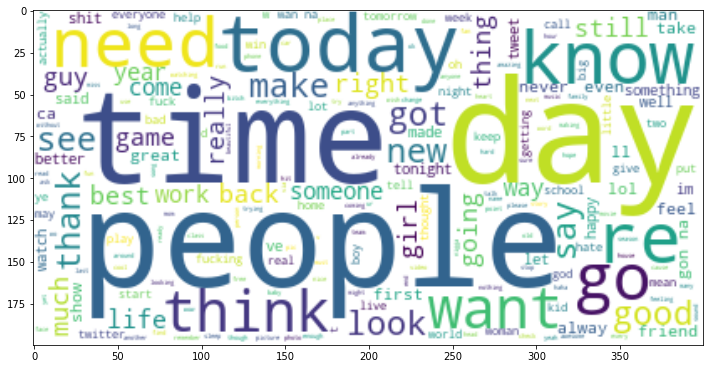

In [93]:
#Create a big sentence for humans joining all human tweets together
big_sentence = ''

for sentence in human_tweets_text['sentence']:
    big_sentence += sentence
    
wordcloud = WordCloud(background_color = "white").generate(text = big_sentence)
plt.figure(figsize=(12,12))
plt.imshow(wordcloud, interpolation = 'bilinear')

## Bot Tweets

In [94]:
#now we do the same for bots
bot_tweets_text = pd.concat([bot_tweets_social_text, bot_tweets_fake_text], axis = 0)

In [95]:
bot_tweets_text['tokenized'] = bot_tweets_text['cleaned_text'].apply(word_tokenize)

In [96]:
#remove all stop words
bot_tweets_text['processed_data'] = bot_tweets_text.tokenized.apply(lambda x: [word.casefold() for word in x if word.casefold() not in stop
                                                                        and word.casefold() not in contextual_stop])
bot_tweets_text['processed_data'] = bot_tweets_text.processed_data.apply(lambda x: [word.strip() for word in x])

#perform lemmatization
bot_tweets_text['processed_data'] = bot_tweets_text.processed_data.apply(lambda x:[lemmatizer.lemmatize(word) for word in x])

bot_tweets_text['processed_data'] = bot_tweets_text.processed_data.apply(lambda x: [word.casefold() for word in x if word.casefold() not in stop
                                                                        and word.casefold() not in contextual_stop])

In [97]:
#join the processed tokens to form a sentence
bot_tweets_text['sentence'] = bot_tweets_text['processed_data'].apply(lambda x:' '.join(x))

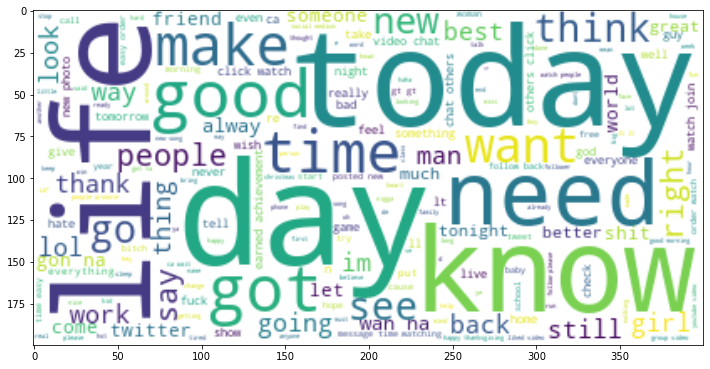

In [98]:
#Create a big sentence for bots joining all bot tweets together
big_sentence = ''

for sentence in bot_tweets_text['sentence']:
    big_sentence += sentence
    
wordcloud = WordCloud(background_color = "white").generate(text = big_sentence)
plt.figure(figsize=(12,12))
plt.imshow(wordcloud, interpolation = 'bilinear')

# Analysing Textual Features

In [20]:
df_tweets_all = pd.concat([human_tweets, bot_tweets_fake, bot_tweets_social])
df_tweets_all = df_tweets_all.reset_index(inplace = False, drop = True)

In [21]:
df_tweets_all = df_tweets_all.rename(columns = {"bot": "account_type"})
df_tweets_all

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,id,text,source,user_id,retweeted_status_id,retweet_count,reply_count,favorite_count,num_hashtags,num_urls,num_mentions,created_at,account_type,cleaned_text
0,0,0,1555987,549097411394940928,@KyleDavidHall @YouTube YASS THANKS BABE,"<a href=""http://twitter.com/download/iphone"" r...",2.193435e+09,0.000000e+00,0.0,0.0,0.0,0.0,0.0,2.0,Sun Dec 28 06:59:59 +0000 2014,0,__user_mention__ __user_mention__ YASS THANKS ...
1,1,1,1585626,566021410649145345,RT @AbnInfVet: ...And Then Bloomberg Says He D...,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",2.198399e+09,5.660208e+17,11.0,0.0,0.0,3.0,0.0,1.0,Thu Feb 12 23:49:55 +0000 2015,0,RT __user_mention__ ...And Then Bloomberg Says...
2,2,3,1916698,489188089143648256,RT @lgbtqnation: Federal judge considers separ...,"<a href=""http://twitter.com/download/iphone"" r...",2.244691e+09,4.891829e+17,10.0,0.0,0.0,1.0,1.0,1.0,Tue Jul 15 23:21:43 +0000 2014,0,RT __user_mention__ Federal judge considers se...
3,3,5,1269997,494612842679517186,RT @OKFosterWishes: URGENT; Beds needed to get...,"<a href=""http://twitter.com/download/iphone"" r...",1.752381e+07,4.945571e+17,6.0,0.0,0.0,0.0,1.0,1.0,Wed Jul 30 22:37:45 +0000 2014,0,RT __user_mention__ URGENT; Beds needed to get...
4,4,8,2537638,572308471829299200,"RT @luke_brooks: N.America and EU! Our EP ""Wou...","<a href=""http://twitter.com/download/iphone"" r...",2.312113e+08,5.722651e+17,3587.0,0.0,0.0,0.0,1.0,1.0,Mon Mar 02 08:12:27 +0000 2015,0,"RT __user_mention__ N.America and EU! Our EP ""..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248177,42222,99990,125115,224967602886279168,theawkwardmoment#theawkwardmoment when you sta...,web,6.162121e+08,NaN,0.0,0.0,0.0,1.0,0.0,0.0,Mon Jul 16 20:43:50 +0000 2012,1,theawkwardmoment#theawkwardmoment when you sta...
248178,42223,99991,138446,218760002142351361,I will have the rest of the site updated when ...,web,6.162873e+08,NaN,0.0,0.0,0.0,0.0,0.0,0.0,Fri Jun 29 17:37:03 +0000 2012,1,I will have the rest of the site updated when ...
248179,42224,99993,117139,314267535916814336,RT @EMANSANGELS: Follow @scottstorch and view ...,web,4.757323e+08,NaN,13783.0,0.0,0.0,0.0,0.0,2.0,Wed Mar 20 06:49:54 +0000 2013,1,RT __user_mention__ Follow __user_mention__ an...
248180,42225,99998,141229,312307989212192769,Stupidity in numbers. penn state riot,web,6.162999e+08,NaN,0.0,0.0,0.0,0.0,0.0,0.0,Thu Mar 14 21:03:21 +0000 2013,1,Stupidity in numbers. penn state riot


## Barplots and Stripplots

### Retweet Count

<AxesSubplot:xlabel='account_type', ylabel='retweet_count'>

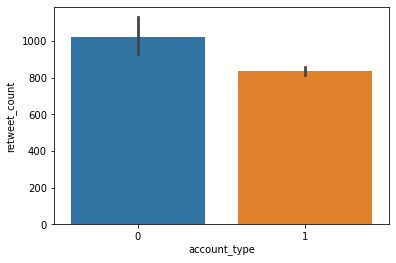

In [22]:
sns.barplot(data = df_tweets_all, x = "account_type", y = "retweet_count")

<AxesSubplot:xlabel='account_type', ylabel='retweet_count'>

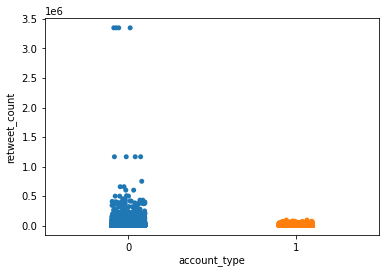

In [23]:
sns.stripplot(data = df_tweets_all, x = "account_type", y = "retweet_count")

### Favourite Count

<AxesSubplot:xlabel='account_type', ylabel='favorite_count'>

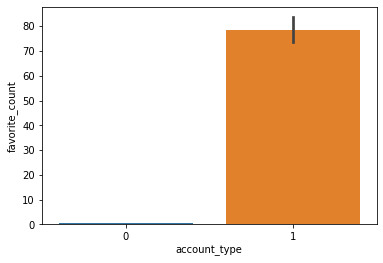

In [24]:
sns.barplot(data = df_tweets_all, x = "account_type", y = "favorite_count")

<AxesSubplot:xlabel='account_type', ylabel='favorite_count'>

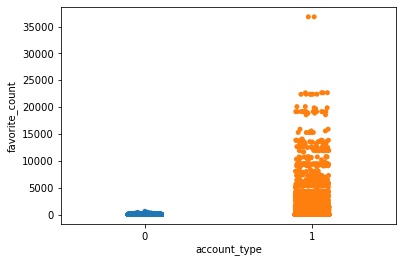

In [25]:
sns.stripplot(data = df_tweets_all, x = "account_type", y = "favorite_count")

### Num of Hashtags

<AxesSubplot:xlabel='account_type', ylabel='num_hashtags'>

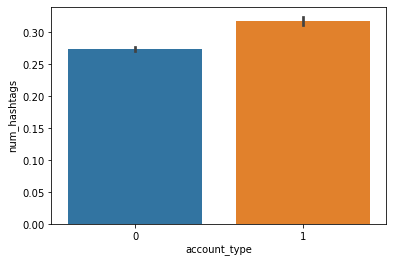

In [26]:
sns.barplot(data = df_tweets_all, x = "account_type", y = "num_hashtags")

<AxesSubplot:xlabel='account_type', ylabel='num_hashtags'>

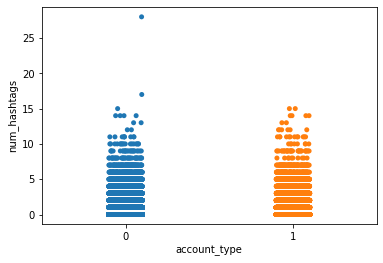

In [27]:
sns.stripplot(data = df_tweets_all, x = "account_type", y = "num_hashtags")

### Num of URLs

<AxesSubplot:xlabel='account_type', ylabel='num_urls'>

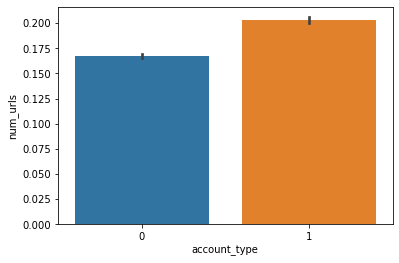

In [28]:
sns.barplot(data = df_tweets_all, x = "account_type", y = "num_urls")

<AxesSubplot:xlabel='account_type', ylabel='num_urls'>

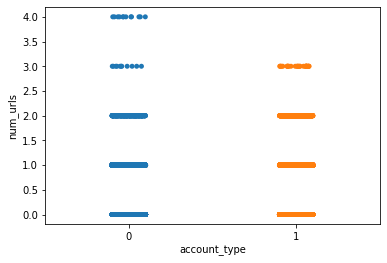

In [29]:
sns.stripplot(data = df_tweets_all, x = "account_type", y = "num_urls")

### Num of Mentions

<AxesSubplot:xlabel='account_type', ylabel='num_mentions'>

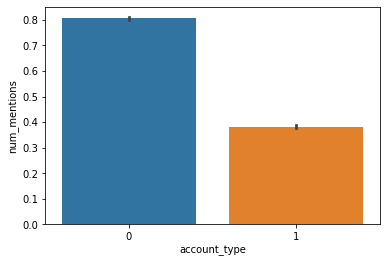

In [30]:
sns.barplot(data = df_tweets_all, x = "account_type", y = "num_mentions")

<AxesSubplot:xlabel='account_type', ylabel='num_mentions'>

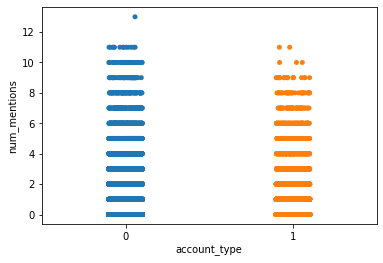

In [31]:
sns.stripplot(data = df_tweets_all, x = "account_type", y = "num_mentions")

## Correlation Analysis

In [32]:
human_tweets = df_tweets_all[df_tweets_all['account_type'] == 0]
bot_tweets = df_tweets_all[df_tweets_all['account_type'] == 1]

<AxesSubplot:>

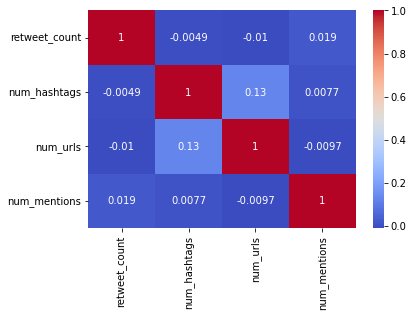

In [33]:
relevant_values_human = human_tweets[['retweet_count','num_hashtags', 'num_urls', 'num_mentions']]
sns.heatmap(relevant_values_human.corr(),cmap ='coolwarm', annot=True,)

<AxesSubplot:>

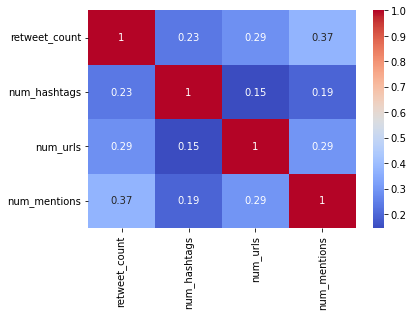

In [34]:
relevant_values_bot = bot_tweets[['retweet_count','num_hashtags', 'num_urls', 'num_mentions']]
sns.heatmap(relevant_values_bot.corr(),cmap ='coolwarm', annot=True,)